# Error Corr

In [1]:
# 2022_01_20 기준 Python 3.10에는 tensorflow가 지원이 안된다.
!python --version

Python 3.7.6


In [2]:
# 필요한 라이브러리
'''
!pip install autograd
!pip install matplotlib
!pip install tensorflow
'''

'\n!pip install autograd\n!pip install matplotlib\n!pip install tensorflow\n'

import

In [3]:
import autograd.numpy as np
from autograd import grad 
import autograd.numpy.random as npr
from autograd.core import primitive
from matplotlib import pyplot as plt
%matplotlib inline

using GPU

In [4]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.python.client import device_lib 
device_lib.list_local_devices() 
tf.test.is_gpu_available()
# gpu를 사용하려면 cmd와 jupyter notebook cell에서 모두 True값이 나와야 함

Instructions for updating:
non-resource variables are not supported in the long term
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False

Parameter

In [5]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.1      # 최소 cost 
step_number = 30000   # step 횟수

Function :
$$y = 1+ w_{1}x + w_{2}x^{2} + ... + w_{6}x^{6}$$
$$y' = w_{1} + 2w_{2}x + ... + 6w_{6}x^{5}$$

Neural Network : $$ye = 1 + xN$$
$$ye' = \frac{ N + N'x }{ \Big\lVert y - y' \Big\rVert^{2} }$$

Cost : $$\sum_{ i=0 }^{ n } { \frac{ (ye' - ye)^{2} }{ n } } + \sum_{ i=0 }^{ n } { \frac{ (y' - y)^{2} }{ n } }$$

In [6]:
# 예측에 넣을 함수.
# def f(x, y):          # f(x, y)
#   return 2*y

# 정답이 되는 함수.
def anal(x):
  return np.exp(list(2*np.array(x)))

# 함수 정의
def Error_Corr(x_max = 1, w_number = 6, cost_limt = 0.1, step_number = 30000):
  def sigmoid(x):
      return 1 / (1 + tf.math.exp(-x))

  def sigmoid_grad(x):
      return sigmoid(x) * (1 - sigmoid(x))

  def neural_network(W, x):
      a1 = sigmoid(tf.tensordot(x, W[0], axes = 1))
      return tf.tensordot(a1, W[1], axes = 1)

  def d_neural_network_dx(W, x, k=1):
      return tf.tensordot(tf.transpose(W[1]), tf.transpose(W[0])**k, axes = 1) * sigmoid_grad(x)

  x = tf.Variable(np.array([[i/100] for i in range(0, x_max * 100, 1)], dtype = np.float32))
  W = [tf.Variable(tf.random_normal([1, 10])), tf.Variable(tf.random_normal([10, 1]))]
  for i in range(1, w_number + 1):
      globals()['w{}'.format(i)] = tf.Variable(tf.random_normal([1]), name = 'weight{}'.format(i))
  y = 1
  yprime = 0

  sess = tf.Session()
  init = tf.global_variables_initializer()
  sess.run(init)

  for i in range(1, w_number + 1):
      y += globals()['w{}'.format(i)]*(x**i)  # y = 1 + w1*(x) + w2*(x**2) + w3*(x**3) + w4*(x**4) + w5*(x**5) + w6*(x**6)
      yprime += i*globals()['w{}'.format(i)]*(x**(i-1))  # yprime = w1 + 2*w2*x + 3*w3*(x**2) + 4*w4*(x**3) + 5*w5*(x**4) + 6*w6*(x**5)

  # 수정
  ye = 0
  yeprime = 0
  # ye = (x**(w_number + 1)) * neural_network(W, x)
  # yeprime = (w_number + 1) * (x**(w_number))*neural_network(W, x) + (x**(w_number + 1)) * d_neural_network_dx(W, x)

  # Cost 계산
  # 수정
  # cost = tf.reduce_mean(tf.square(yeprime - 2*ye)) + tf.reduce_mean(tf.square(yprime - 2*y))
  cost = tf.reduce_mean(tf.square(yprime - 2*y))
  # Optimizer 함수
  optimizer = tf.train.GradientDescentOptimizer(learning_rate = 2e-5)
  # 0에 수렴하는 Cost 값을 찾아 변수 수정
  train = optimizer.minimize(cost)

  count = 0
  cost_val = 1
  # cost_val값이 cost_limt 값에 도달할 때 까지 반복.
  while cost_val > cost_limt:
    global x_space
    global y_space
    global ye_space
    global corr_space
    global cost_space

    x_space = []
    y_space = []
    ye_space = []
    corr_space = []
    cost_space = []

    # 중간 출력 과정.
    if count % 1 == 0:
      print("count: ", count)
    for step in range(step_number + 1):
      for i in range(1, w_number + 1):
          globals()['w{}_val'.format(i)] = sess.run([globals()['w{}'.format(i)]])
      # 수정
      # cost_val, yeprime_val, ye_val, yprime_val, y_val, x_val, _ = sess.run([cost, yeprime, ye, yprime, y, x, train])
      cost_val, yprime_val, y_val, x_val, _ = sess.run([cost, yprime, y, x, train])
      if count % 1 == 0:
        if step % int(step_number / 2) == 0:
            print('step: ', step, ", Cost: ", cost_val, "\n")
    if count % 1 == 0:
      print("\n")

    count += 1

    # 결과를 담을 List
    x_space += list(x_val)
    # 수정
    # corr_space += list(ye_val + y_val)
    y_space += list(y_val)
    # ye_space += list(ye_val)

    # final_sol = ye + f(x, y)
    # anal_sol = anal(x)
    # error = abs(final_sol - anal_sol)
    # print(np.linalg.norm)

    # 결과 출력
    # 수정
    # plt.plot(x_space, corr_space, '.', label = 'ye + f(x,y)')
    plt.plot(x_space, y_space, '.', label = 'f(x,y)')
    # plt.plot(x_space, ye_space, '.', label = 'ye')
    plt.plot(x_space, anal(x_space), '.', label = 'exp')
    plt.legend()
    plt.show()

  sess.close()

count:  0
step:  0 , Cost:  8.842749 

step:  25 , Cost:  8.786704 

step:  50 , Cost:  8.7313175 





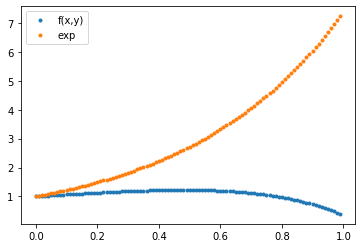

count:  1
step:  0 , Cost:  8.7291155 

step:  25 , Cost:  8.674398 

step:  50 , Cost:  8.620315 





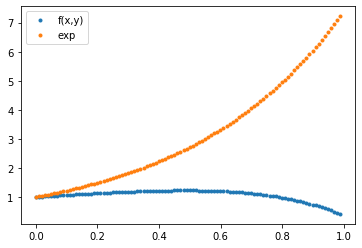

count:  2
step:  0 , Cost:  8.618164 

step:  25 , Cost:  8.564725 

step:  50 , Cost:  8.511894 





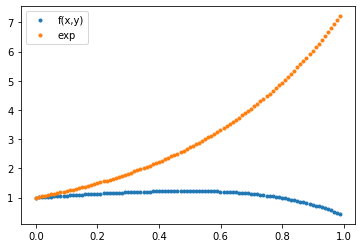

count:  3
step:  0 , Cost:  8.509793 

step:  25 , Cost:  8.457583 

step:  50 , Cost:  8.40596 





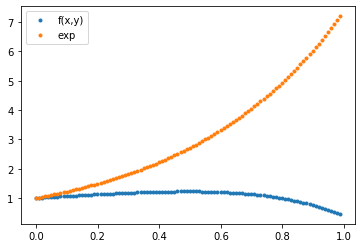

count:  4
step:  0 , Cost:  8.403908 

step:  25 , Cost:  8.352882 

step:  50 , Cost:  8.302422 





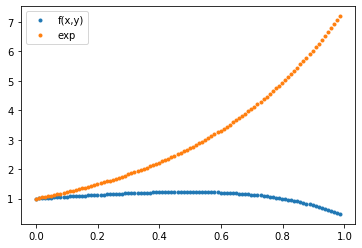

count:  5
step:  0 , Cost:  8.300414 

step:  25 , Cost:  8.250533 

step:  50 , Cost:  8.201195 





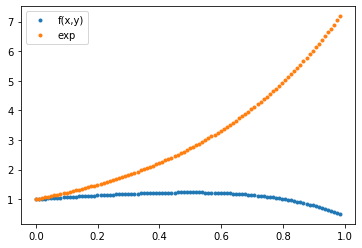

count:  6
step:  0 , Cost:  8.199232 

step:  25 , Cost:  8.15045 

step:  50 , Cost:  8.102193 





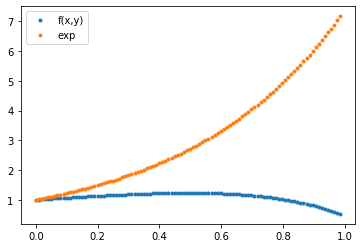

count:  7
step:  0 , Cost:  8.100274 

step:  25 , Cost:  8.052555 

step:  50 , Cost:  8.005343 





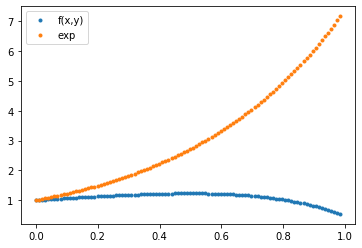

count:  8
step:  0 , Cost:  8.003466 

step:  25 , Cost:  7.9567733 

step:  50 , Cost:  7.9105697 





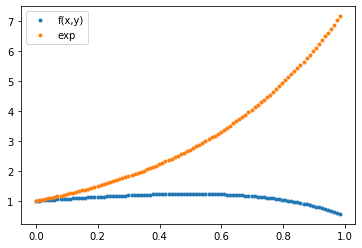

count:  9
step:  0 , Cost:  7.9087324 

step:  25 , Cost:  7.86303 

step:  50 , Cost:  7.8177996 





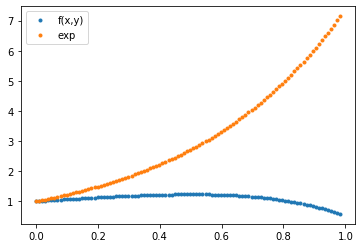

count:  10
step:  0 , Cost:  7.816001 

step:  25 , Cost:  7.771256 

step:  50 , Cost:  7.726969 





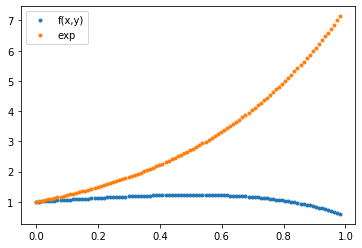

count:  11
step:  0 , Cost:  7.725207 

step:  25 , Cost:  7.681388 

step:  50 , Cost:  7.638012 





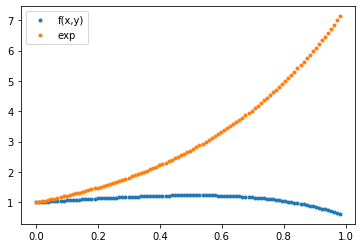

count:  12
step:  0 , Cost:  7.636286 

step:  25 , Cost:  7.593363 

step:  50 , Cost:  7.5508666 





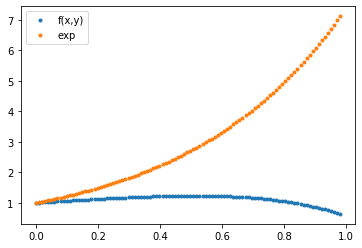

count:  13
step:  0 , Cost:  7.549176 

step:  25 , Cost:  7.507119 

step:  50 , Cost:  7.465476 





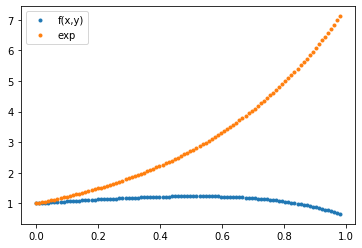

count:  14
step:  0 , Cost:  7.463819 

step:  25 , Cost:  7.4226003 

step:  50 , Cost:  7.381784 





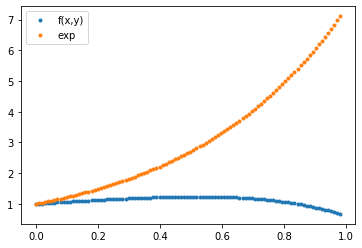

count:  15
step:  0 , Cost:  7.3801594 

step:  25 , Cost:  7.339754 

step:  50 , Cost:  7.2997365 





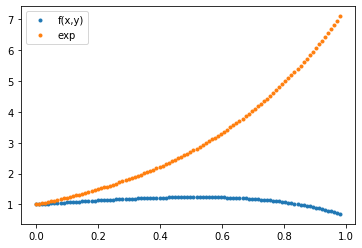

count:  16
step:  0 , Cost:  7.298144 

step:  25 , Cost:  7.2585254 

step:  50 , Cost:  7.2192836 





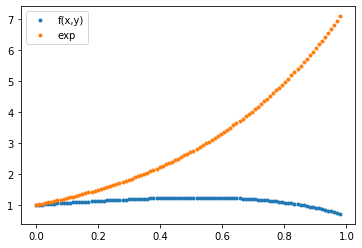

count:  17
step:  0 , Cost:  7.217722 

step:  25 , Cost:  7.1788664 

step:  50 , Cost:  7.140376 





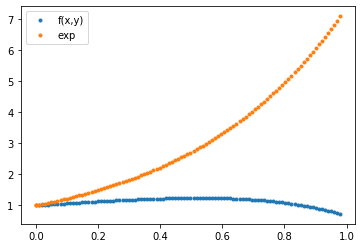

count:  18
step:  0 , Cost:  7.1388435 

step:  25 , Cost:  7.100728 

step:  50 , Cost:  7.0629673 





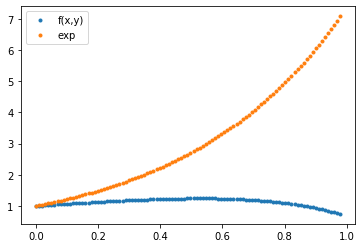

count:  19
step:  0 , Cost:  7.0614643 

step:  25 , Cost:  7.024066 

step:  50 , Cost:  6.987012 





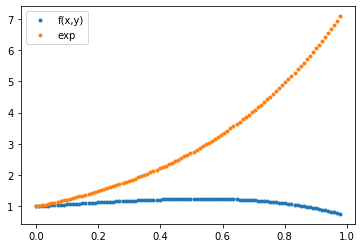

count:  20
step:  0 , Cost:  6.9855366 

step:  25 , Cost:  6.9488354 

step:  50 , Cost:  6.912467 





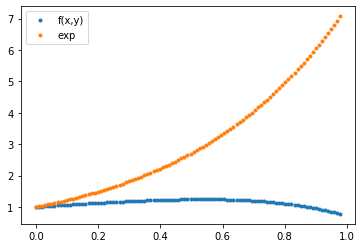

count:  21
step:  0 , Cost:  6.9110193 

step:  25 , Cost:  6.874994 

step:  50 , Cost:  6.839293 





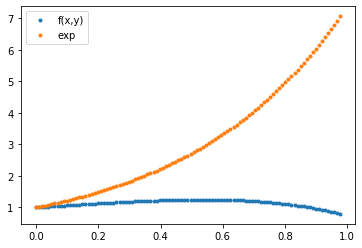

count:  22
step:  0 , Cost:  6.8378725 

step:  25 , Cost:  6.802503 

step:  50 , Cost:  6.7674503 





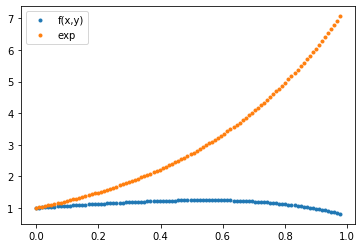

count:  23
step:  0 , Cost:  6.7660546 

step:  25 , Cost:  6.731326 

step:  50 , Cost:  6.6969013 





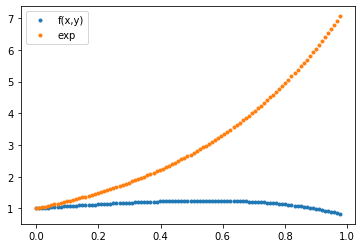

count:  24
step:  0 , Cost:  6.695531 

step:  25 , Cost:  6.661421 

step:  50 , Cost:  6.6276093 





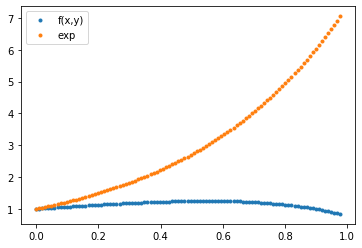

count:  25
step:  0 , Cost:  6.6262636 

step:  25 , Cost:  6.5927563 

step:  50 , Cost:  6.5595403 





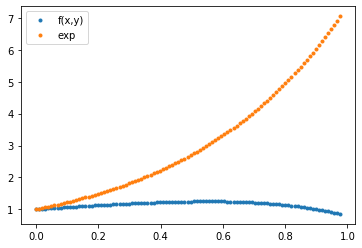

count:  26
step:  0 , Cost:  6.558218 

step:  25 , Cost:  6.5252976 

step:  50 , Cost:  6.492659 





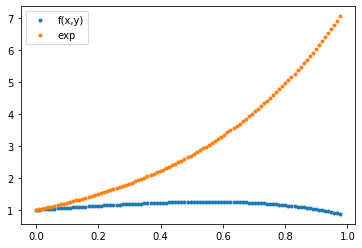

count:  27
step:  0 , Cost:  6.4913597 

step:  25 , Cost:  6.45901 

step:  50 , Cost:  6.426935 





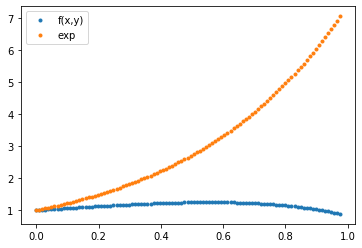

count:  28
step:  0 , Cost:  6.4256587 

step:  25 , Cost:  6.3938646 

step:  50 , Cost:  6.362338 





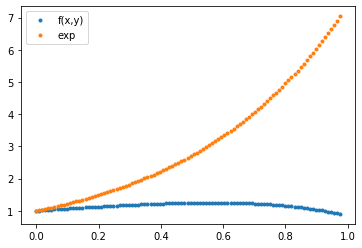

count:  29
step:  0 , Cost:  6.3610835 

step:  25 , Cost:  6.329831 

step:  50 , Cost:  6.2988386 





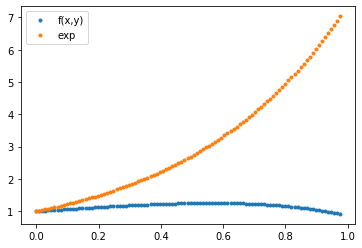

count:  30
step:  0 , Cost:  6.2976036 

step:  25 , Cost:  6.2668786 

step:  50 , Cost:  6.236405 





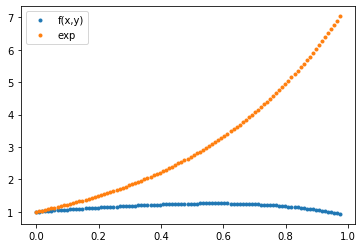

count:  31
step:  0 , Cost:  6.235191 

step:  25 , Cost:  6.20498 

step:  50 , Cost:  6.175014 





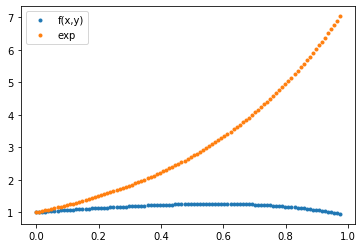

count:  32
step:  0 , Cost:  6.173821 

step:  25 , Cost:  6.144108 

step:  50 , Cost:  6.1146364 





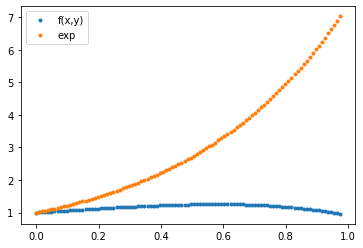

count:  33
step:  0 , Cost:  6.1134624 

step:  25 , Cost:  6.0842376 

step:  50 , Cost:  6.055246 





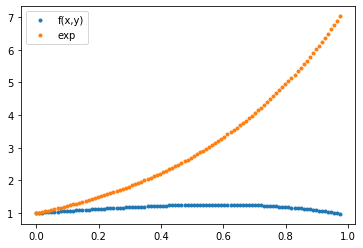

count:  34
step:  0 , Cost:  6.054092 

step:  25 , Cost:  6.025343 

step:  50 , Cost:  5.9968214 





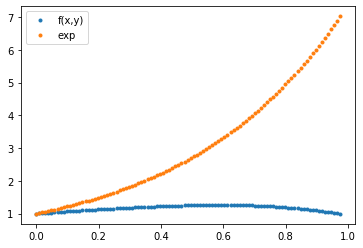

count:  35
step:  0 , Cost:  5.9956856 

step:  25 , Cost:  5.9674006 

step:  50 , Cost:  5.939338 





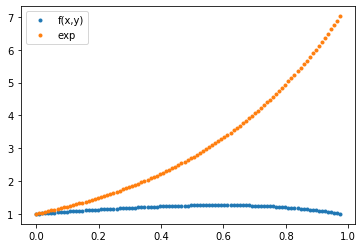

count:  36
step:  0 , Cost:  5.93822 

step:  25 , Cost:  5.910387 

step:  50 , Cost:  5.8827724 





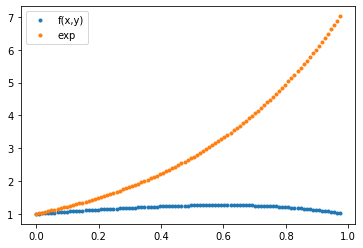

count:  37
step:  0 , Cost:  5.881672 

step:  25 , Cost:  5.85428 

step:  50 , Cost:  5.827101 





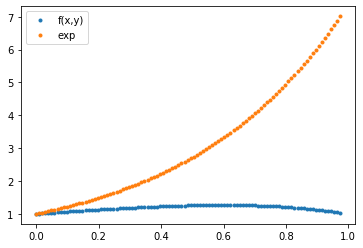

count:  38
step:  0 , Cost:  5.826019 

step:  25 , Cost:  5.799059 

step:  50 , Cost:  5.7723064 





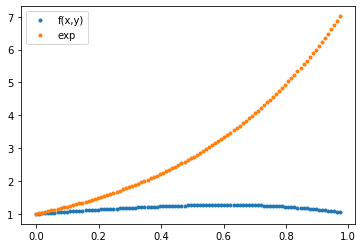

count:  39
step:  0 , Cost:  5.7712407 

step:  25 , Cost:  5.7447014 

step:  50 , Cost:  5.7183657 





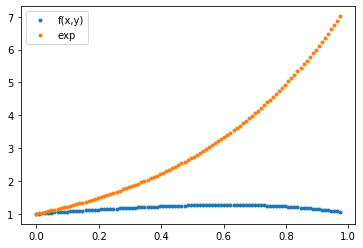

count:  40
step:  0 , Cost:  5.7173157 

step:  25 , Cost:  5.691188 

step:  50 , Cost:  5.665259 





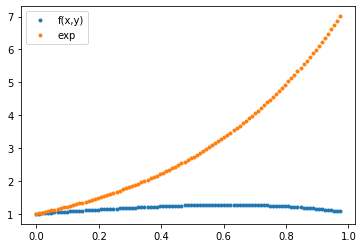

count:  41
step:  0 , Cost:  5.6642246 

step:  25 , Cost:  5.6384997 

step:  50 , Cost:  5.612967 





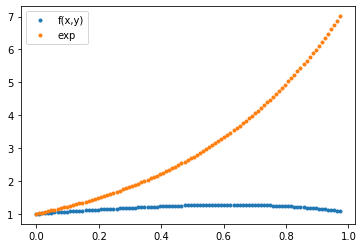

count:  42
step:  0 , Cost:  5.61195 

step:  25 , Cost:  5.5866175 

step:  50 , Cost:  5.561473 





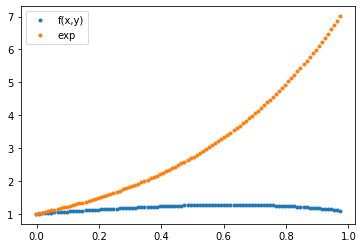

count:  43
step:  0 , Cost:  5.560472 

step:  25 , Cost:  5.535522 

step:  50 , Cost:  5.510758 





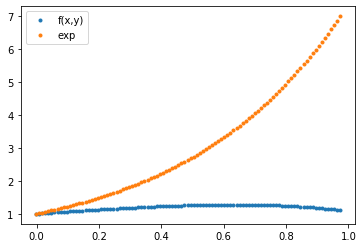

count:  44
step:  0 , Cost:  5.509772 

step:  25 , Cost:  5.4851975 

step:  50 , Cost:  5.460805 





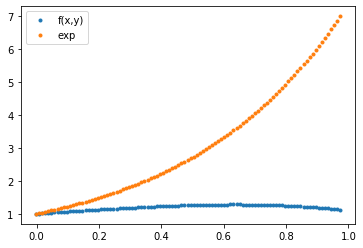

count:  45
step:  0 , Cost:  5.459834 

step:  25 , Cost:  5.4356275 

step:  50 , Cost:  5.4115987 





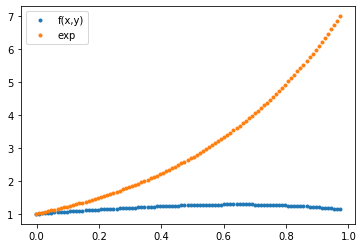

count:  46
step:  0 , Cost:  5.4106407 

step:  25 , Cost:  5.3867936 

step:  50 , Cost:  5.36312 





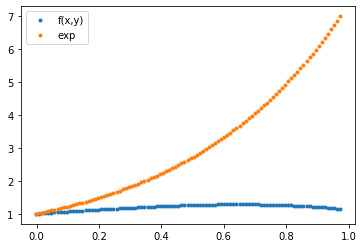

count:  47
step:  0 , Cost:  5.362177 

step:  25 , Cost:  5.338681 

step:  50 , Cost:  5.3153563 





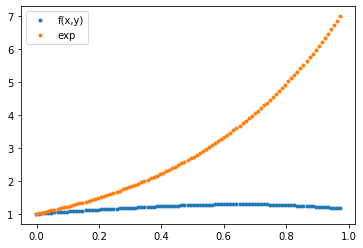

count:  48
step:  0 , Cost:  5.314427 

step:  25 , Cost:  5.2912755 

step:  50 , Cost:  5.2682905 





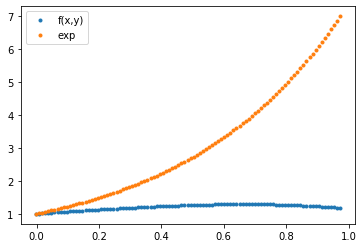

count:  49
step:  0 , Cost:  5.267374 

step:  25 , Cost:  5.24456 

step:  50 , Cost:  5.221909 





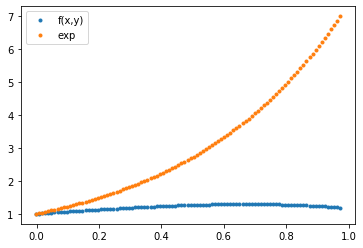

count:  50
step:  0 , Cost:  5.221006 

step:  25 , Cost:  5.1985226 

step:  50 , Cost:  5.1761975 





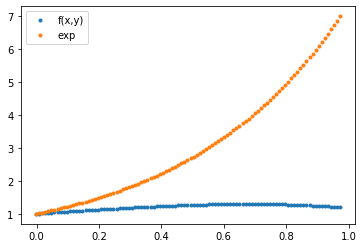

count:  51
step:  0 , Cost:  5.1753078 

step:  25 , Cost:  5.1531467 

step:  50 , Cost:  5.1311426 





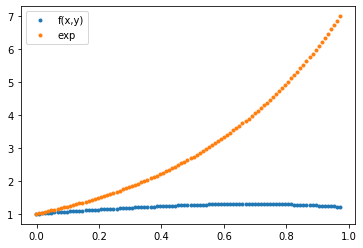

count:  52
step:  0 , Cost:  5.1302657 

step:  25 , Cost:  5.108422 

step:  50 , Cost:  5.0867305 





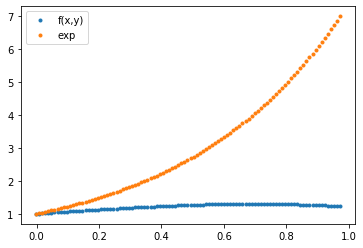

count:  53
step:  0 , Cost:  5.0858655 

step:  25 , Cost:  5.0643315 

step:  50 , Cost:  5.042948 





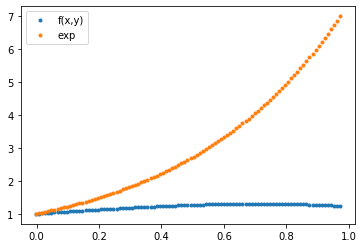

count:  54
step:  0 , Cost:  5.042096 

step:  25 , Cost:  5.020866 

step:  50 , Cost:  4.9997835 





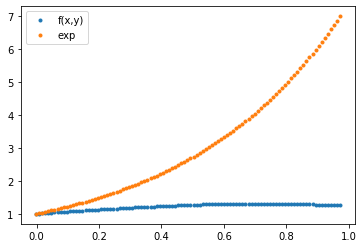

count:  55
step:  0 , Cost:  4.9989433 

step:  25 , Cost:  4.978012 

step:  50 , Cost:  4.957225 





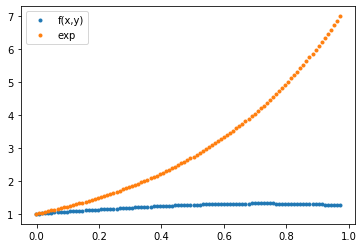

count:  56
step:  0 , Cost:  4.9563966 

step:  25 , Cost:  4.935757 

step:  50 , Cost:  4.91526 





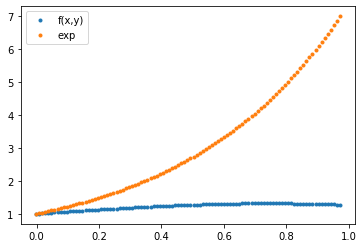

count:  57
step:  0 , Cost:  4.9144435 

step:  25 , Cost:  4.894091 

step:  50 , Cost:  4.873877 





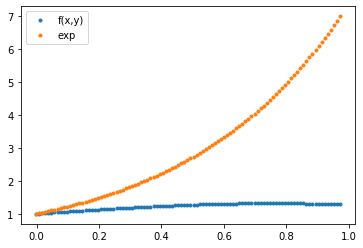

count:  58
step:  0 , Cost:  4.8730717 

step:  25 , Cost:  4.8530016 

step:  50 , Cost:  4.8330665 





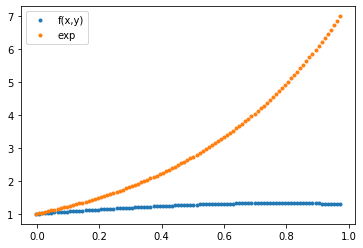

count:  59
step:  0 , Cost:  4.832272 

step:  25 , Cost:  4.8124776 

step:  50 , Cost:  4.7928166 





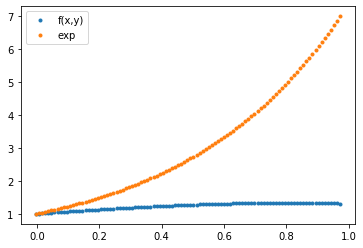

count:  60
step:  0 , Cost:  4.7920322 

step:  25 , Cost:  4.7725096 

step:  50 , Cost:  4.7531166 





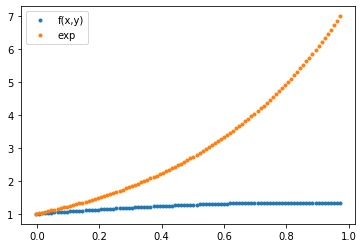

count:  61
step:  0 , Cost:  4.7523437 

step:  25 , Cost:  4.7330866 

step:  50 , Cost:  4.7139573 





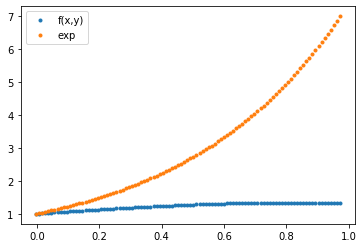

count:  62
step:  0 , Cost:  4.713195 

step:  25 , Cost:  4.694198 

step:  50 , Cost:  4.6753273 





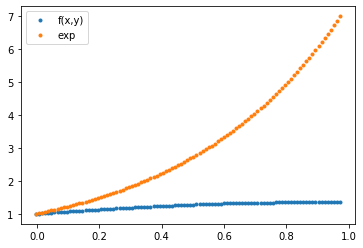

count:  63
step:  0 , Cost:  4.6745753 

step:  25 , Cost:  4.655835 

step:  50 , Cost:  4.6372194 





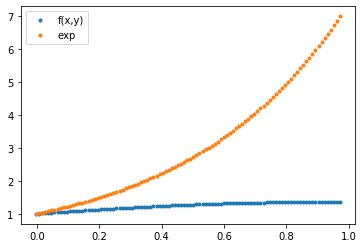

count:  64
step:  0 , Cost:  4.6364775 

step:  25 , Cost:  4.617988 

step:  50 , Cost:  4.5996222 





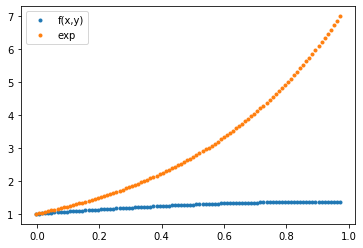

count:  65
step:  0 , Cost:  4.59889 

step:  25 , Cost:  4.5806484 

step:  50 , Cost:  4.5625277 





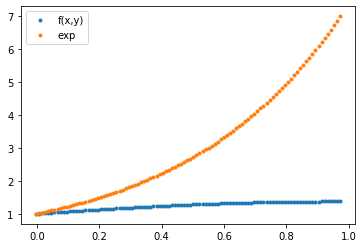

count:  66
step:  0 , Cost:  4.5618052 

step:  25 , Cost:  4.543807 

step:  50 , Cost:  4.5259266 





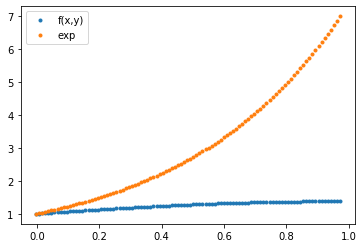

count:  67
step:  0 , Cost:  4.5252137 

step:  25 , Cost:  4.5074553 

step:  50 , Cost:  4.489811 





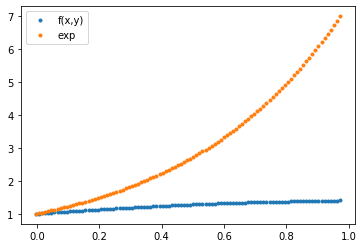

count:  68
step:  0 , Cost:  4.489108 

step:  25 , Cost:  4.471583 

step:  50 , Cost:  4.454172 





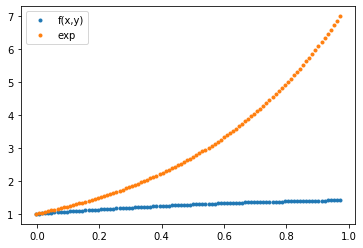

count:  69
step:  0 , Cost:  4.4534783 

step:  25 , Cost:  4.436184 

step:  50 , Cost:  4.419002 





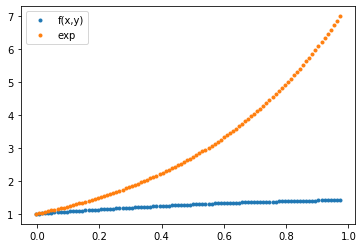

count:  70
step:  0 , Cost:  4.4183173 

step:  25 , Cost:  4.40125 

step:  50 , Cost:  4.384292 





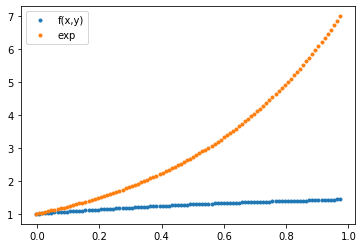

count:  71
step:  0 , Cost:  4.3836164 

step:  25 , Cost:  4.366772 

step:  50 , Cost:  4.350036 





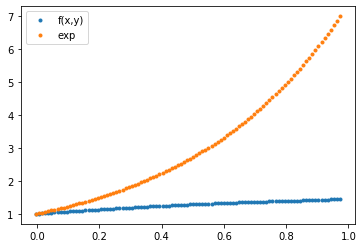

count:  72
step:  0 , Cost:  4.3493695 

step:  25 , Cost:  4.3327446 

step:  50 , Cost:  4.316226 





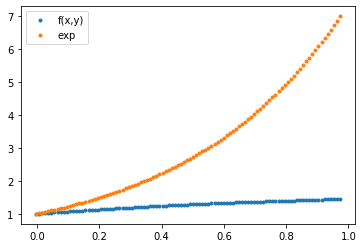

count:  73
step:  0 , Cost:  4.3155675 

step:  25 , Cost:  4.299158 

step:  50 , Cost:  4.2828526 





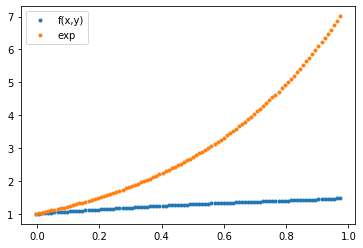

count:  74
step:  0 , Cost:  4.282203 

step:  25 , Cost:  4.2660065 

step:  50 , Cost:  4.2499123 





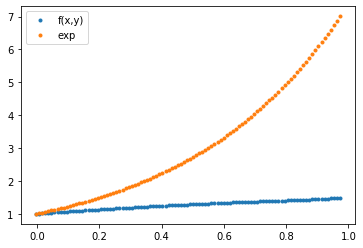

count:  75
step:  0 , Cost:  4.2492704 

step:  25 , Cost:  4.2332826 

step:  50 , Cost:  4.217396 





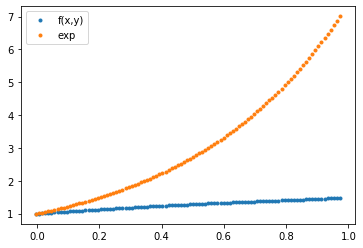

count:  76
step:  0 , Cost:  4.216762 

step:  25 , Cost:  4.200979 

step:  50 , Cost:  4.185296 





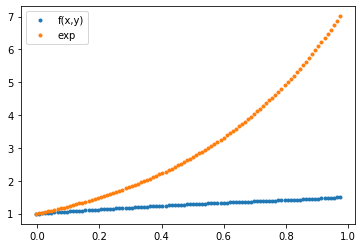

count:  77
step:  0 , Cost:  4.184671 

step:  25 , Cost:  4.1690903 

step:  50 , Cost:  4.1536083 





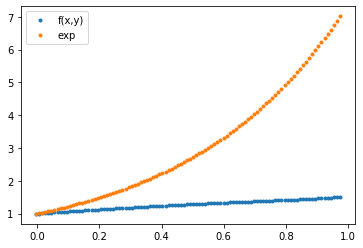

count:  78
step:  0 , Cost:  4.152991 

step:  25 , Cost:  4.1376095 

step:  50 , Cost:  4.122324 





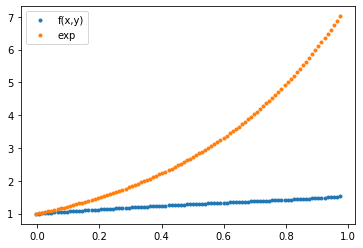

count:  79
step:  0 , Cost:  4.1217146 

step:  25 , Cost:  4.1065297 

step:  50 , Cost:  4.0914383 





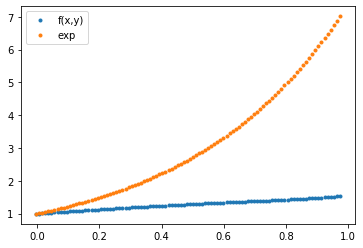

count:  80
step:  0 , Cost:  4.0908365 

step:  25 , Cost:  4.075844 

step:  50 , Cost:  4.060945 





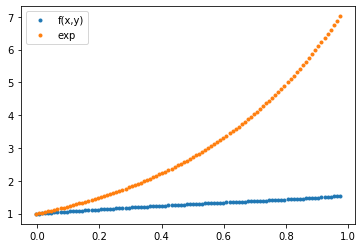

count:  81
step:  0 , Cost:  4.060351 

step:  25 , Cost:  4.045548 

step:  50 , Cost:  4.0308375 





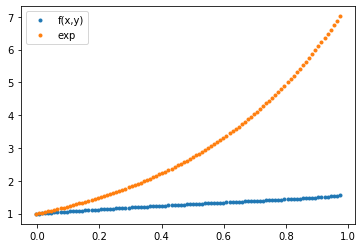

count:  82
step:  0 , Cost:  4.0302505 

step:  25 , Cost:  4.015635 

step:  50 , Cost:  4.001109 





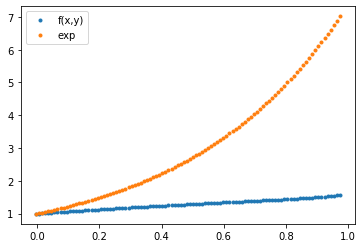

count:  83
step:  0 , Cost:  4.0005302 

step:  25 , Cost:  3.9860985 

step:  50 , Cost:  3.9717567 





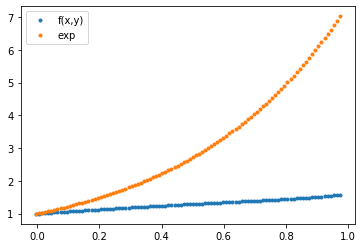

count:  84
step:  0 , Cost:  3.9711847 

step:  25 , Cost:  3.956935 

step:  50 , Cost:  3.942773 





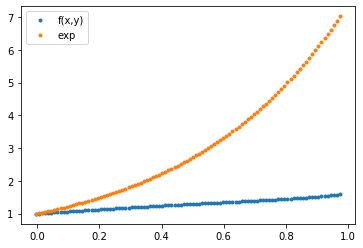

count:  85
step:  0 , Cost:  3.942208 

step:  25 , Cost:  3.9281373 

step:  50 , Cost:  3.9141526 





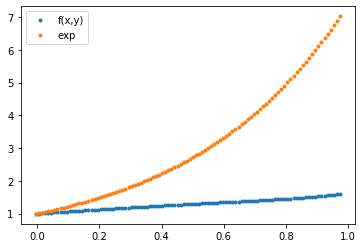

count:  86
step:  0 , Cost:  3.913595 

step:  25 , Cost:  3.8997 

step:  50 , Cost:  3.8858905 





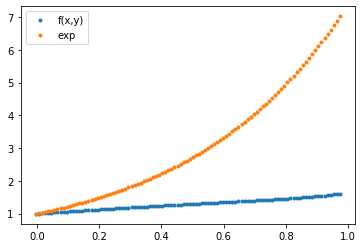

count:  87
step:  0 , Cost:  3.88534 

step:  25 , Cost:  3.8716187 

step:  50 , Cost:  3.8579812 





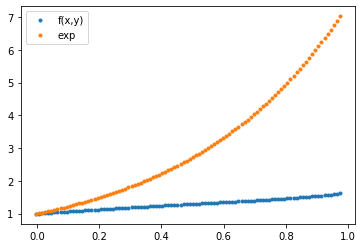

count:  88
step:  0 , Cost:  3.8574374 

step:  25 , Cost:  3.8438873 

step:  50 , Cost:  3.83042 





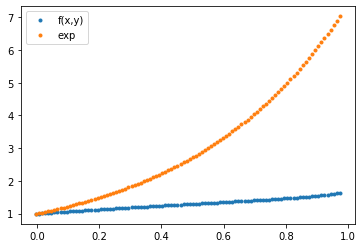

count:  89
step:  0 , Cost:  3.829883 

step:  25 , Cost:  3.8165011 

step:  50 , Cost:  3.803201 





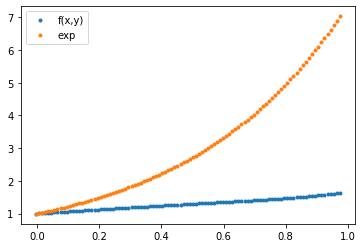

count:  90
step:  0 , Cost:  3.802671 

step:  25 , Cost:  3.789456 

step:  50 , Cost:  3.77632 





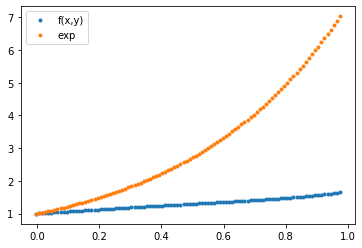

count:  91
step:  0 , Cost:  3.7757964 

step:  25 , Cost:  3.7627451 

step:  50 , Cost:  3.749773 





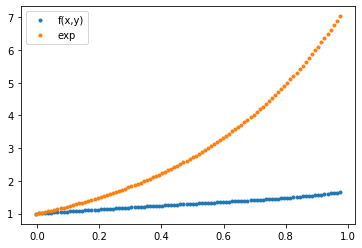

count:  92
step:  0 , Cost:  3.7492554 

step:  25 , Cost:  3.7363653 

step:  50 , Cost:  3.7235534 





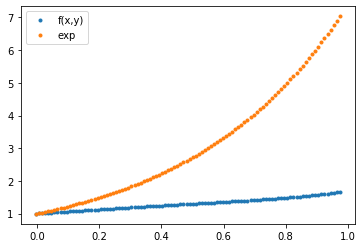

count:  93
step:  0 , Cost:  3.7230425 

step:  25 , Cost:  3.710312 

step:  50 , Cost:  3.697658 





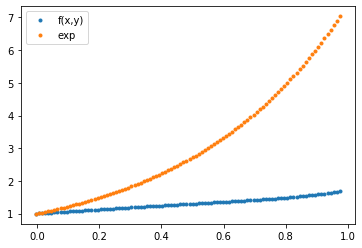

count:  94
step:  0 , Cost:  3.6971533 

step:  25 , Cost:  3.6845798 

step:  50 , Cost:  3.672082 





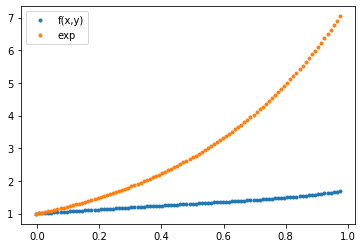

count:  95
step:  0 , Cost:  3.6715832 

step:  25 , Cost:  3.6591642 

step:  50 , Cost:  3.6468208 





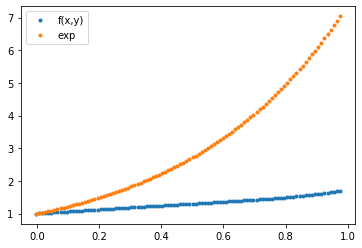

count:  96
step:  0 , Cost:  3.6463284 

step:  25 , Cost:  3.6340623 

step:  50 , Cost:  3.6218696 





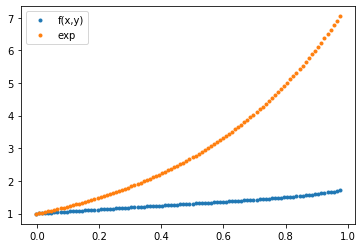

count:  97
step:  0 , Cost:  3.6213837 

step:  25 , Cost:  3.609268 

step:  50 , Cost:  3.597225 





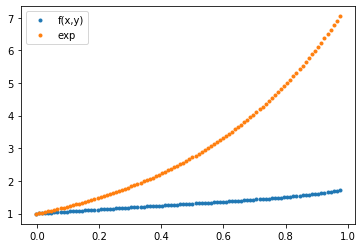

count:  98
step:  0 , Cost:  3.596745 

step:  25 , Cost:  3.5847785 

step:  50 , Cost:  3.5728834 





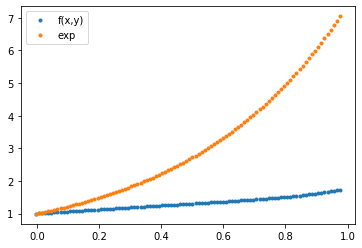

count:  99
step:  0 , Cost:  3.5724087 

step:  25 , Cost:  3.5605884 

step:  50 , Cost:  3.5488393 





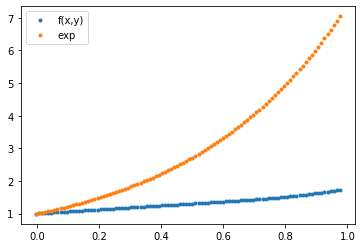

count:  100
step:  0 , Cost:  3.5483706 

step:  25 , Cost:  3.5366952 

step:  50 , Cost:  3.525089 





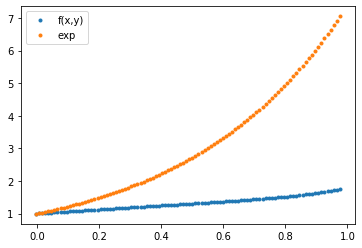

count:  101
step:  0 , Cost:  3.5246265 

step:  25 , Cost:  3.513093 

step:  50 , Cost:  3.5016294 





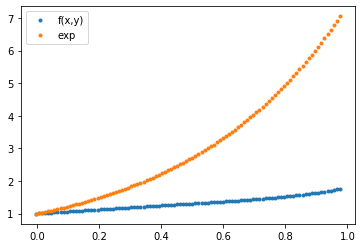

count:  102
step:  0 , Cost:  3.5011725 

step:  25 , Cost:  3.4897797 

step:  50 , Cost:  3.4784558 





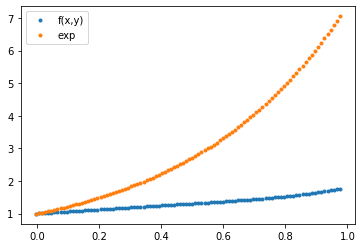

count:  103
step:  0 , Cost:  3.4780045 

step:  25 , Cost:  3.4667504 

step:  50 , Cost:  3.4555655 





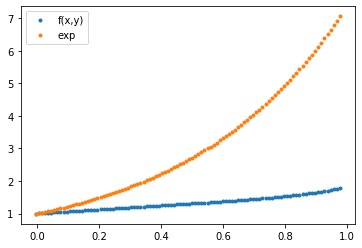

count:  104
step:  0 , Cost:  3.4551191 

step:  25 , Cost:  3.4440026 

step:  50 , Cost:  3.432953 





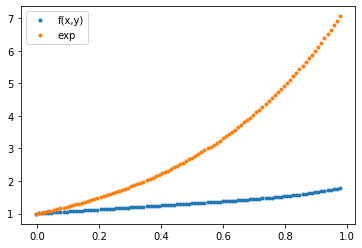

count:  105
step:  0 , Cost:  3.4325125 

step:  25 , Cost:  3.4215307 

step:  50 , Cost:  3.4106154 





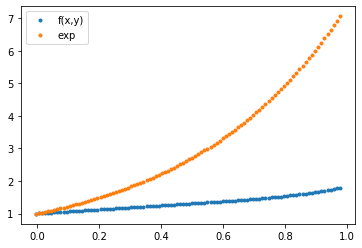

count:  106
step:  0 , Cost:  3.41018 

step:  25 , Cost:  3.3993325 

step:  50 , Cost:  3.38855 





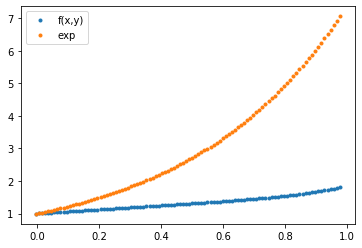

count:  107
step:  0 , Cost:  3.3881195 

step:  25 , Cost:  3.3774042 

step:  50 , Cost:  3.3667524 





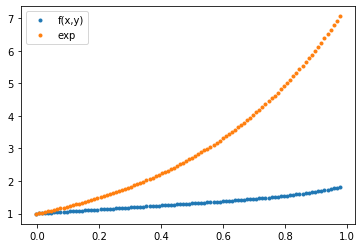

count:  108
step:  0 , Cost:  3.3663275 

step:  25 , Cost:  3.3557415 

step:  50 , Cost:  3.3452194 





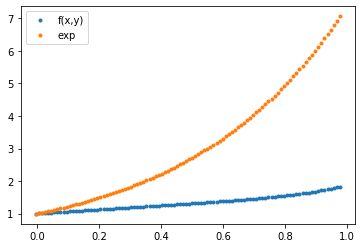

count:  109
step:  0 , Cost:  3.3447995 

step:  25 , Cost:  3.3343427 

step:  50 , Cost:  3.3239477 





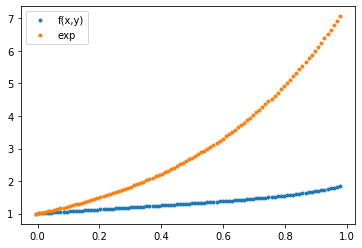

count:  110
step:  0 , Cost:  3.323533 

step:  25 , Cost:  3.3132029 

step:  50 , Cost:  3.302934 





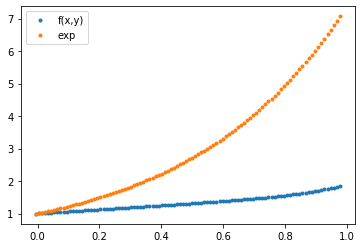

count:  111
step:  0 , Cost:  3.3025248 

step:  25 , Cost:  3.2923193 

step:  50 , Cost:  3.2821743 





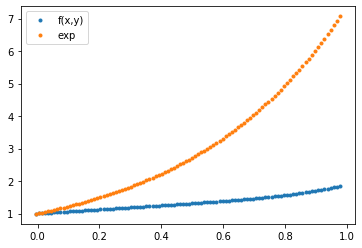

count:  112
step:  0 , Cost:  3.28177 

step:  25 , Cost:  3.2716885 

step:  50 , Cost:  3.2616665 





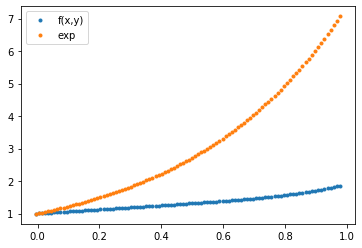

count:  113
step:  0 , Cost:  3.2612672 

step:  25 , Cost:  3.251307 

step:  50 , Cost:  3.2414062 





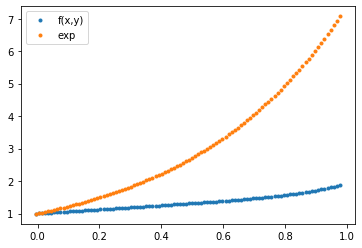

count:  114
step:  0 , Cost:  3.2410114 

step:  25 , Cost:  3.2311718 

step:  50 , Cost:  3.221391 





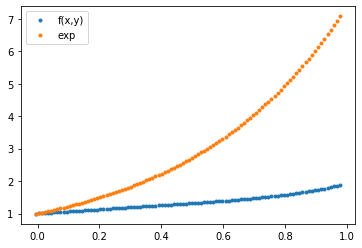

count:  115
step:  0 , Cost:  3.221001 

step:  25 , Cost:  3.2112799 

step:  50 , Cost:  3.2016172 





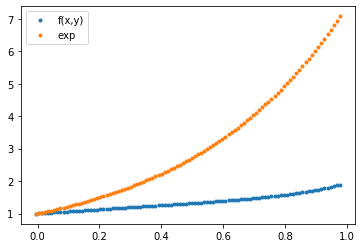

count:  116
step:  0 , Cost:  3.2012317 

step:  25 , Cost:  3.1916285 

step:  50 , Cost:  3.182082 





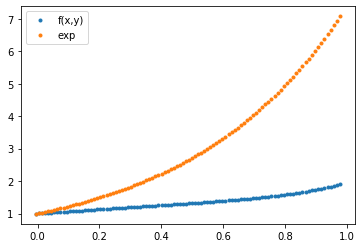

count:  117
step:  0 , Cost:  3.1817014 

step:  25 , Cost:  3.1722138 

step:  50 , Cost:  3.1627827 





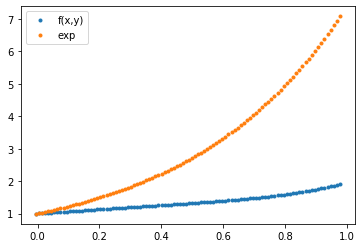

count:  118
step:  0 , Cost:  3.1624067 

step:  25 , Cost:  3.1530337 

step:  50 , Cost:  3.143716 





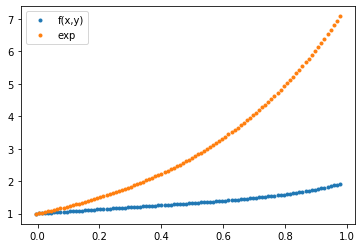

count:  119
step:  0 , Cost:  3.1433446 

step:  25 , Cost:  3.1340852 

step:  50 , Cost:  3.1248803 





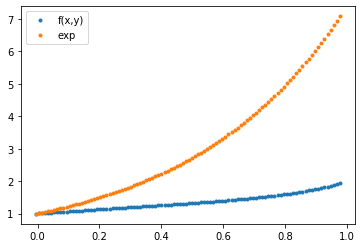

count:  120
step:  0 , Cost:  3.1245136 

step:  25 , Cost:  3.115365 

step:  50 , Cost:  3.106271 





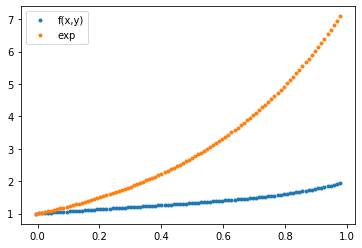

count:  121
step:  0 , Cost:  3.1059082 

step:  25 , Cost:  3.0968707 

step:  50 , Cost:  3.0878863 





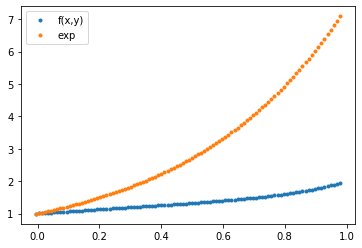

count:  122
step:  0 , Cost:  3.0875285 

step:  25 , Cost:  3.0785992 

step:  50 , Cost:  3.0697231 





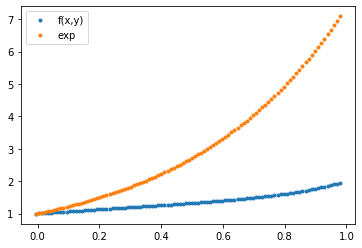

count:  123
step:  0 , Cost:  3.0693688 

step:  25 , Cost:  3.0605478 

step:  50 , Cost:  3.0517776 





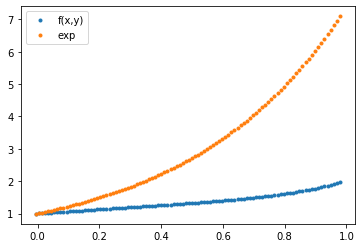

count:  124
step:  0 , Cost:  3.0514278 

step:  25 , Cost:  3.0427127 

step:  50 , Cost:  3.034048 





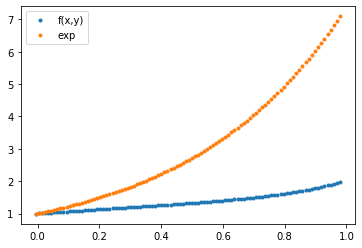

count:  125
step:  0 , Cost:  3.033703 

step:  25 , Cost:  3.025092 

step:  50 , Cost:  3.0165322 





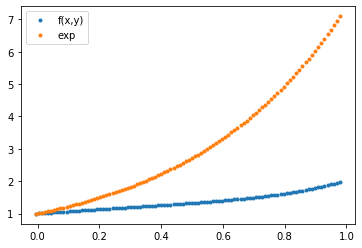

count:  126
step:  0 , Cost:  3.016191 

step:  25 , Cost:  3.0076838 

step:  50 , Cost:  2.999227 





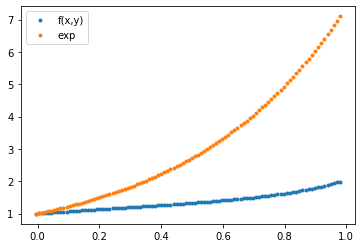

count:  127
step:  0 , Cost:  2.9988894 

step:  25 , Cost:  2.990485 

step:  50 , Cost:  2.98213 





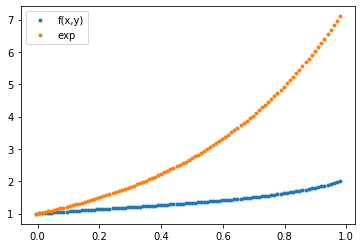

count:  128
step:  0 , Cost:  2.9817965 

step:  25 , Cost:  2.973493 

step:  50 , Cost:  2.965238 





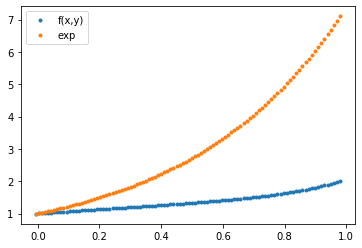

count:  129
step:  0 , Cost:  2.964909 

step:  25 , Cost:  2.9567046 

step:  50 , Cost:  2.9485495 





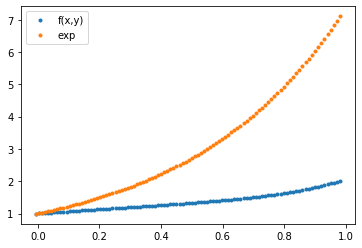

count:  130
step:  0 , Cost:  2.9482238 

step:  25 , Cost:  2.940119 

step:  50 , Cost:  2.9320614 





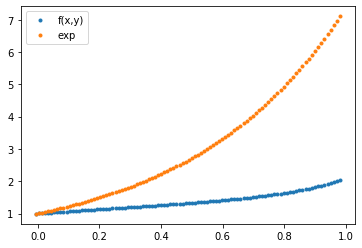

count:  131
step:  0 , Cost:  2.9317398 

step:  25 , Cost:  2.923732 

step:  50 , Cost:  2.9157708 





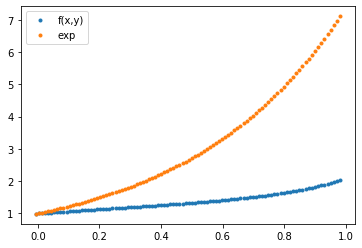

count:  132
step:  0 , Cost:  2.915454 

step:  25 , Cost:  2.9075418 

step:  50 , Cost:  2.8996768 





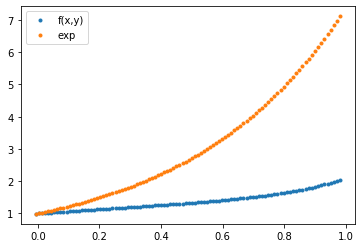

count:  133
step:  0 , Cost:  2.899363 

step:  25 , Cost:  2.8915462 

step:  50 , Cost:  2.8837748 





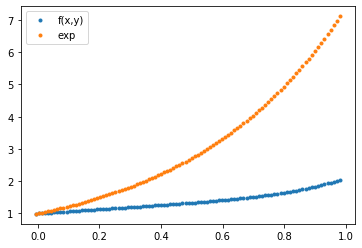

count:  134
step:  0 , Cost:  2.8834653 

step:  25 , Cost:  2.8757415 

step:  50 , Cost:  2.8680637 





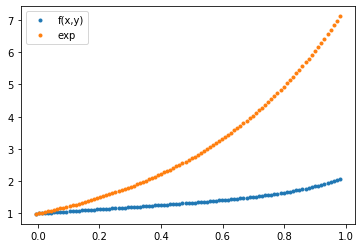

count:  135
step:  0 , Cost:  2.8677576 

step:  25 , Cost:  2.8601267 

step:  50 , Cost:  2.852541 





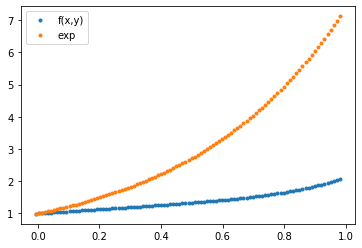

count:  136
step:  0 , Cost:  2.8522382 

step:  25 , Cost:  2.8446984 

step:  50 , Cost:  2.837204 





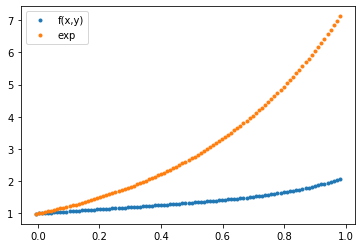

count:  137
step:  0 , Cost:  2.8369052 

step:  25 , Cost:  2.8294559 

step:  50 , Cost:  2.822051 





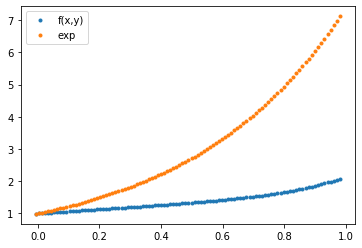

count:  138
step:  0 , Cost:  2.8217556 

step:  25 , Cost:  2.8143966 

step:  50 , Cost:  2.8070807 





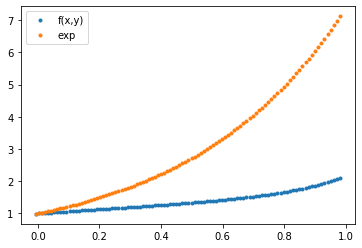

count:  139
step:  0 , Cost:  2.8067887 

step:  25 , Cost:  2.7995172 

step:  50 , Cost:  2.7922888 





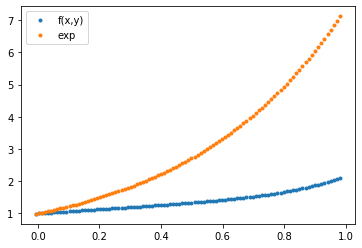

count:  140
step:  0 , Cost:  2.792 

step:  25 , Cost:  2.7848158 

step:  50 , Cost:  2.777674 





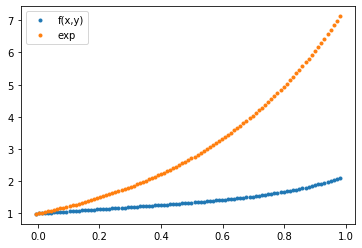

count:  141
step:  0 , Cost:  2.7773888 

step:  25 , Cost:  2.7702906 

step:  50 , Cost:  2.7632341 





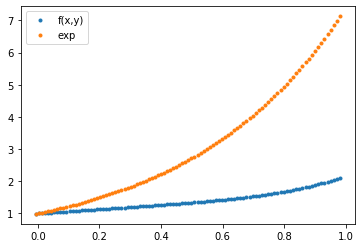

count:  142
step:  0 , Cost:  2.7629526 

step:  25 , Cost:  2.7559388 

step:  50 , Cost:  2.748967 





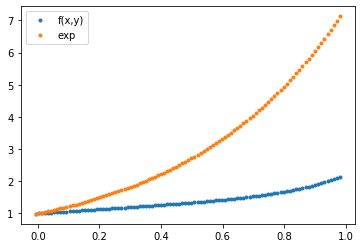

count:  143
step:  0 , Cost:  2.7486885 

step:  25 , Cost:  2.741759 

step:  50 , Cost:  2.73487 





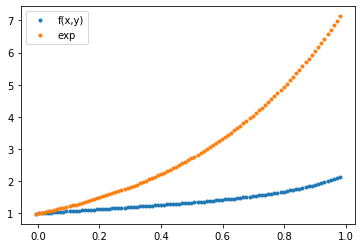

count:  144
step:  0 , Cost:  2.7345955 

step:  25 , Cost:  2.7277484 

step:  50 , Cost:  2.7209418 





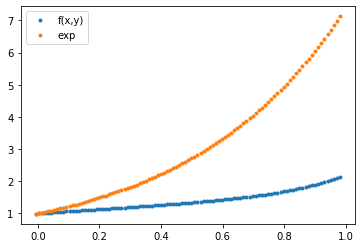

count:  145
step:  0 , Cost:  2.7206702 

step:  25 , Cost:  2.713905 

step:  50 , Cost:  2.7071795 





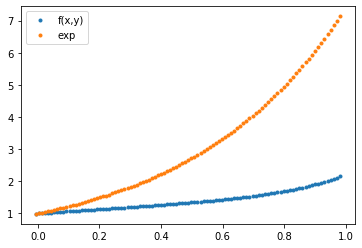

count:  146
step:  0 , Cost:  2.7069113 

step:  25 , Cost:  2.700227 

step:  50 , Cost:  2.693582 





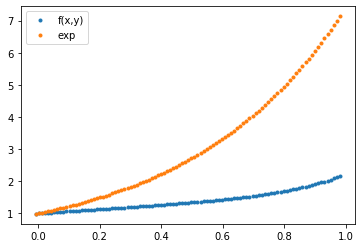

count:  147
step:  0 , Cost:  2.6933167 

step:  25 , Cost:  2.6867123 

step:  50 , Cost:  2.680146 





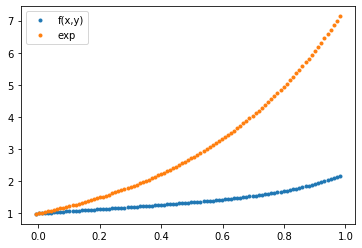

count:  148
step:  0 , Cost:  2.6798844 

step:  25 , Cost:  2.6733582 

step:  50 , Cost:  2.6668708 





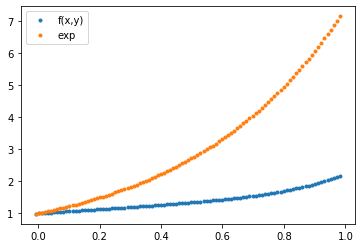

count:  149
step:  0 , Cost:  2.6666117 

step:  25 , Cost:  2.6601636 

step:  50 , Cost:  2.6537533 





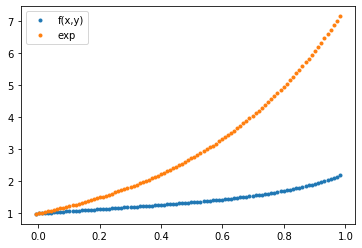

count:  150
step:  0 , Cost:  2.6534972 

step:  25 , Cost:  2.6471267 

step:  50 , Cost:  2.6407928 





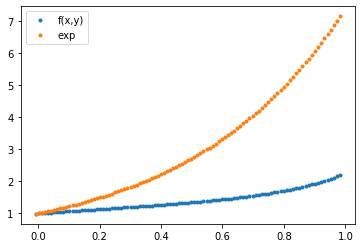

count:  151
step:  0 , Cost:  2.6405401 

step:  25 , Cost:  2.6342447 

step:  50 , Cost:  2.6279871 





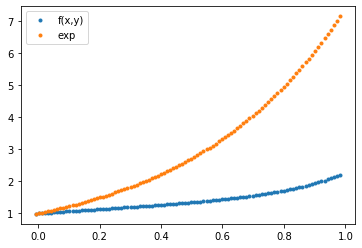

count:  152
step:  0 , Cost:  2.6277375 

step:  25 , Cost:  2.6215177 

step:  50 , Cost:  2.6153343 





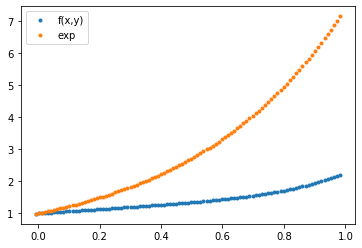

count:  153
step:  0 , Cost:  2.6150873 

step:  25 , Cost:  2.6089416 

step:  50 , Cost:  2.602831 





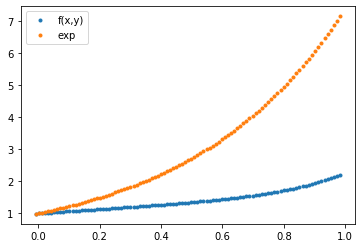

count:  154
step:  0 , Cost:  2.6025872 

step:  25 , Cost:  2.5965142 

step:  50 , Cost:  2.5904768 





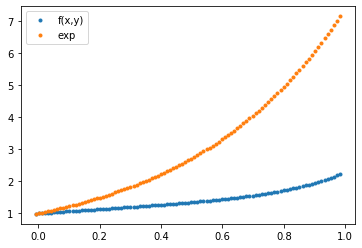

count:  155
step:  0 , Cost:  2.590236 

step:  25 , Cost:  2.5842342 

step:  50 , Cost:  2.578268 





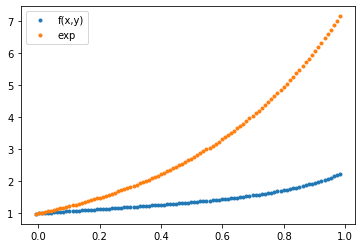

count:  156
step:  0 , Cost:  2.5780303 

step:  25 , Cost:  2.5721002 

step:  50 , Cost:  2.5662048 





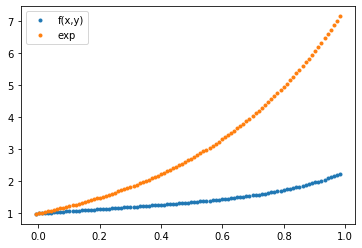

count:  157
step:  0 , Cost:  2.5659695 

step:  25 , Cost:  2.5601099 

step:  50 , Cost:  2.5542843 





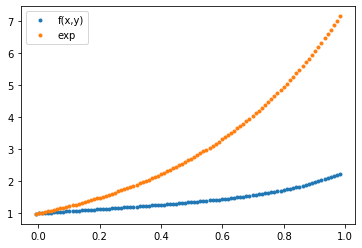

count:  158
step:  0 , Cost:  2.554052 

step:  25 , Cost:  2.5482624 

step:  50 , Cost:  2.542506 





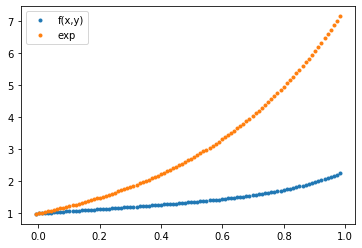

count:  159
step:  0 , Cost:  2.5422764 

step:  25 , Cost:  2.5365548 

step:  50 , Cost:  2.5308664 





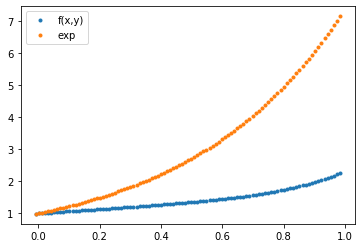

count:  160
step:  0 , Cost:  2.5306396 

step:  25 , Cost:  2.5249858 

step:  50 , Cost:  2.5193653 





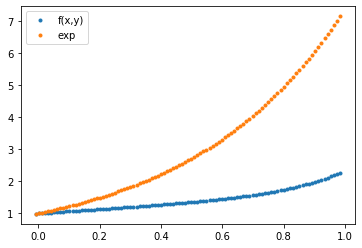

count:  161
step:  0 , Cost:  2.5191412 

step:  25 , Cost:  2.513554 

step:  50 , Cost:  2.508 





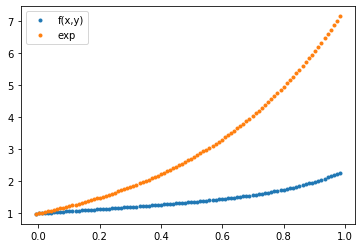

count:  162
step:  0 , Cost:  2.5077784 

step:  25 , Cost:  2.502258 

step:  50 , Cost:  2.4967687 





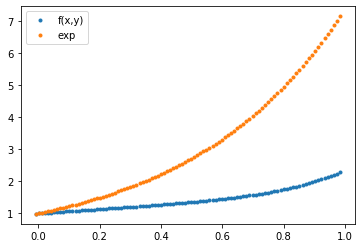

count:  163
step:  0 , Cost:  2.49655 

step:  25 , Cost:  2.491094 

step:  50 , Cost:  2.48567 





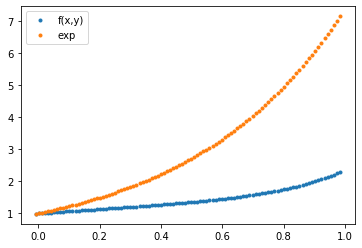

count:  164
step:  0 , Cost:  2.485454 

step:  25 , Cost:  2.4800625 

step:  50 , Cost:  2.4747026 





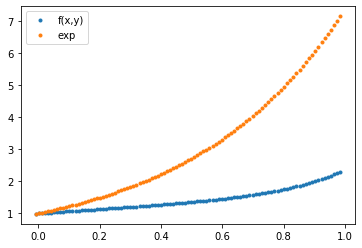

count:  165
step:  0 , Cost:  2.4744887 

step:  25 , Cost:  2.4691613 

step:  50 , Cost:  2.4638643 





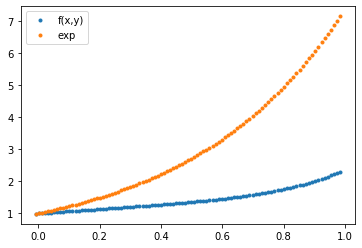

count:  166
step:  0 , Cost:  2.4636528 

step:  25 , Cost:  2.4583876 

step:  50 , Cost:  2.4531524 





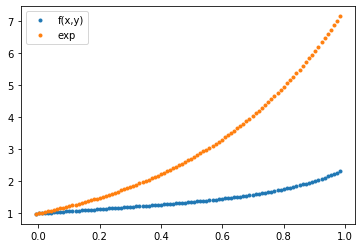

count:  167
step:  0 , Cost:  2.4529436 

step:  25 , Cost:  2.44774 

step:  50 , Cost:  2.4425662 





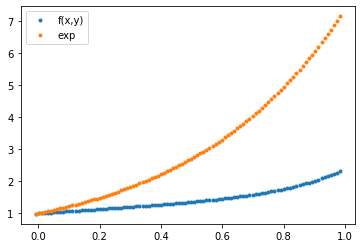

count:  168
step:  0 , Cost:  2.4423597 

step:  25 , Cost:  2.437217 

step:  50 , Cost:  2.432104 





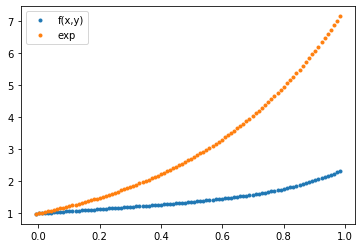

count:  169
step:  0 , Cost:  2.4319005 

step:  25 , Cost:  2.4268181 

step:  50 , Cost:  2.4217653 





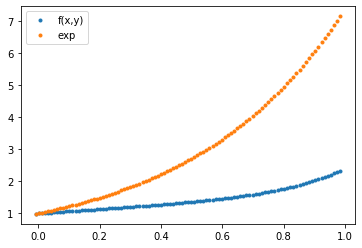

count:  170
step:  0 , Cost:  2.421564 

step:  25 , Cost:  2.416541 

step:  50 , Cost:  2.4115472 





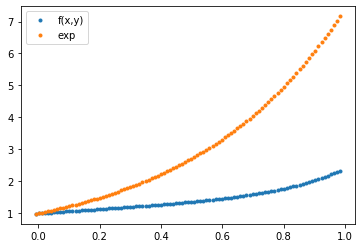

count:  171
step:  0 , Cost:  2.411348 

step:  25 , Cost:  2.406384 

step:  50 , Cost:  2.4014482 





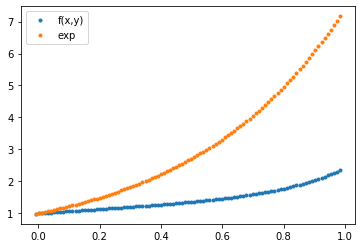

count:  172
step:  0 , Cost:  2.4012518 

step:  25 , Cost:  2.3963456 

step:  50 , Cost:  2.3914678 





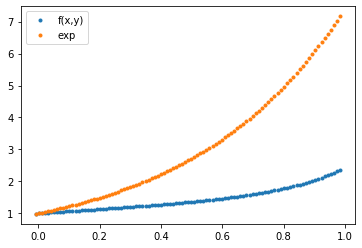

count:  173
step:  0 , Cost:  2.3912733 

step:  25 , Cost:  2.3864243 

step:  50 , Cost:  2.381603 





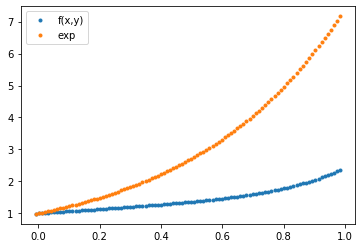

count:  174
step:  0 , Cost:  2.3814108 

step:  25 , Cost:  2.3766184 

step:  50 , Cost:  2.371853 





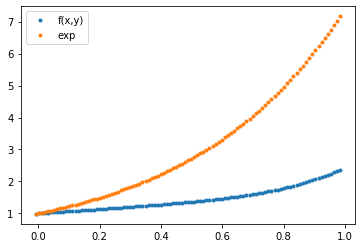

count:  175
step:  0 , Cost:  2.3716629 

step:  25 , Cost:  2.3669262 

step:  50 , Cost:  2.3622165 





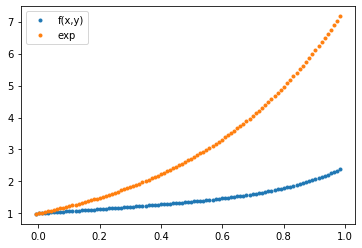

count:  176
step:  0 , Cost:  2.3620286 

step:  25 , Cost:  2.3573465 

step:  50 , Cost:  2.352692 





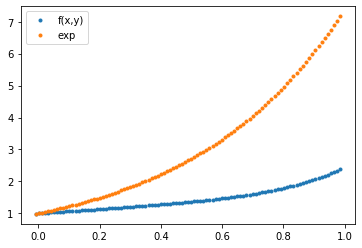

count:  177
step:  0 , Cost:  2.3525062 

step:  25 , Cost:  2.3478787 

step:  50 , Cost:  2.3432777 





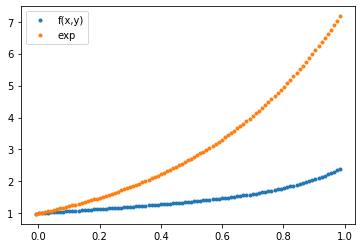

count:  178
step:  0 , Cost:  2.343094 

step:  25 , Cost:  2.3385203 

step:  50 , Cost:  2.333972 





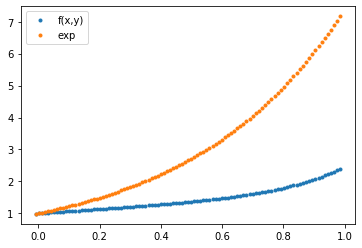

count:  179
step:  0 , Cost:  2.3337908 

step:  25 , Cost:  2.3292696 

step:  50 , Cost:  2.3247738 





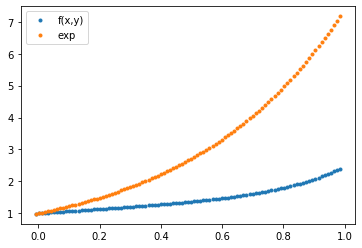

count:  180
step:  0 , Cost:  2.3245945 

step:  25 , Cost:  2.3201258 

step:  50 , Cost:  2.315682 





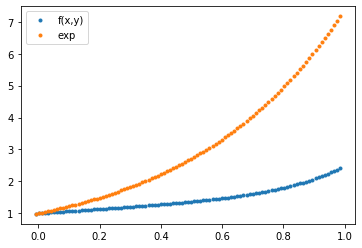

count:  181
step:  0 , Cost:  2.3155046 

step:  25 , Cost:  2.3110867 

step:  50 , Cost:  2.3066943 





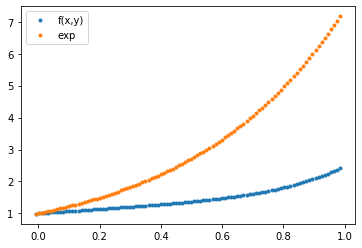

count:  182
step:  0 , Cost:  2.3065188 

step:  25 , Cost:  2.3021517 

step:  50 , Cost:  2.2978094 





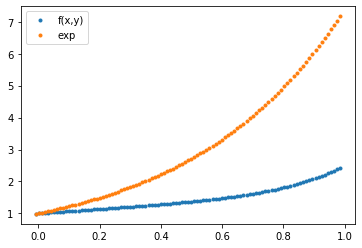

count:  183
step:  0 , Cost:  2.297636 

step:  25 , Cost:  2.2933187 

step:  50 , Cost:  2.2890258 





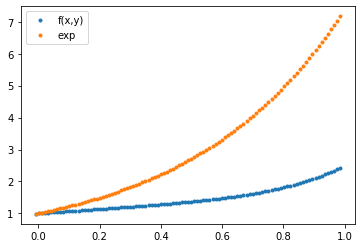

count:  184
step:  0 , Cost:  2.2888546 

step:  25 , Cost:  2.2845867 

step:  50 , Cost:  2.280343 





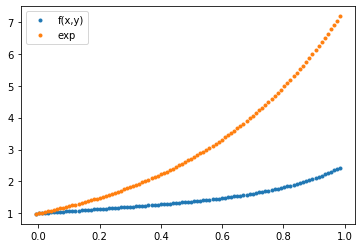

count:  185
step:  0 , Cost:  2.2801738 

step:  25 , Cost:  2.2759545 

step:  50 , Cost:  2.2717593 





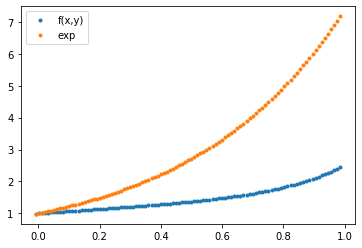

count:  186
step:  0 , Cost:  2.2715917 

step:  25 , Cost:  2.2674203 

step:  50 , Cost:  2.2632725 





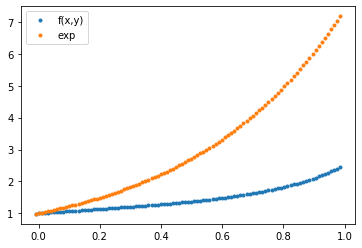

count:  187
step:  0 , Cost:  2.263107 

step:  25 , Cost:  2.2589834 

step:  50 , Cost:  2.254882 





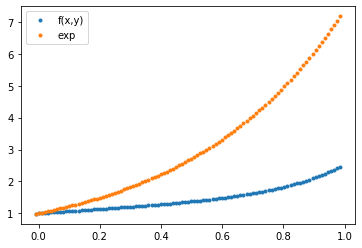

count:  188
step:  0 , Cost:  2.2547185 

step:  25 , Cost:  2.2506416 

step:  50 , Cost:  2.2465868 





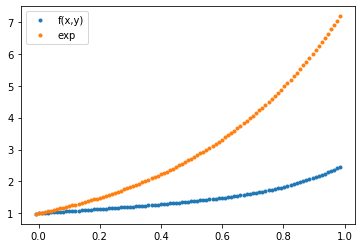

count:  189
step:  0 , Cost:  2.2464252 

step:  25 , Cost:  2.2423942 

step:  50 , Cost:  2.2383854 





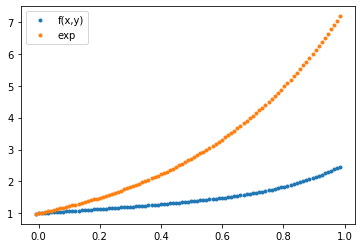

count:  190
step:  0 , Cost:  2.2382255 

step:  25 , Cost:  2.2342405 

step:  50 , Cost:  2.230277 





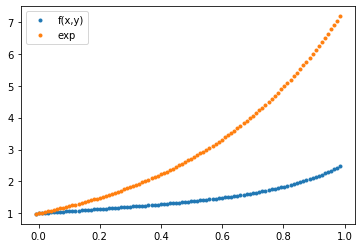

count:  191
step:  0 , Cost:  2.2301195 

step:  25 , Cost:  2.2261786 

step:  50 , Cost:  2.2222598 





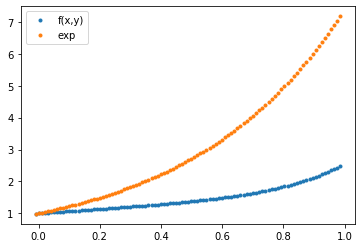

count:  192
step:  0 , Cost:  2.2221034 

step:  25 , Cost:  2.2182071 

step:  50 , Cost:  2.2143323 





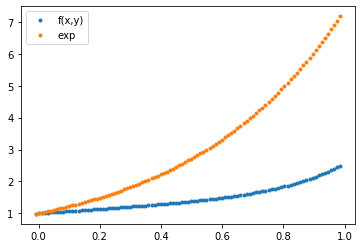

count:  193
step:  0 , Cost:  2.2141776 

step:  25 , Cost:  2.2103252 

step:  50 , Cost:  2.2064943 





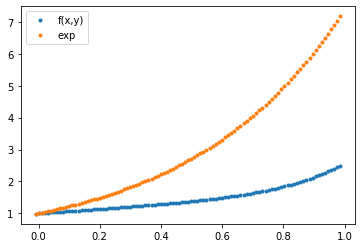

count:  194
step:  0 , Cost:  2.2063415 

step:  25 , Cost:  2.2025323 

step:  50 , Cost:  2.1987438 





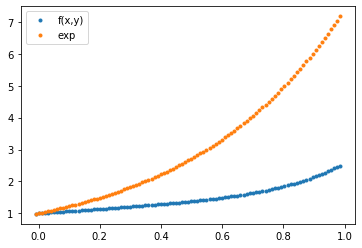

count:  195
step:  0 , Cost:  2.1985924 

step:  25 , Cost:  2.1948254 

step:  50 , Cost:  2.191079 





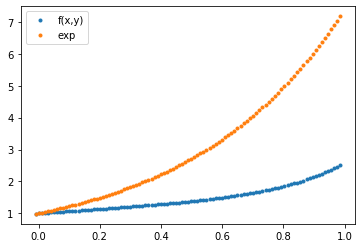

count:  196
step:  0 , Cost:  2.1909292 

step:  25 , Cost:  2.187204 

step:  50 , Cost:  2.1834986 





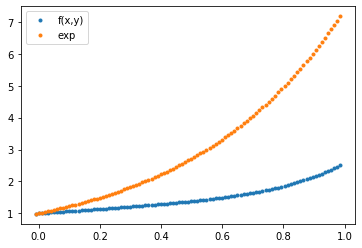

count:  197
step:  0 , Cost:  2.1833506 

step:  25 , Cost:  2.1796658 

step:  50 , Cost:  2.1760013 





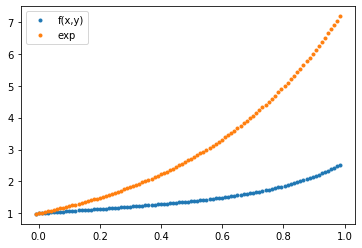

count:  198
step:  0 , Cost:  2.1758552 

step:  25 , Cost:  2.1722112 

step:  50 , Cost:  2.168587 





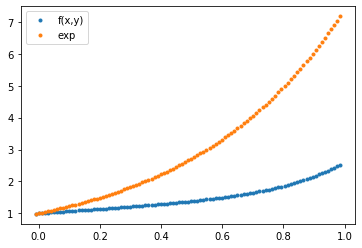

count:  199
step:  0 , Cost:  2.1684427 

step:  25 , Cost:  2.1648393 

step:  50 , Cost:  2.161255 





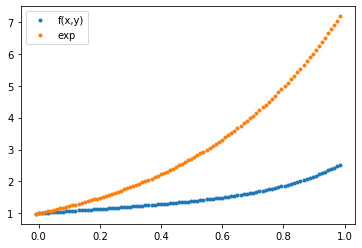

count:  200
step:  0 , Cost:  2.1611123 

step:  25 , Cost:  2.1575477 

step:  50 , Cost:  2.154003 





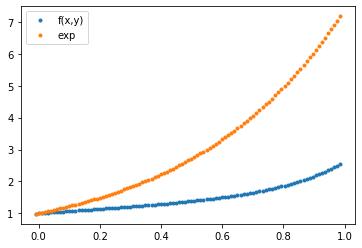

count:  201
step:  0 , Cost:  2.1538613 

step:  25 , Cost:  2.1503363 

step:  50 , Cost:  2.1468303 





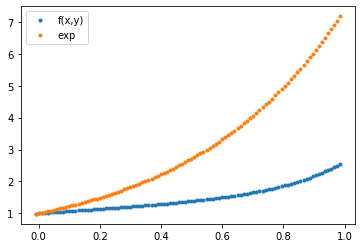

count:  202
step:  0 , Cost:  2.1466904 

step:  25 , Cost:  2.1432037 

step:  50 , Cost:  2.1397357 





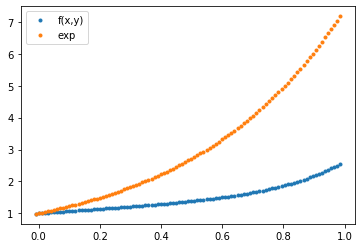

count:  203
step:  0 , Cost:  2.1395974 

step:  25 , Cost:  2.1361485 

step:  50 , Cost:  2.132718 





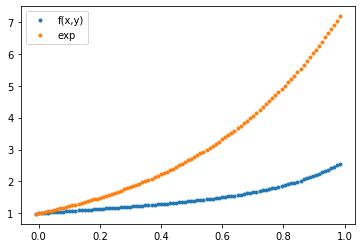

count:  204
step:  0 , Cost:  2.1325815 

step:  25 , Cost:  2.1291697 

step:  50 , Cost:  2.1257768 





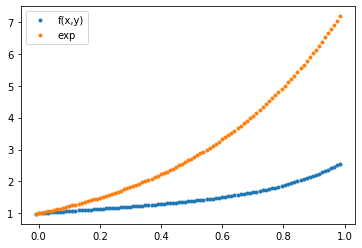

count:  205
step:  0 , Cost:  2.1256416 

step:  25 , Cost:  2.122267 

step:  50 , Cost:  2.1189106 





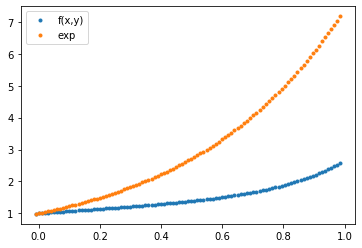

count:  206
step:  0 , Cost:  2.1187766 

step:  25 , Cost:  2.1154385 

step:  50 , Cost:  2.1121178 





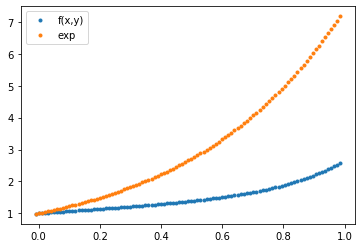

count:  207
step:  0 , Cost:  2.1119857 

step:  25 , Cost:  2.108683 

step:  50 , Cost:  2.1053982 





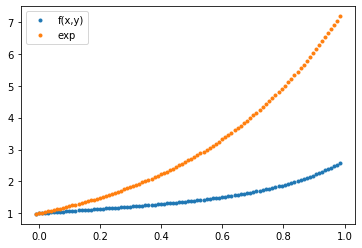

count:  208
step:  0 , Cost:  2.1052673 

step:  25 , Cost:  2.1020002 

step:  50 , Cost:  2.09875 





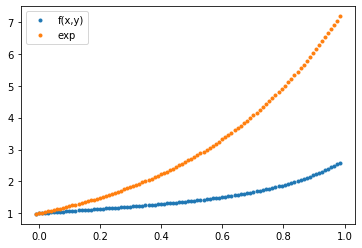

count:  209
step:  0 , Cost:  2.0986207 

step:  25 , Cost:  2.0953882 

step:  50 , Cost:  2.092173 





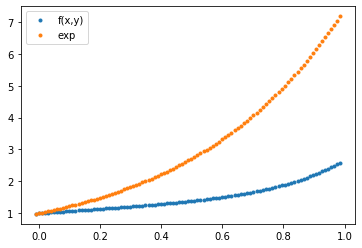

count:  210
step:  0 , Cost:  2.092045 

step:  25 , Cost:  2.0888467 

step:  50 , Cost:  2.085666 





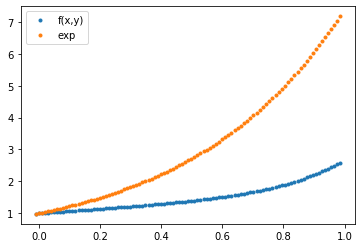

count:  211
step:  0 , Cost:  2.0855393 

step:  25 , Cost:  2.082375 

step:  50 , Cost:  2.0792272 





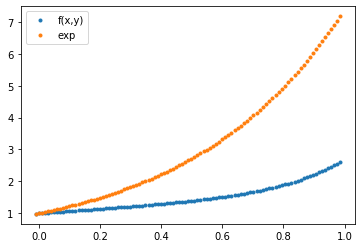

count:  212
step:  0 , Cost:  2.0791018 

step:  25 , Cost:  2.0759711 

step:  50 , Cost:  2.0728562 





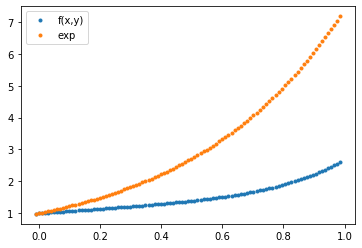

count:  213
step:  0 , Cost:  2.072732 

step:  25 , Cost:  2.0696337 

step:  50 , Cost:  2.0665514 





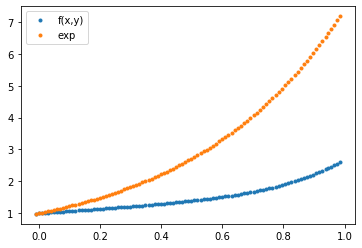

count:  214
step:  0 , Cost:  2.0664284 

step:  25 , Cost:  2.0633626 

step:  50 , Cost:  2.0603123 





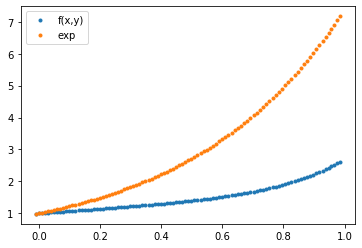

count:  215
step:  0 , Cost:  2.0601904 

step:  25 , Cost:  2.0571563 

step:  50 , Cost:  2.0541375 





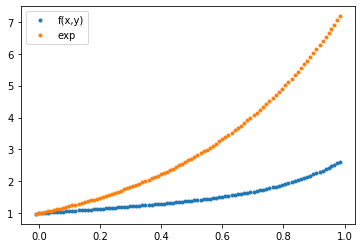

count:  216
step:  0 , Cost:  2.054017 

step:  25 , Cost:  2.0510147 

step:  50 , Cost:  2.0480268 





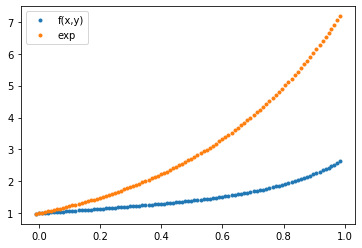

count:  217
step:  0 , Cost:  2.0479078 

step:  25 , Cost:  2.0449362 

step:  50 , Cost:  2.041979 





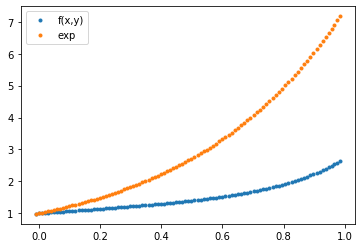

count:  218
step:  0 , Cost:  2.041861 

step:  25 , Cost:  2.0389194 

step:  50 , Cost:  2.0359926 





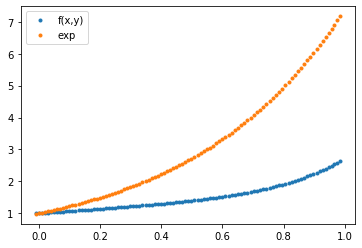

count:  219
step:  0 , Cost:  2.035876 

step:  25 , Cost:  2.0329645 

step:  50 , Cost:  2.0300672 





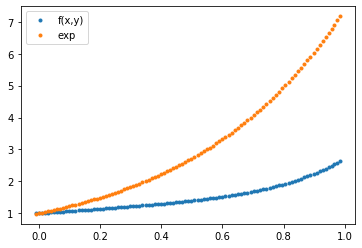

count:  220
step:  0 , Cost:  2.029952 

step:  25 , Cost:  2.0270698 

step:  50 , Cost:  2.0242023 





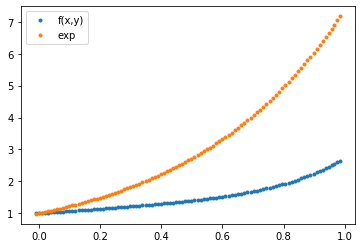

count:  221
step:  0 , Cost:  2.024088 

step:  25 , Cost:  2.021235 

step:  50 , Cost:  2.018396 





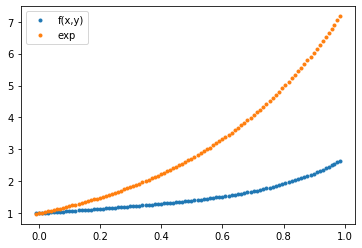

count:  222
step:  0 , Cost:  2.018283 

step:  25 , Cost:  2.015459 

step:  50 , Cost:  2.0126493 





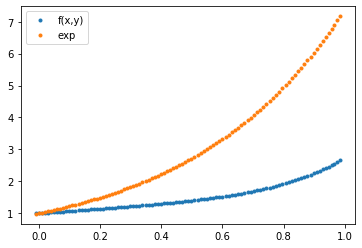

count:  223
step:  0 , Cost:  2.0125372 

step:  25 , Cost:  2.009742 

step:  50 , Cost:  2.0069602 





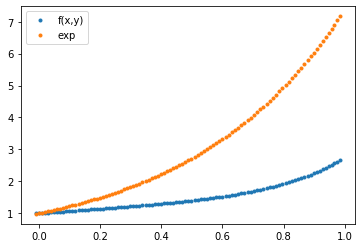

count:  224
step:  0 , Cost:  2.006849 

step:  25 , Cost:  2.004082 

step:  50 , Cost:  2.0013278 





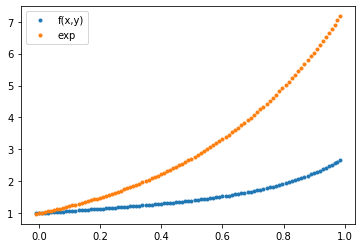

count:  225
step:  0 , Cost:  2.001218 

step:  25 , Cost:  1.9984784 

step:  50 , Cost:  1.995752 





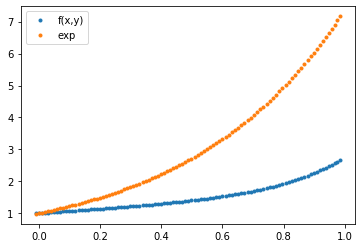

count:  226
step:  0 , Cost:  1.9956433 

step:  25 , Cost:  1.9929303 

step:  50 , Cost:  1.9902307 





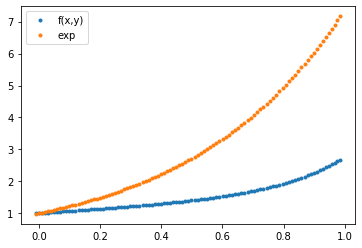

count:  227
step:  0 , Cost:  1.9901228 

step:  25 , Cost:  1.9874365 

step:  50 , Cost:  1.9847634 





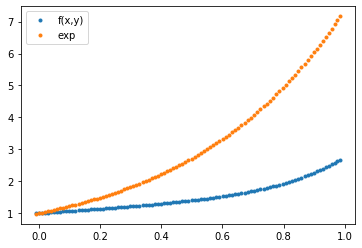

count:  228
step:  0 , Cost:  1.9846567 

step:  25 , Cost:  1.9819969 

step:  50 , Cost:  1.9793496 





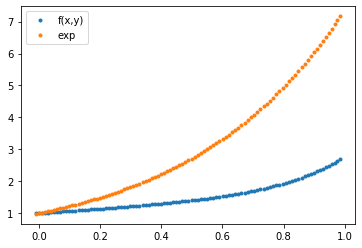

count:  229
step:  0 , Cost:  1.9792441 

step:  25 , Cost:  1.9766103 

step:  50 , Cost:  1.9739892 





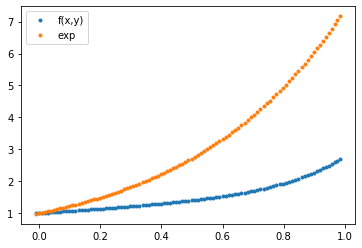

count:  230
step:  0 , Cost:  1.9738847 

step:  25 , Cost:  1.9712763 

step:  50 , Cost:  1.9686801 





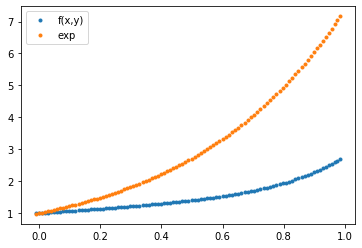

count:  231
step:  0 , Cost:  1.9685766 

step:  25 , Cost:  1.9659935 

step:  50 , Cost:  1.9634223 





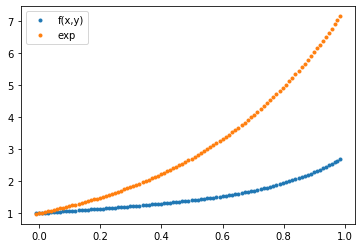

count:  232
step:  0 , Cost:  1.9633199 

step:  25 , Cost:  1.9607614 

step:  50 , Cost:  1.958215 





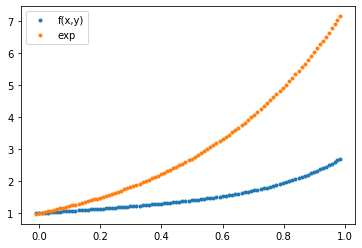

count:  233
step:  0 , Cost:  1.9581131 

step:  25 , Cost:  1.955579 

step:  50 , Cost:  1.9530569 





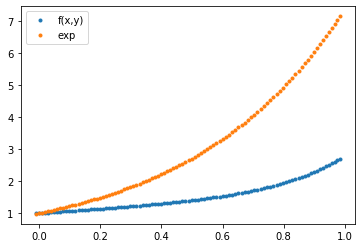

count:  234
step:  0 , Cost:  1.9529562 

step:  25 , Cost:  1.950446 

step:  50 , Cost:  1.9479474 





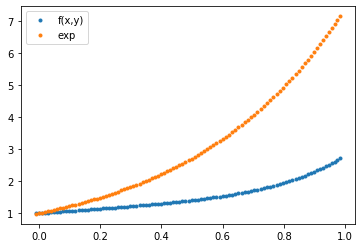

count:  235
step:  0 , Cost:  1.9478477 

step:  25 , Cost:  1.9453615 

step:  50 , Cost:  1.9428865 





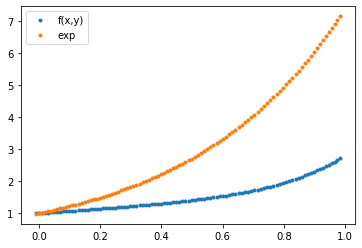

count:  236
step:  0 , Cost:  1.9427879 

step:  25 , Cost:  1.9403243 

step:  50 , Cost:  1.9378726 





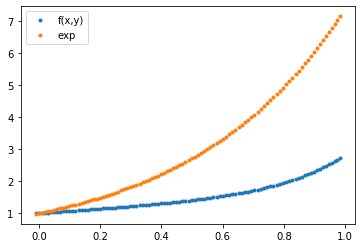

count:  237
step:  0 , Cost:  1.937775 

step:  25 , Cost:  1.9353344 

step:  50 , Cost:  1.9329054 





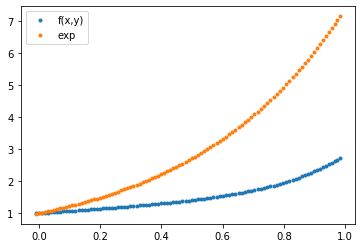

count:  238
step:  0 , Cost:  1.9328084 

step:  25 , Cost:  1.9303908 

step:  50 , Cost:  1.9279845 





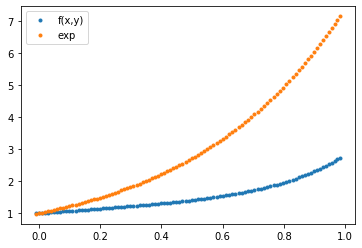

count:  239
step:  0 , Cost:  1.9278882 

step:  25 , Cost:  1.9254931 

step:  50 , Cost:  1.9231083 





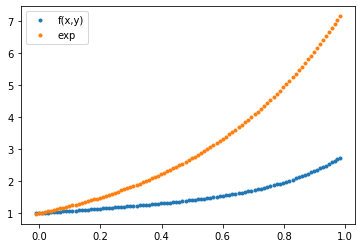

count:  240
step:  0 , Cost:  1.9230133 

step:  25 , Cost:  1.9206398 

step:  50 , Cost:  1.9182771 





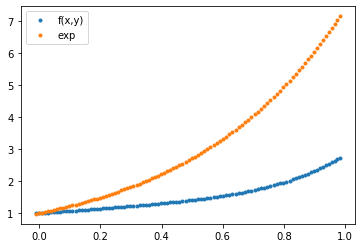

count:  241
step:  0 , Cost:  1.9181827 

step:  25 , Cost:  1.9158307 

step:  50 , Cost:  1.9134896 





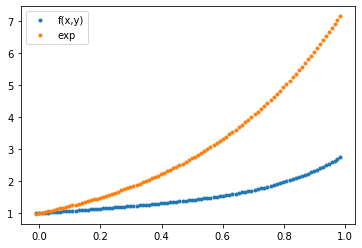

count:  242
step:  0 , Cost:  1.9133965 

step:  25 , Cost:  1.9110657 

step:  50 , Cost:  1.9087459 





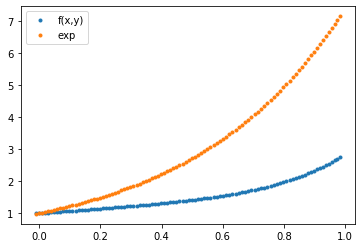

count:  243
step:  0 , Cost:  1.9086533 

step:  25 , Cost:  1.9063443 

step:  50 , Cost:  1.904045 





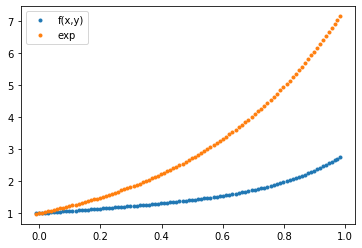

count:  244
step:  0 , Cost:  1.9039532 

step:  25 , Cost:  1.9016644 

step:  50 , Cost:  1.8993863 





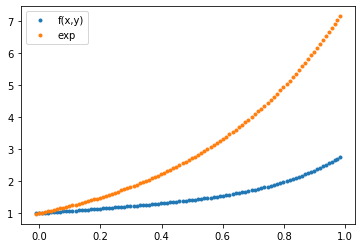

count:  245
step:  0 , Cost:  1.8992954 

step:  25 , Cost:  1.8970273 

step:  50 , Cost:  1.894769 





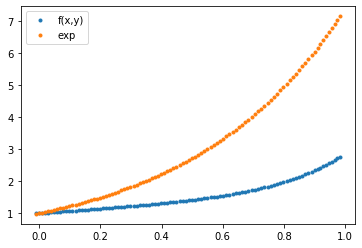

count:  246
step:  0 , Cost:  1.8946786 

step:  25 , Cost:  1.8924305 

step:  50 , Cost:  1.8901919 





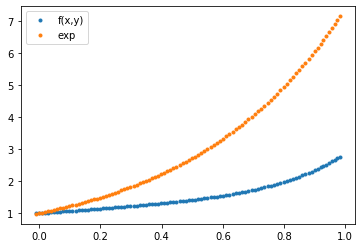

count:  247
step:  0 , Cost:  1.8901025 

step:  25 , Cost:  1.8878741 

step:  50 , Cost:  1.8856555 





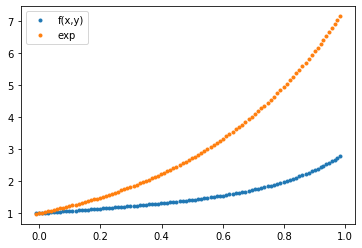

count:  248
step:  0 , Cost:  1.8855667 

step:  25 , Cost:  1.8833573 

step:  50 , Cost:  1.8811584 





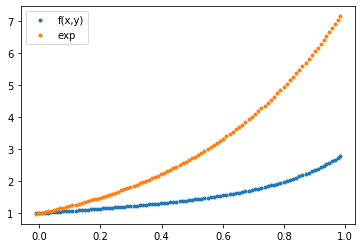

count:  249
step:  0 , Cost:  1.8810701 

step:  25 , Cost:  1.8788805 

step:  50 , Cost:  1.8766993 





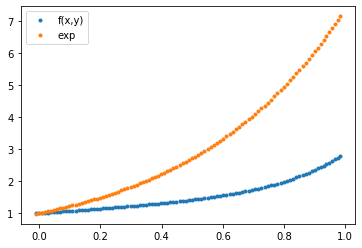

count:  250
step:  0 , Cost:  1.8766124 

step:  25 , Cost:  1.8744414 

step:  50 , Cost:  1.8722795 





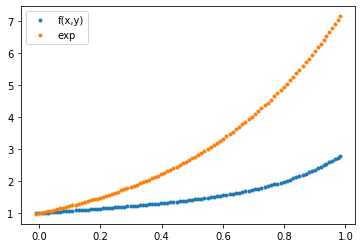

count:  251
step:  0 , Cost:  1.8721931 

step:  25 , Cost:  1.8700403 

step:  50 , Cost:  1.8678966 





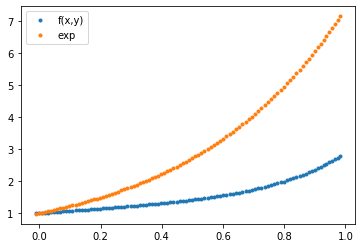

count:  252
step:  0 , Cost:  1.8678111 

step:  25 , Cost:  1.8656769 

step:  50 , Cost:  1.8635517 





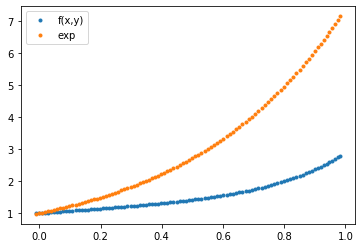

count:  253
step:  0 , Cost:  1.8634667 

step:  25 , Cost:  1.8613507 

step:  50 , Cost:  1.8592435 





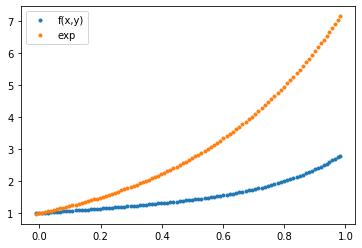

count:  254
step:  0 , Cost:  1.8591592 

step:  25 , Cost:  1.8570606 

step:  50 , Cost:  1.8549712 





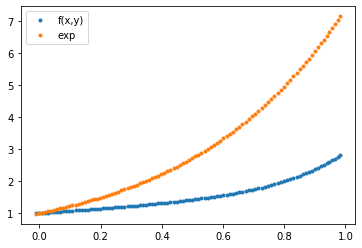

count:  255
step:  0 , Cost:  1.8548875 

step:  25 , Cost:  1.8528066 

step:  50 , Cost:  1.850734 





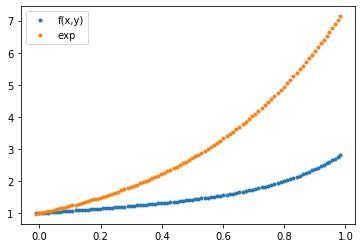

count:  256
step:  0 , Cost:  1.8506513 

step:  25 , Cost:  1.8485876 

step:  50 , Cost:  1.846533 





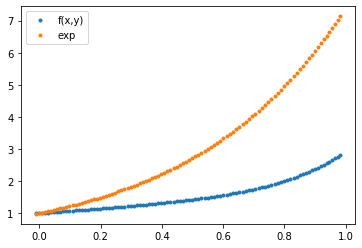

count:  257
step:  0 , Cost:  1.8464507 

step:  25 , Cost:  1.844404 

step:  50 , Cost:  1.8423653 





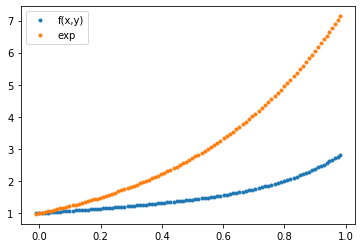

count:  258
step:  0 , Cost:  1.8422841 

step:  25 , Cost:  1.8402542 

step:  50 , Cost:  1.8382325 





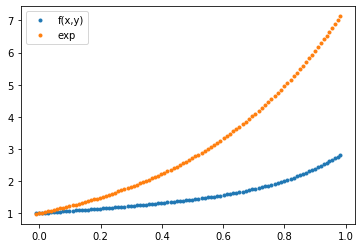

count:  259
step:  0 , Cost:  1.8381518 

step:  25 , Cost:  1.8361381 

step:  50 , Cost:  1.8341327 





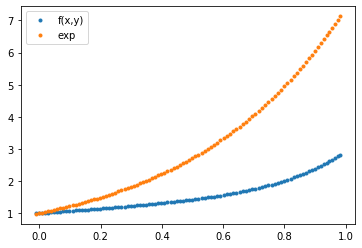

count:  260
step:  0 , Cost:  1.8340529 

step:  25 , Cost:  1.8320556 

step:  50 , Cost:  1.8300666 





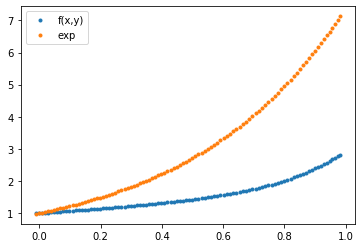

count:  261
step:  0 , Cost:  1.829987 

step:  25 , Cost:  1.8280064 

step:  50 , Cost:  1.8260335 





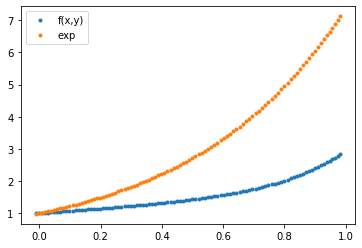

count:  262
step:  0 , Cost:  1.8259548 

step:  25 , Cost:  1.8239892 

step:  50 , Cost:  1.8220314 





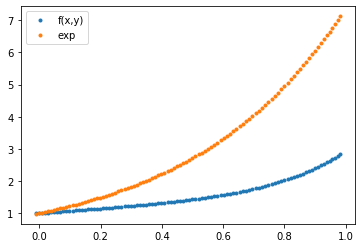

count:  263
step:  0 , Cost:  1.8219534 

step:  25 , Cost:  1.820004 

step:  50 , Cost:  1.8180617 





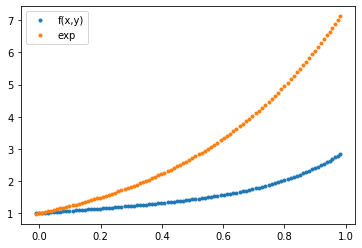

count:  264
step:  0 , Cost:  1.8179843 

step:  25 , Cost:  1.8160503 

step:  50 , Cost:  1.8141236 





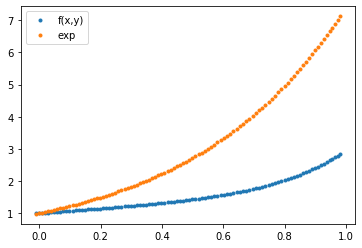

count:  265
step:  0 , Cost:  1.8140466 

step:  25 , Cost:  1.8121276 

step:  50 , Cost:  1.8102156 





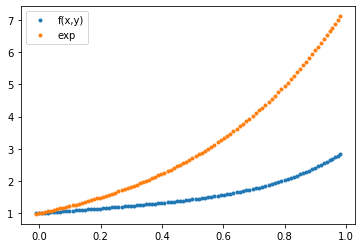

count:  266
step:  0 , Cost:  1.8101393 

step:  25 , Cost:  1.8082348 

step:  50 , Cost:  1.8063377 





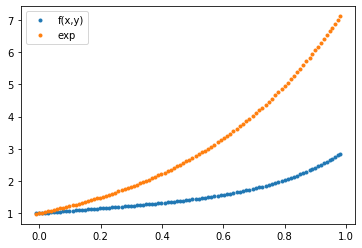

count:  267
step:  0 , Cost:  1.806262 

step:  25 , Cost:  1.804372 

step:  50 , Cost:  1.8024892 





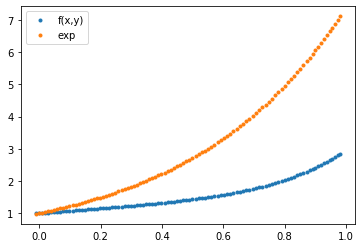

count:  268
step:  0 , Cost:  1.8024141 

step:  25 , Cost:  1.8005385 

step:  50 , Cost:  1.7986699 





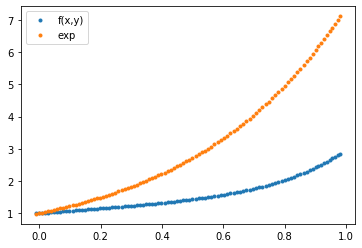

count:  269
step:  0 , Cost:  1.7985951 

step:  25 , Cost:  1.7967333 

step:  50 , Cost:  1.7948787 





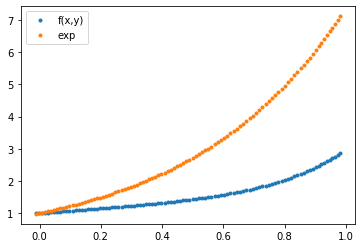

count:  270
step:  0 , Cost:  1.7948046 

step:  25 , Cost:  1.7929574 

step:  50 , Cost:  1.7911162 





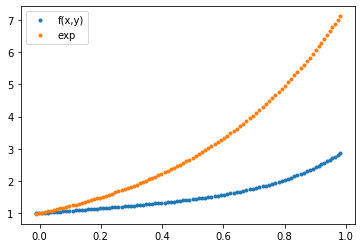

count:  271
step:  0 , Cost:  1.7910428 

step:  25 , Cost:  1.789209 

step:  50 , Cost:  1.7873813 





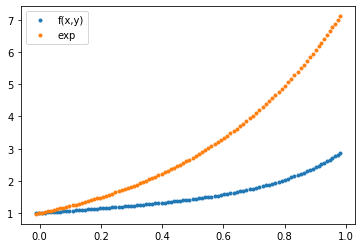

count:  272
step:  0 , Cost:  1.7873087 

step:  25 , Cost:  1.785488 

step:  50 , Cost:  1.7836739 





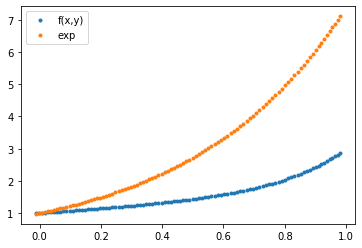

count:  273
step:  0 , Cost:  1.7836015 

step:  25 , Cost:  1.7817943 

step:  50 , Cost:  1.7799935 





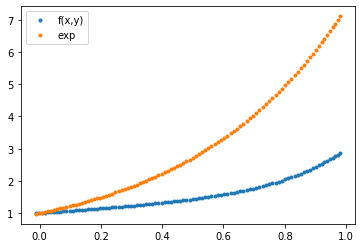

count:  274
step:  0 , Cost:  1.7799218 

step:  25 , Cost:  1.7781273 

step:  50 , Cost:  1.776339 





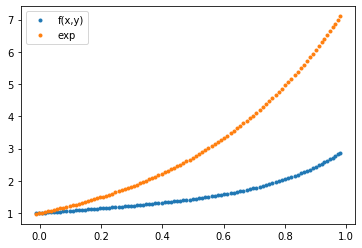

count:  275
step:  0 , Cost:  1.776268 

step:  25 , Cost:  1.7744869 

step:  50 , Cost:  1.7727122 





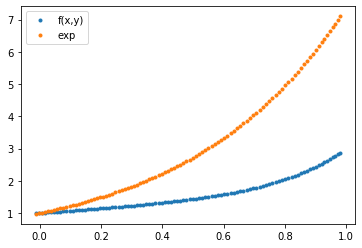

count:  276
step:  0 , Cost:  1.7726414 

step:  25 , Cost:  1.770873 

step:  50 , Cost:  1.7691102 





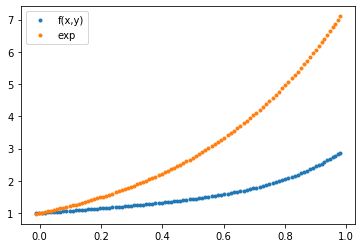

count:  277
step:  0 , Cost:  1.7690401 

step:  25 , Cost:  1.7672843 

step:  50 , Cost:  1.7655345 





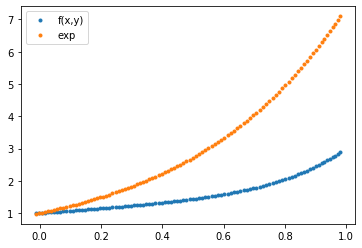

count:  278
step:  0 , Cost:  1.7654647 

step:  25 , Cost:  1.7637209 

step:  50 , Cost:  1.7619834 





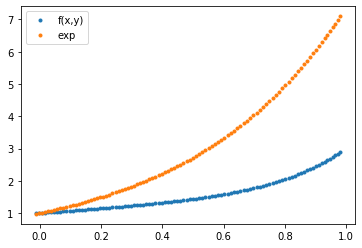

count:  279
step:  0 , Cost:  1.761914 

step:  25 , Cost:  1.7601826 

step:  50 , Cost:  1.7584571 





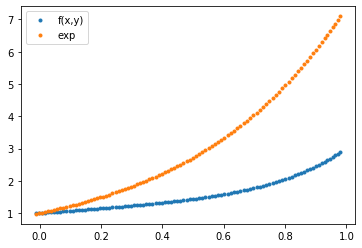

count:  280
step:  0 , Cost:  1.7583882 

step:  25 , Cost:  1.7566686 

step:  50 , Cost:  1.7549549 





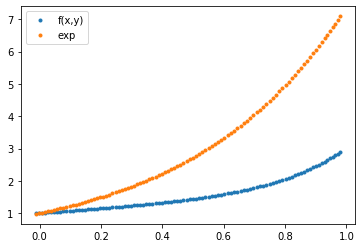

count:  281
step:  0 , Cost:  1.7548865 

step:  25 , Cost:  1.7531793 

step:  50 , Cost:  1.7514778 





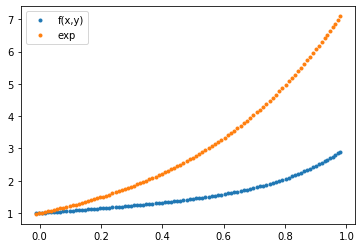

count:  282
step:  0 , Cost:  1.7514099 

step:  25 , Cost:  1.7497135 

step:  50 , Cost:  1.7480233 





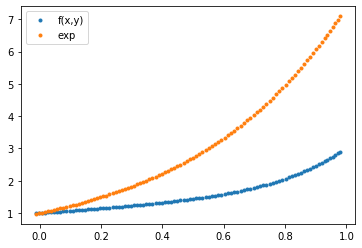

count:  283
step:  0 , Cost:  1.7479558 

step:  25 , Cost:  1.7462715 

step:  50 , Cost:  1.744593 





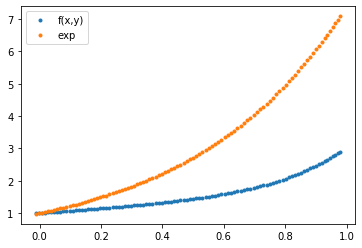

count:  284
step:  0 , Cost:  1.7445258 

step:  25 , Cost:  1.7428527 

step:  50 , Cost:  1.741185 





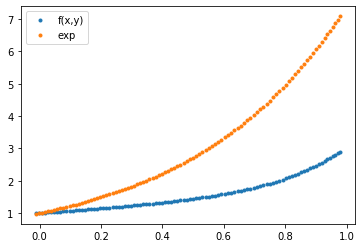

count:  285
step:  0 , Cost:  1.741118 

step:  25 , Cost:  1.7394558 

step:  50 , Cost:  1.7377995 





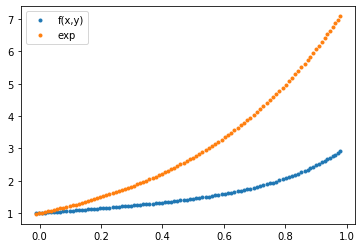

count:  286
step:  0 , Cost:  1.7377335 

step:  25 , Cost:  1.7360822 

step:  50 , Cost:  1.7344364 





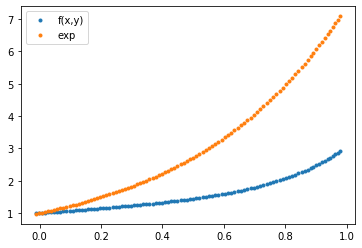

count:  287
step:  0 , Cost:  1.7343707 

step:  25 , Cost:  1.7327304 

step:  50 , Cost:  1.7310959 





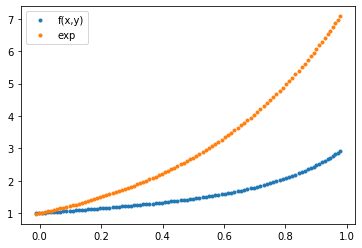

count:  288
step:  0 , Cost:  1.7310305 

step:  25 , Cost:  1.7294011 

step:  50 , Cost:  1.7277765 





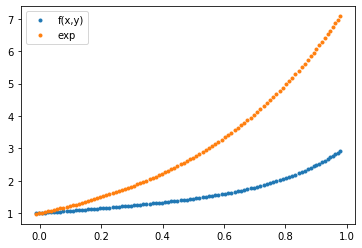

count:  289
step:  0 , Cost:  1.7277117 

step:  25 , Cost:  1.7260928 

step:  50 , Cost:  1.7244796 





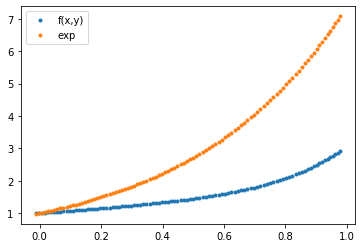

count:  290
step:  0 , Cost:  1.7244152 

step:  25 , Cost:  1.7228072 

step:  50 , Cost:  1.7212039 





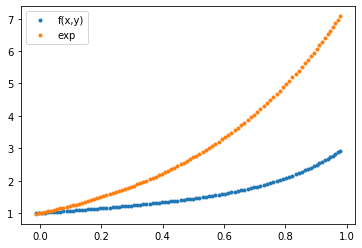

count:  291
step:  0 , Cost:  1.7211398 

step:  25 , Cost:  1.7195413 

step:  50 , Cost:  1.7179482 





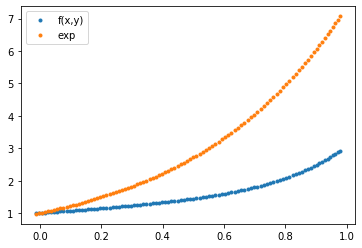

count:  292
step:  0 , Cost:  1.7178844 

step:  25 , Cost:  1.7162964 

step:  50 , Cost:  1.7147133 





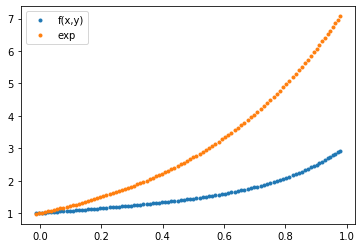

count:  293
step:  0 , Cost:  1.7146502 

step:  25 , Cost:  1.7130716 

step:  50 , Cost:  1.7114978 





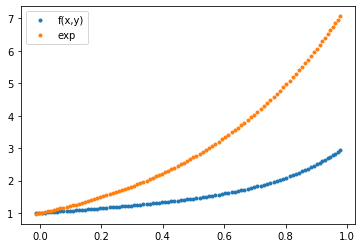

count:  294
step:  0 , Cost:  1.7114352 

step:  25 , Cost:  1.7098663 

step:  50 , Cost:  1.7083026 





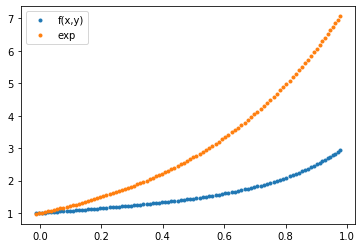

count:  295
step:  0 , Cost:  1.7082399 

step:  25 , Cost:  1.7066808 

step:  50 , Cost:  1.7051263 





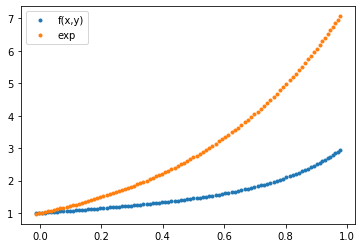

count:  296
step:  0 , Cost:  1.705064 

step:  25 , Cost:  1.7035146 

step:  50 , Cost:  1.7019696 





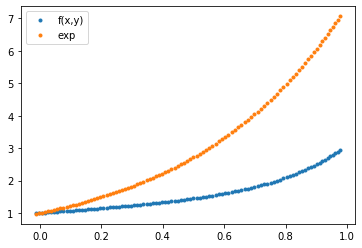

count:  297
step:  0 , Cost:  1.701908 

step:  25 , Cost:  1.7003682 

step:  50 , Cost:  1.6988324 





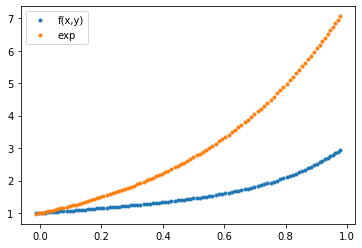

count:  298
step:  0 , Cost:  1.6987709 

step:  25 , Cost:  1.6972394 

step:  50 , Cost:  1.6957127 





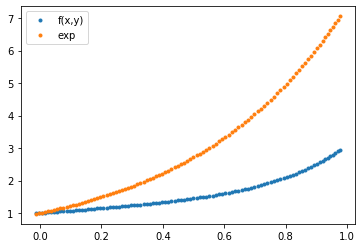

count:  299
step:  0 , Cost:  1.6956517 

step:  25 , Cost:  1.6941303 

step:  50 , Cost:  1.6926131 





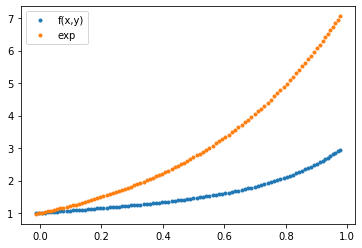

count:  300
step:  0 , Cost:  1.6925524 

step:  25 , Cost:  1.6910394 

step:  50 , Cost:  1.6895304 





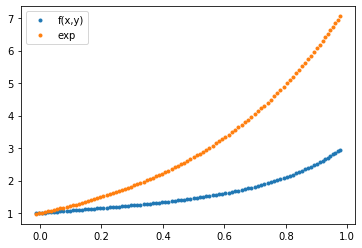

count:  301
step:  0 , Cost:  1.68947 

step:  25 , Cost:  1.6879661 

step:  50 , Cost:  1.6864661 





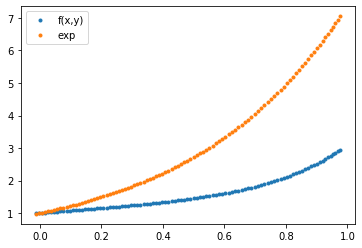

count:  302
step:  0 , Cost:  1.6864061 

step:  25 , Cost:  1.6849108 

step:  50 , Cost:  1.6834192 





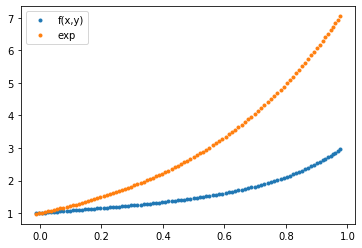

count:  303
step:  0 , Cost:  1.6833599 

step:  25 , Cost:  1.681873 

step:  50 , Cost:  1.6803906 





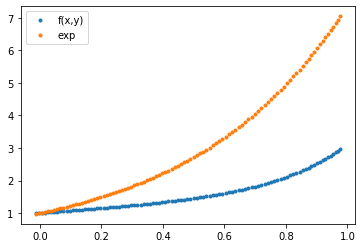

count:  304
step:  0 , Cost:  1.6803315 

step:  25 , Cost:  1.6788533 

step:  50 , Cost:  1.67738 





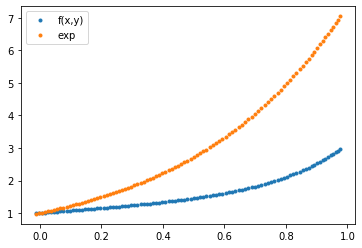

count:  305
step:  0 , Cost:  1.6773208 

step:  25 , Cost:  1.6758511 

step:  50 , Cost:  1.6743847 





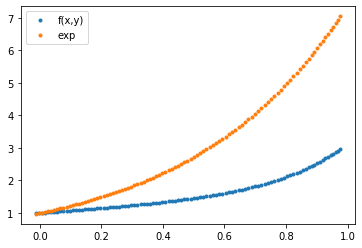

count:  306
step:  0 , Cost:  1.6743262 

step:  25 , Cost:  1.672865 

step:  50 , Cost:  1.6714073 





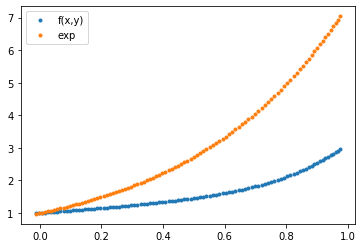

count:  307
step:  0 , Cost:  1.671349 

step:  25 , Cost:  1.6698961 

step:  50 , Cost:  1.668447 





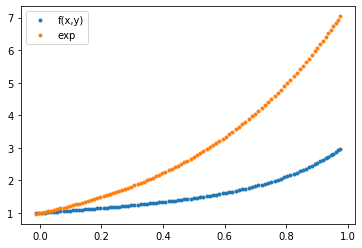

count:  308
step:  0 , Cost:  1.6683891 

step:  25 , Cost:  1.6669433 

step:  50 , Cost:  1.6655017 





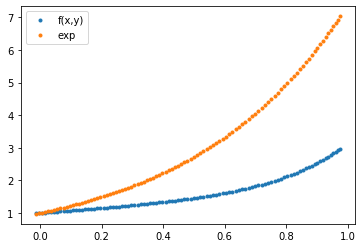

count:  309
step:  0 , Cost:  1.665444 

step:  25 , Cost:  1.6640067 

step:  50 , Cost:  1.6625727 





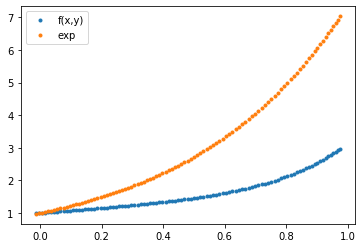

count:  310
step:  0 , Cost:  1.6625158 

step:  25 , Cost:  1.6610858 

step:  50 , Cost:  1.6596599 





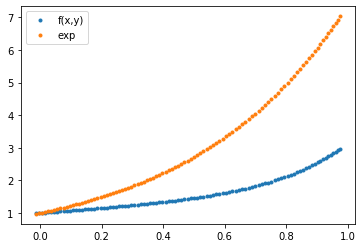

count:  311
step:  0 , Cost:  1.6596028 

step:  25 , Cost:  1.6581807 

step:  50 , Cost:  1.6567628 





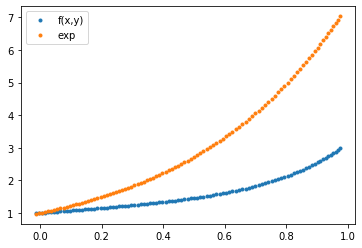

count:  312
step:  0 , Cost:  1.656706 

step:  25 , Cost:  1.6552919 

step:  50 , Cost:  1.6538817 





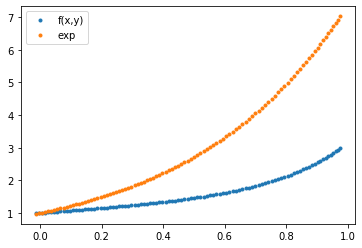

count:  313
step:  0 , Cost:  1.6538253 

step:  25 , Cost:  1.6524186 

step:  50 , Cost:  1.6510148 





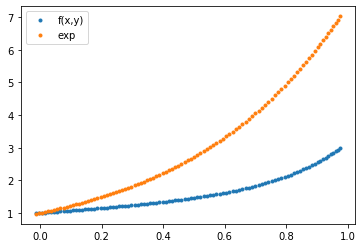

count:  314
step:  0 , Cost:  1.6509587 

step:  25 , Cost:  1.6495595 

step:  50 , Cost:  1.6481633 





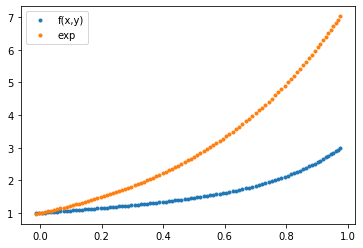

count:  315
step:  0 , Cost:  1.6481078 

step:  25 , Cost:  1.6467159 

step:  50 , Cost:  1.6453278 





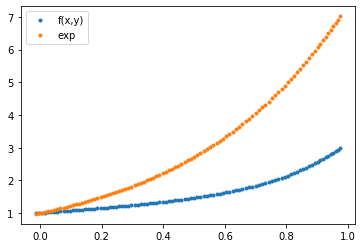

count:  316
step:  0 , Cost:  1.6452724 

step:  25 , Cost:  1.6438878 

step:  50 , Cost:  1.6425064 





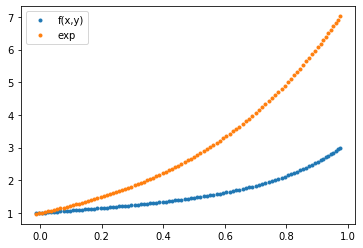

count:  317
step:  0 , Cost:  1.6424512 

step:  25 , Cost:  1.6410735 

step:  50 , Cost:  1.6396985 





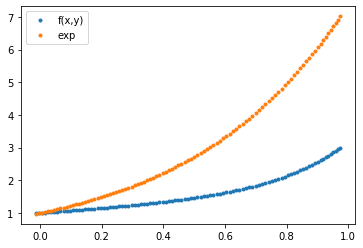

count:  318
step:  0 , Cost:  1.6396435 

step:  25 , Cost:  1.6382728 

step:  50 , Cost:  1.6369053 





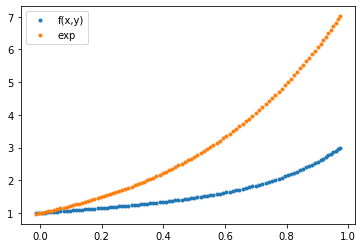

count:  319
step:  0 , Cost:  1.6368507 

step:  25 , Cost:  1.6354872 

step:  50 , Cost:  1.6341262 





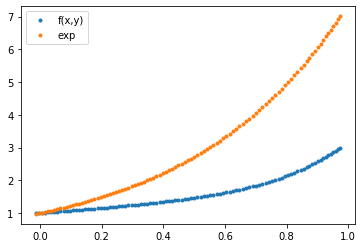

count:  320
step:  0 , Cost:  1.6340718 

step:  25 , Cost:  1.6327145 

step:  50 , Cost:  1.6313608 





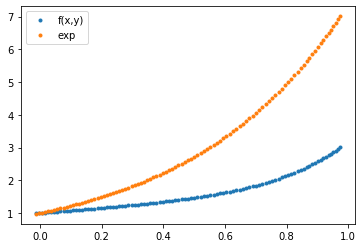

count:  321
step:  0 , Cost:  1.6313068 

step:  25 , Cost:  1.6299564 

step:  50 , Cost:  1.6286091 





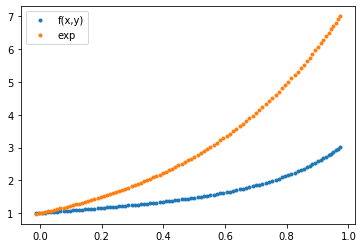

count:  322
step:  0 , Cost:  1.6285554 

step:  25 , Cost:  1.6272113 

step:  50 , Cost:  1.6258701 





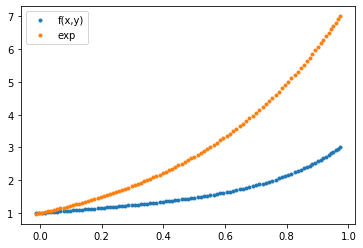

count:  323
step:  0 , Cost:  1.6258163 

step:  25 , Cost:  1.6244785 

step:  50 , Cost:  1.623144 





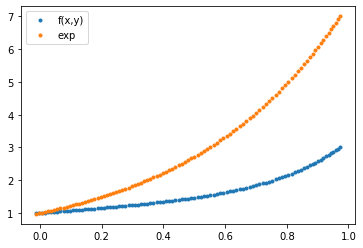

count:  324
step:  0 , Cost:  1.6230905 

step:  25 , Cost:  1.6217595 

step:  50 , Cost:  1.6204315 





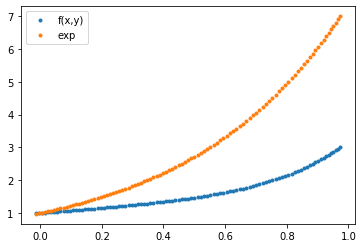

count:  325
step:  0 , Cost:  1.6203784 

step:  25 , Cost:  1.6190538 

step:  50 , Cost:  1.6177324 





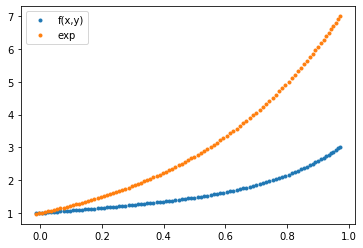

count:  326
step:  0 , Cost:  1.6176795 

step:  25 , Cost:  1.6163607 

step:  50 , Cost:  1.6150452 





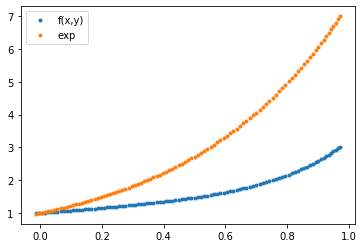

count:  327
step:  0 , Cost:  1.6149929 

step:  25 , Cost:  1.6136802 

step:  50 , Cost:  1.6123706 





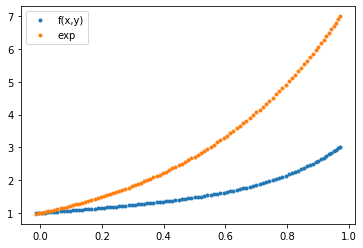

count:  328
step:  0 , Cost:  1.6123182 

step:  25 , Cost:  1.6110119 

step:  50 , Cost:  1.6097085 





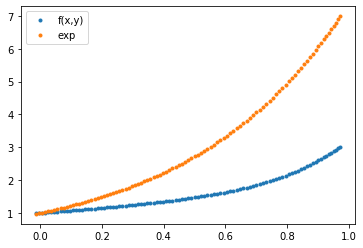

count:  329
step:  0 , Cost:  1.6096566 

step:  25 , Cost:  1.6083565 

step:  50 , Cost:  1.6070585 





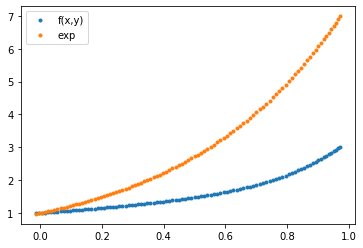

count:  330
step:  0 , Cost:  1.6070067 

step:  25 , Cost:  1.6057122 

step:  50 , Cost:  1.6044203 





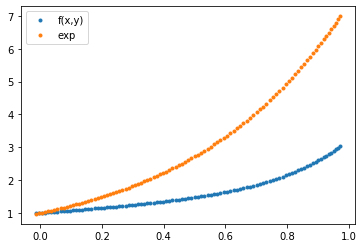

count:  331
step:  0 , Cost:  1.6043689 

step:  25 , Cost:  1.6030803 

step:  50 , Cost:  1.6017947 





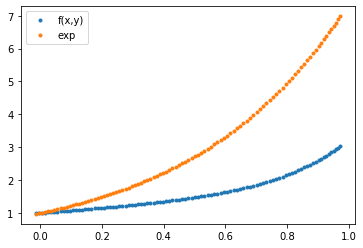

count:  332
step:  0 , Cost:  1.6017435 

step:  25 , Cost:  1.6004606 

step:  50 , Cost:  1.5991809 





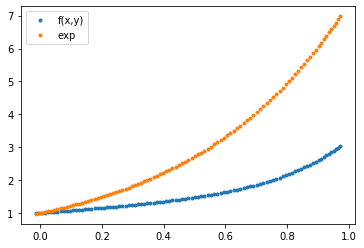

count:  333
step:  0 , Cost:  1.5991298 

step:  25 , Cost:  1.5978522 

step:  50 , Cost:  1.5965768 





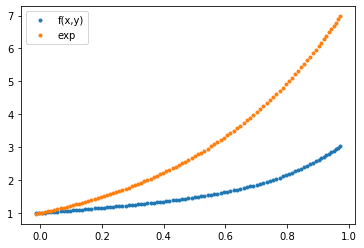

count:  334
step:  0 , Cost:  1.596526 

step:  25 , Cost:  1.595254 

step:  50 , Cost:  1.593985 





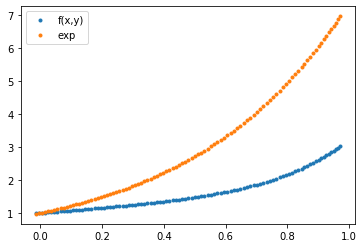

count:  335
step:  0 , Cost:  1.5939342 

step:  25 , Cost:  1.592668 

step:  50 , Cost:  1.5914047 





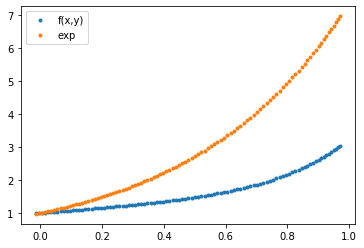

count:  336
step:  0 , Cost:  1.5913544 

step:  25 , Cost:  1.5900939 

step:  50 , Cost:  1.5888361 





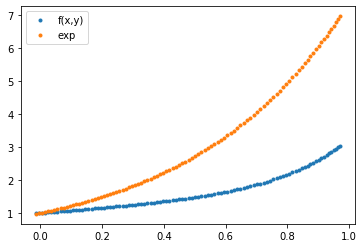

count:  337
step:  0 , Cost:  1.5887859 

step:  25 , Cost:  1.5875303 

step:  50 , Cost:  1.5862776 





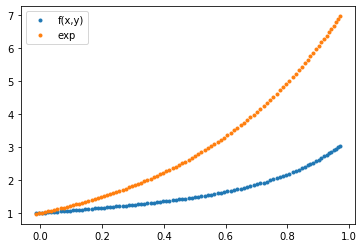

count:  338
step:  0 , Cost:  1.5862278 

step:  25 , Cost:  1.5849777 

step:  50 , Cost:  1.5837308 





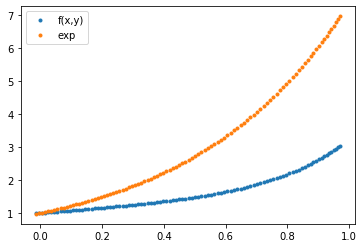

count:  339
step:  0 , Cost:  1.5836809 

step:  25 , Cost:  1.582437 

step:  50 , Cost:  1.5811958 





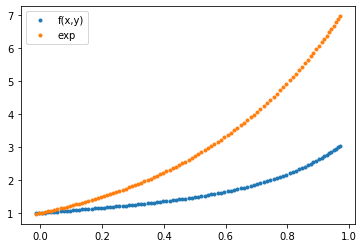

count:  340
step:  0 , Cost:  1.5811462 

step:  25 , Cost:  1.5799075 

step:  50 , Cost:  1.5786712 





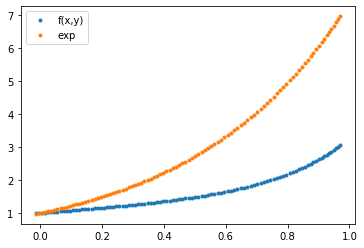

count:  341
step:  0 , Cost:  1.5786219 

step:  25 , Cost:  1.5773876 

step:  50 , Cost:  1.5761559 





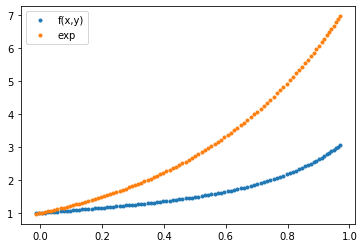

count:  342
step:  0 , Cost:  1.5761067 

step:  25 , Cost:  1.574878 

step:  50 , Cost:  1.5736518 





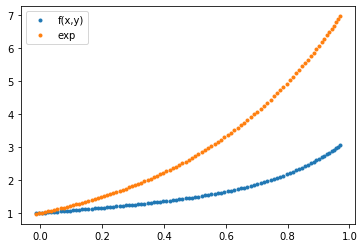

count:  343
step:  0 , Cost:  1.5736026 

step:  25 , Cost:  1.5723789 

step:  50 , Cost:  1.5711579 





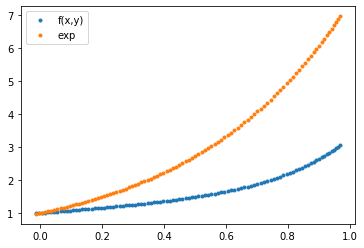

count:  344
step:  0 , Cost:  1.5711094 

step:  25 , Cost:  1.5698907 

step:  50 , Cost:  1.568675 





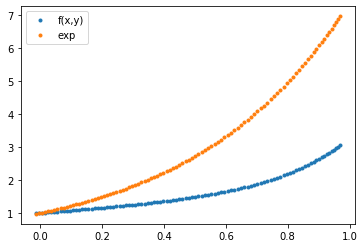

count:  345
step:  0 , Cost:  1.5686264 

step:  25 , Cost:  1.5674127 

step:  50 , Cost:  1.5662014 





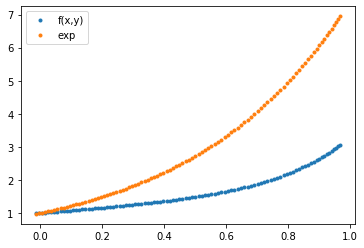

count:  346
step:  0 , Cost:  1.566153 

step:  25 , Cost:  1.5649445 

step:  50 , Cost:  1.5637383 





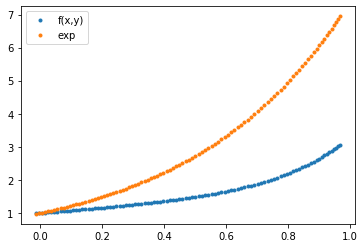

count:  347
step:  0 , Cost:  1.5636902 

step:  25 , Cost:  1.5624864 

step:  50 , Cost:  1.5612853 





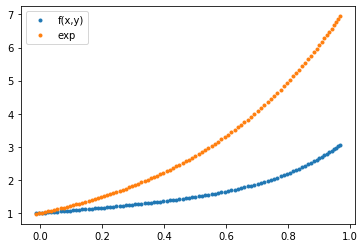

count:  348
step:  0 , Cost:  1.561237 

step:  25 , Cost:  1.5600384 

step:  50 , Cost:  1.5588421 





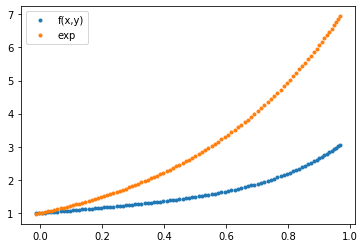

count:  349
step:  0 , Cost:  1.5587939 

step:  25 , Cost:  1.5575995 

step:  50 , Cost:  1.5564067 





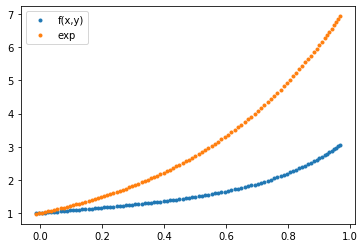

count:  350
step:  0 , Cost:  1.5563593 

step:  25 , Cost:  1.5551689 

step:  50 , Cost:  1.5539811 





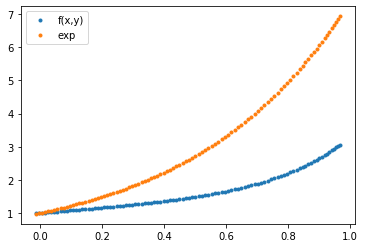

count:  351
step:  0 , Cost:  1.5539336 

step:  25 , Cost:  1.5527484 

step:  50 , Cost:  1.5515655 





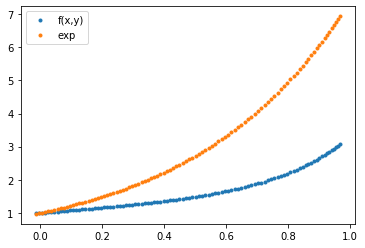

count:  352
step:  0 , Cost:  1.5515184 

step:  25 , Cost:  1.550338 

step:  50 , Cost:  1.54916 





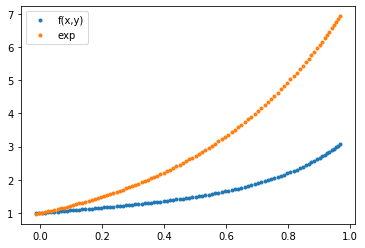

count:  353
step:  0 , Cost:  1.549113 

step:  25 , Cost:  1.5479373 

step:  50 , Cost:  1.5467638 





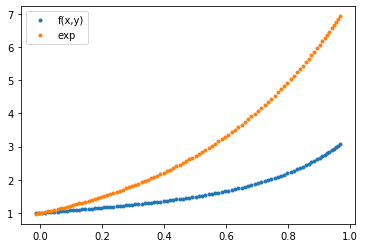

count:  354
step:  0 , Cost:  1.5467168 

step:  25 , Cost:  1.5455447 

step:  50 , Cost:  1.5443753 





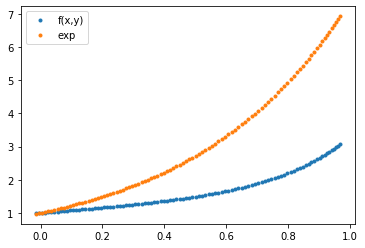

count:  355
step:  0 , Cost:  1.5443286 

step:  25 , Cost:  1.5431612 

step:  50 , Cost:  1.5419959 





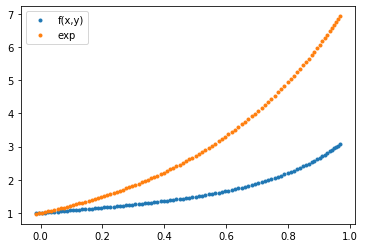

count:  356
step:  0 , Cost:  1.5419492 

step:  25 , Cost:  1.5407864 

step:  50 , Cost:  1.5396261 





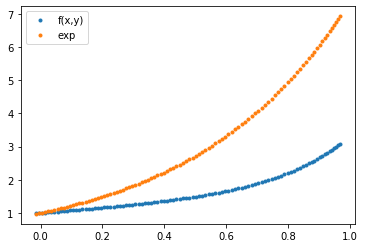

count:  357
step:  0 , Cost:  1.5395796 

step:  25 , Cost:  1.5384212 

step:  50 , Cost:  1.5372651 





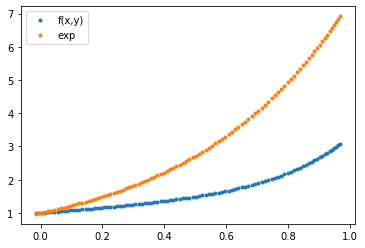

count:  358
step:  0 , Cost:  1.5372189 

step:  25 , Cost:  1.5360658 

step:  50 , Cost:  1.5349137 





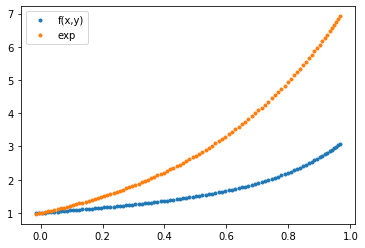

count:  359
step:  0 , Cost:  1.5348678 

step:  25 , Cost:  1.5337174 

step:  50 , Cost:  1.5325693 





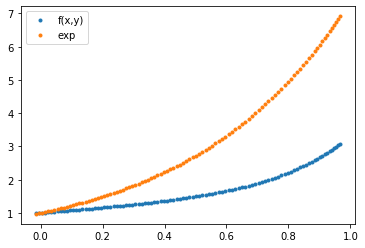

count:  360
step:  0 , Cost:  1.5325234 

step:  25 , Cost:  1.5313773 

step:  50 , Cost:  1.530233 





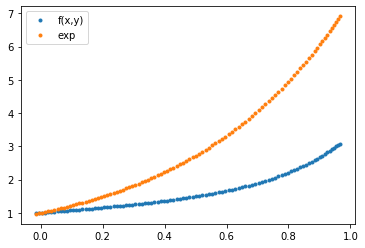

count:  361
step:  0 , Cost:  1.5301871 

step:  25 , Cost:  1.5290455 

step:  50 , Cost:  1.527906 





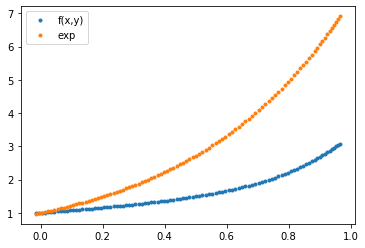

count:  362
step:  0 , Cost:  1.5278603 

step:  25 , Cost:  1.5267224 

step:  50 , Cost:  1.5255862 





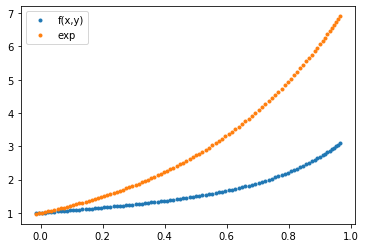

count:  363
step:  0 , Cost:  1.525541 

step:  25 , Cost:  1.5244074 

step:  50 , Cost:  1.5232759 





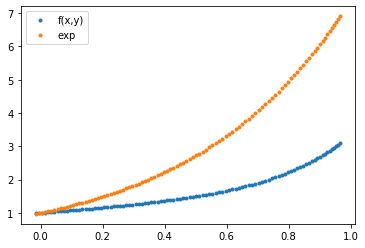

count:  364
step:  0 , Cost:  1.5232306 

step:  25 , Cost:  1.5221007 

step:  50 , Cost:  1.5209723 





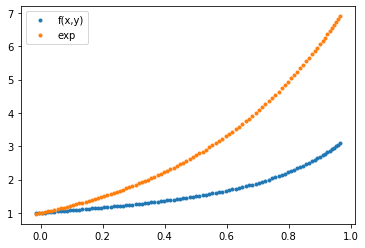

count:  365
step:  0 , Cost:  1.5209273 

step:  25 , Cost:  1.5198015 

step:  50 , Cost:  1.5186774 





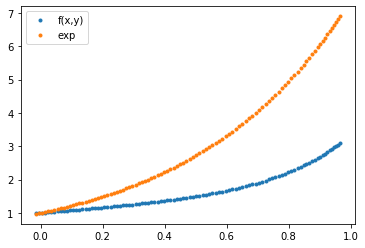

count:  366
step:  0 , Cost:  1.5186322 

step:  25 , Cost:  1.5175096 

step:  50 , Cost:  1.51639 





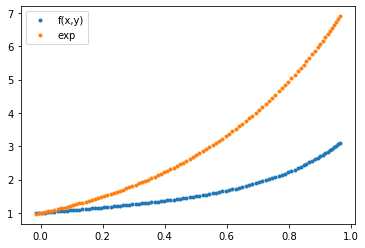

count:  367
step:  0 , Cost:  1.516345 

step:  25 , Cost:  1.5152271 

step:  50 , Cost:  1.5141109 





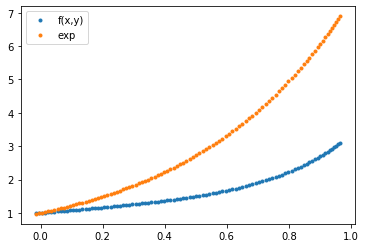

count:  368
step:  0 , Cost:  1.5140662 

step:  25 , Cost:  1.5129523 

step:  50 , Cost:  1.5118405 





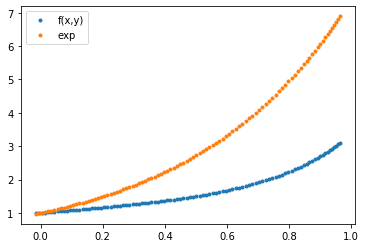

count:  369
step:  0 , Cost:  1.5117961 

step:  25 , Cost:  1.5106862 

step:  50 , Cost:  1.5095776 





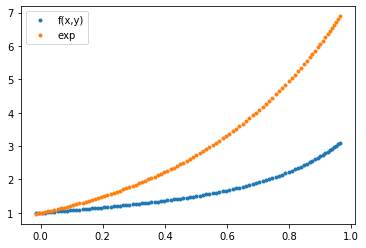

count:  370
step:  0 , Cost:  1.5095333 

step:  25 , Cost:  1.5084262 

step:  50 , Cost:  1.5073216 





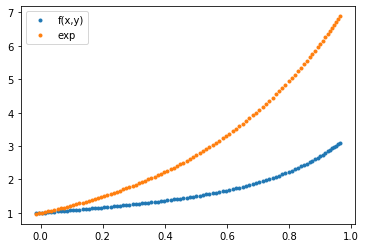

count:  371
step:  0 , Cost:  1.5072773 

step:  25 , Cost:  1.5061737 

step:  50 , Cost:  1.505072 





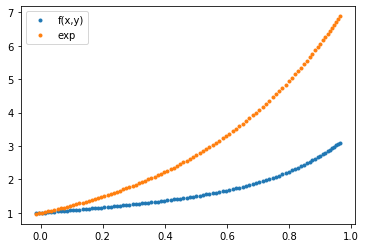

count:  372
step:  0 , Cost:  1.5050281 

step:  25 , Cost:  1.5039291 

step:  50 , Cost:  1.5028317 





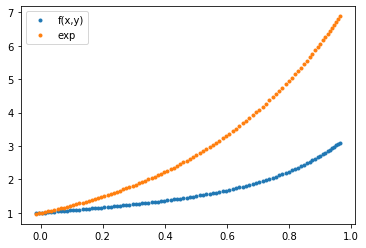

count:  373
step:  0 , Cost:  1.5027881 

step:  25 , Cost:  1.5016927 

step:  50 , Cost:  1.5005989 





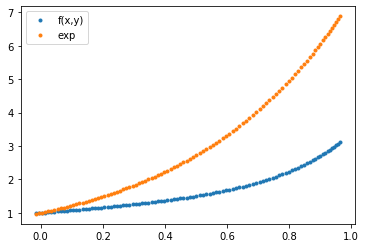

count:  374
step:  0 , Cost:  1.5005552 

step:  25 , Cost:  1.4994636 

step:  50 , Cost:  1.4983739 





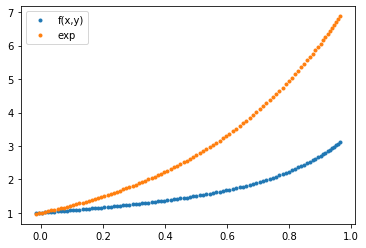

count:  375
step:  0 , Cost:  1.4983302 

step:  25 , Cost:  1.4972421 

step:  50 , Cost:  1.496156 





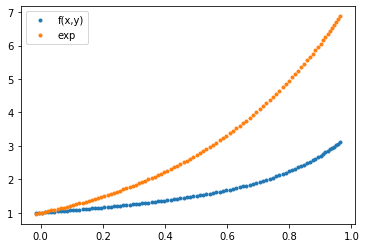

count:  376
step:  0 , Cost:  1.4961127 

step:  25 , Cost:  1.4950284 

step:  50 , Cost:  1.4939451 





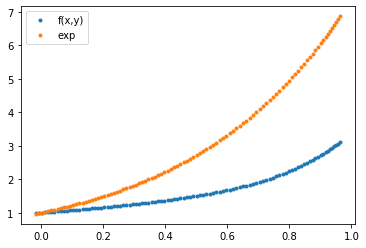

count:  377
step:  0 , Cost:  1.4939018 

step:  25 , Cost:  1.4928198 

step:  50 , Cost:  1.4917401 





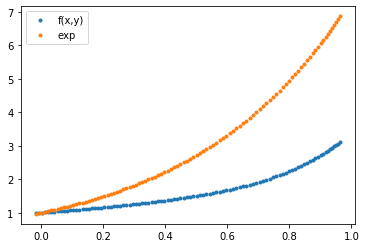

count:  378
step:  0 , Cost:  1.4916971 

step:  25 , Cost:  1.4906193 

step:  50 , Cost:  1.489543 





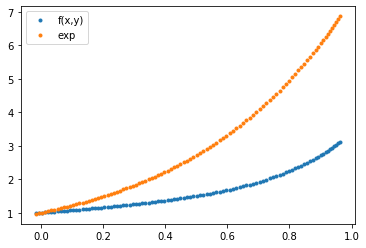

count:  379
step:  0 , Cost:  1.4895002 

step:  25 , Cost:  1.4884256 

step:  50 , Cost:  1.4873532 





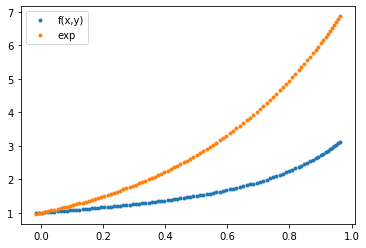

count:  380
step:  0 , Cost:  1.4873103 

step:  25 , Cost:  1.4862398 

step:  50 , Cost:  1.4851701 





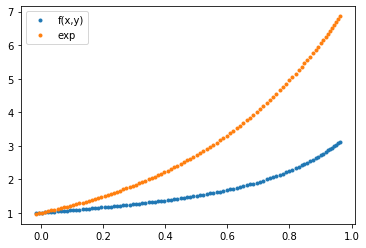

count:  381
step:  0 , Cost:  1.4851274 

step:  25 , Cost:  1.4840593 

step:  50 , Cost:  1.4829931 





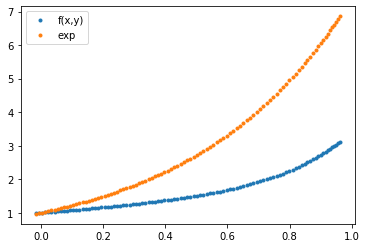

count:  382
step:  0 , Cost:  1.4829507 

step:  25 , Cost:  1.4818861 

step:  50 , Cost:  1.4808232 





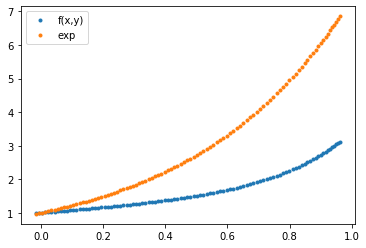

count:  383
step:  0 , Cost:  1.480781 

step:  25 , Cost:  1.4797189 

step:  50 , Cost:  1.478659 





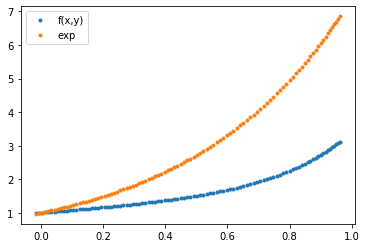

count:  384
step:  0 , Cost:  1.4786168 

step:  25 , Cost:  1.4775586 

step:  50 , Cost:  1.4765018 





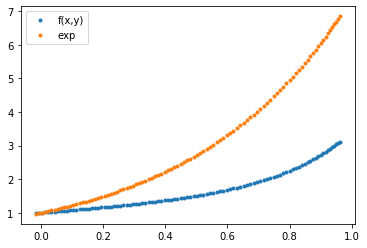

count:  385
step:  0 , Cost:  1.4764594 

step:  25 , Cost:  1.475404 

step:  50 , Cost:  1.4743507 





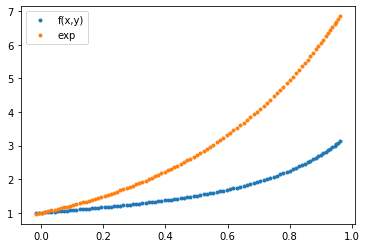

count:  386
step:  0 , Cost:  1.4743087 

step:  25 , Cost:  1.4732568 

step:  50 , Cost:  1.4722066 





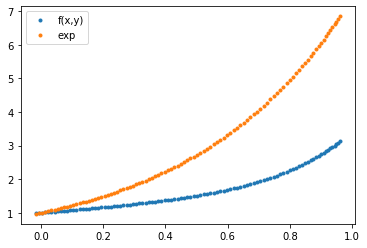

count:  387
step:  0 , Cost:  1.4721648 

step:  25 , Cost:  1.4711156 

step:  50 , Cost:  1.4700688 





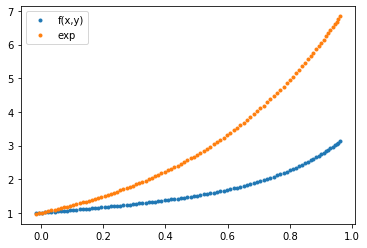

count:  388
step:  0 , Cost:  1.4700272 

step:  25 , Cost:  1.468982 

step:  50 , Cost:  1.4679385 





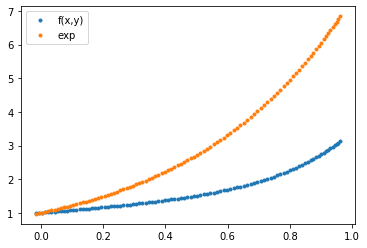

count:  389
step:  0 , Cost:  1.4678967 

step:  25 , Cost:  1.4668545 

step:  50 , Cost:  1.4658145 





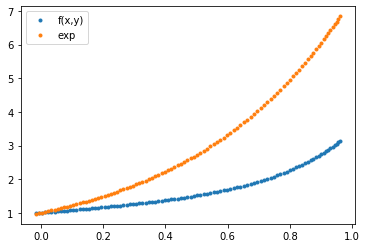

count:  390
step:  0 , Cost:  1.4657729 

step:  25 , Cost:  1.4647348 

step:  50 , Cost:  1.4636977 





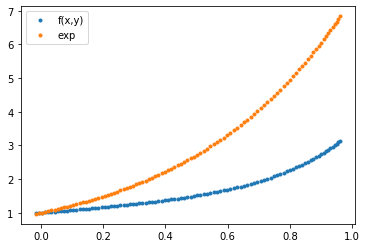

count:  391
step:  0 , Cost:  1.463656 

step:  25 , Cost:  1.4626197 

step:  50 , Cost:  1.4615849 





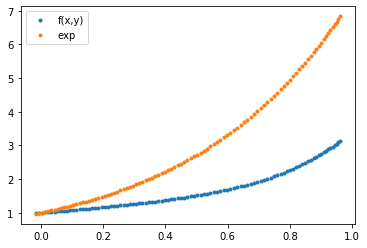

count:  392
step:  0 , Cost:  1.4615436 

step:  25 , Cost:  1.4605106 

step:  50 , Cost:  1.4594789 





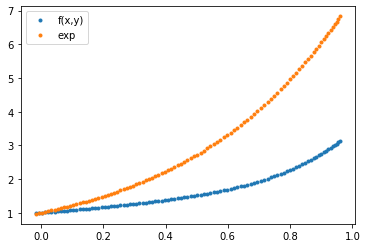

count:  393
step:  0 , Cost:  1.4594378 

step:  25 , Cost:  1.4584074 

step:  50 , Cost:  1.4573787 





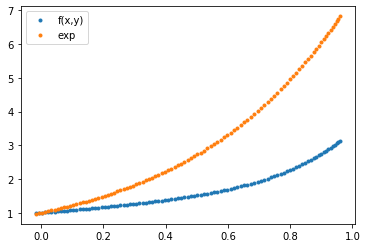

count:  394
step:  0 , Cost:  1.4573379 

step:  25 , Cost:  1.4563107 

step:  50 , Cost:  1.4552852 





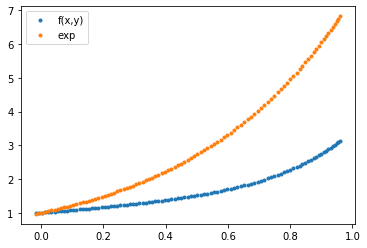

count:  395
step:  0 , Cost:  1.455244 

step:  25 , Cost:  1.4542199 

step:  50 , Cost:  1.4531971 





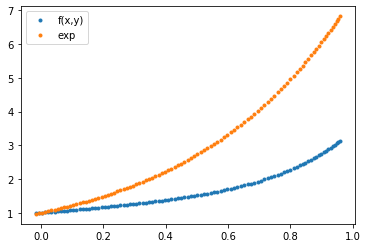

count:  396
step:  0 , Cost:  1.4531561 

step:  25 , Cost:  1.4521358 

step:  50 , Cost:  1.4511163 





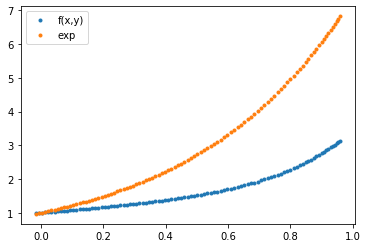

count:  397
step:  0 , Cost:  1.4510758 

step:  25 , Cost:  1.4500576 

step:  50 , Cost:  1.4490409 





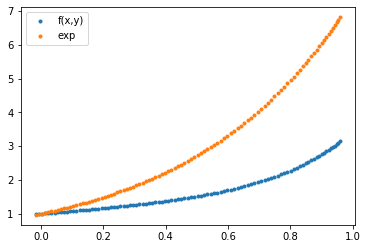

count:  398
step:  0 , Cost:  1.4490001 

step:  25 , Cost:  1.4479855 

step:  50 , Cost:  1.4469719 





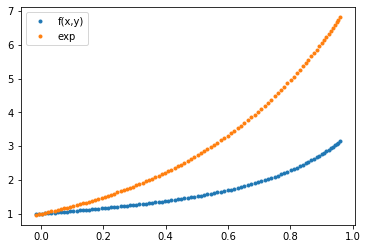

count:  399
step:  0 , Cost:  1.4469316 

step:  25 , Cost:  1.4459194 

step:  50 , Cost:  1.444908 





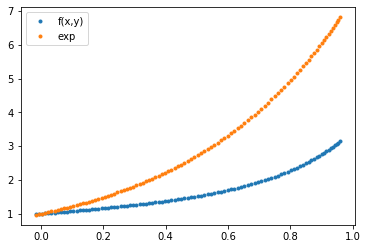

count:  400
step:  0 , Cost:  1.4448676 

step:  25 , Cost:  1.4438571 

step:  50 , Cost:  1.4428489 





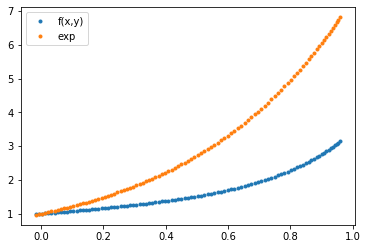

count:  401
step:  0 , Cost:  1.4428085 

step:  25 , Cost:  1.4418012 

step:  50 , Cost:  1.4407953 





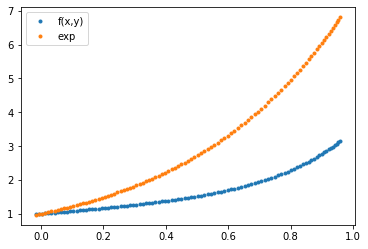

count:  402
step:  0 , Cost:  1.4407551 

step:  25 , Cost:  1.4397502 

step:  50 , Cost:  1.4387474 





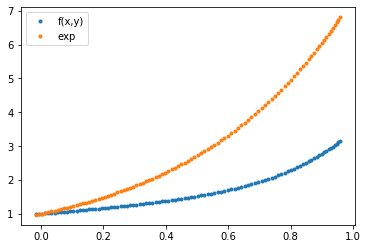

count:  403
step:  0 , Cost:  1.4387072 

step:  25 , Cost:  1.4377061 

step:  50 , Cost:  1.4367056 





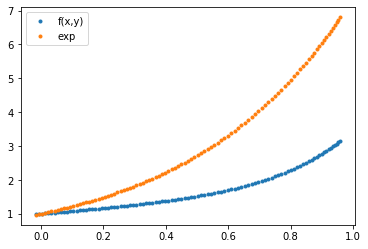

count:  404
step:  0 , Cost:  1.4366657 

step:  25 , Cost:  1.4356668 

step:  50 , Cost:  1.4346691 





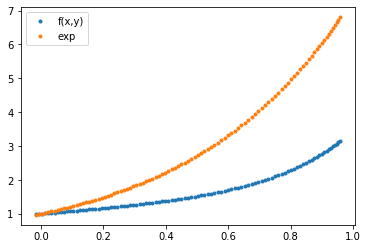

count:  405
step:  0 , Cost:  1.4346293 

step:  25 , Cost:  1.4336339 

step:  50 , Cost:  1.4326397 





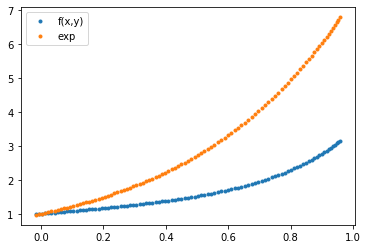

count:  406
step:  0 , Cost:  1.4325999 

step:  25 , Cost:  1.431607 

step:  50 , Cost:  1.4306151 





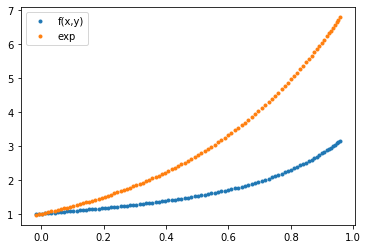

count:  407
step:  0 , Cost:  1.4305756 

step:  25 , Cost:  1.4295856 

step:  50 , Cost:  1.4285972 





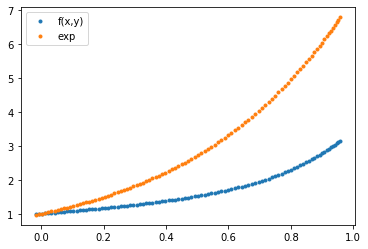

count:  408
step:  0 , Cost:  1.4285576 

step:  25 , Cost:  1.4275705 

step:  50 , Cost:  1.426584 





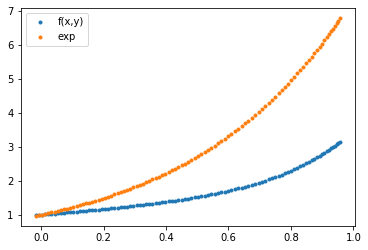

count:  409
step:  0 , Cost:  1.4265448 

step:  25 , Cost:  1.42556 

step:  50 , Cost:  1.4245772 





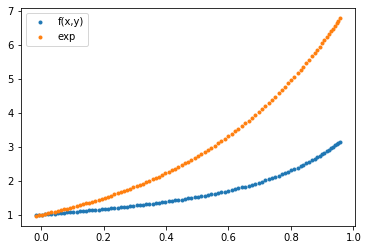

count:  410
step:  0 , Cost:  1.424538 

step:  25 , Cost:  1.4235557 

step:  50 , Cost:  1.422574 





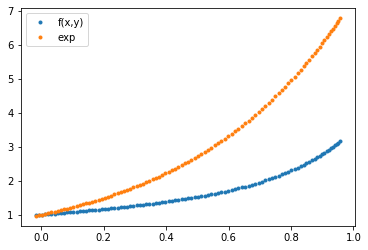

count:  411
step:  0 , Cost:  1.4225348 

step:  25 , Cost:  1.4215542 

step:  50 , Cost:  1.4205756 





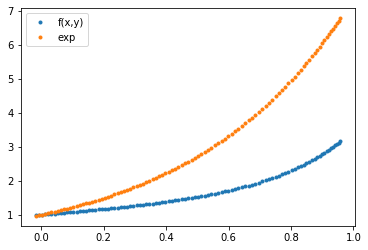

count:  412
step:  0 , Cost:  1.4205364 

step:  25 , Cost:  1.419559 

step:  50 , Cost:  1.4185829 





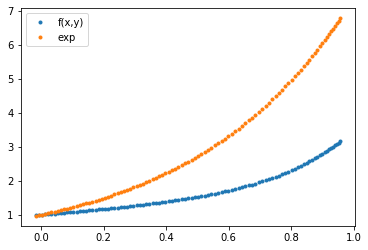

count:  413
step:  0 , Cost:  1.418544 

step:  25 , Cost:  1.4175692 

step:  50 , Cost:  1.416595 





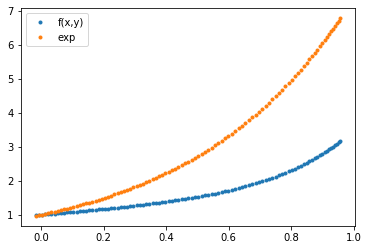

count:  414
step:  0 , Cost:  1.4165561 

step:  25 , Cost:  1.4155838 

step:  50 , Cost:  1.4146128 





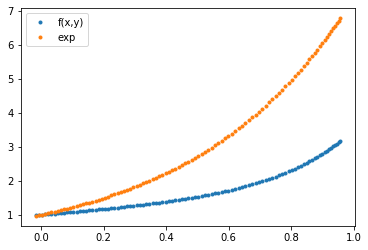

count:  415
step:  0 , Cost:  1.414574 

step:  25 , Cost:  1.4136043 

step:  50 , Cost:  1.4126353 





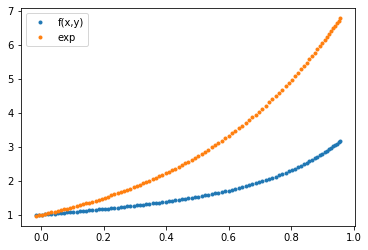

count:  416
step:  0 , Cost:  1.4125966 

step:  25 , Cost:  1.4116291 

step:  50 , Cost:  1.4106632 





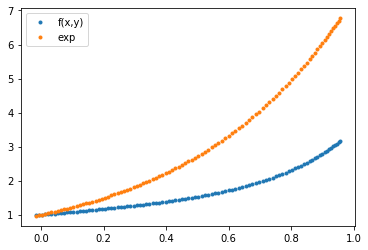

count:  417
step:  0 , Cost:  1.4106249 

step:  25 , Cost:  1.4096607 

step:  50 , Cost:  1.4086975 





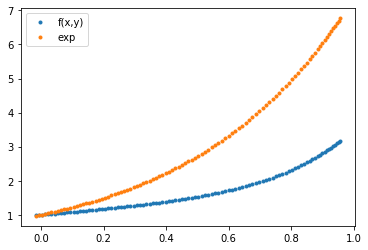

count:  418
step:  0 , Cost:  1.4086587 

step:  25 , Cost:  1.4076967 

step:  50 , Cost:  1.4067355 





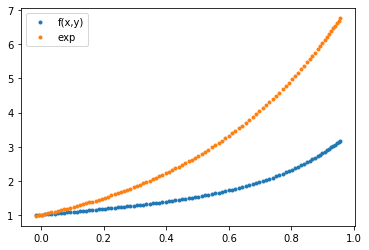

count:  419
step:  0 , Cost:  1.4066969 

step:  25 , Cost:  1.4057381 

step:  50 , Cost:  1.4047801 





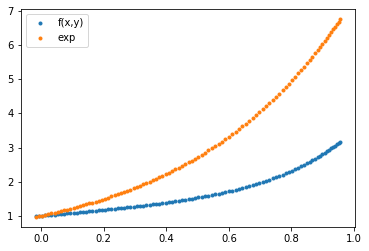

count:  420
step:  0 , Cost:  1.4047416 

step:  25 , Cost:  1.4037851 

step:  50 , Cost:  1.4028289 





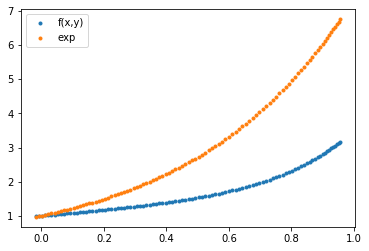

count:  421
step:  0 , Cost:  1.4027907 

step:  25 , Cost:  1.4018363 

step:  50 , Cost:  1.4008833 





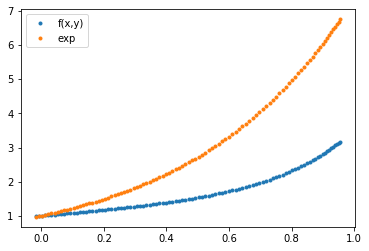

count:  422
step:  0 , Cost:  1.4008453 

step:  25 , Cost:  1.3998935 

step:  50 , Cost:  1.3989422 





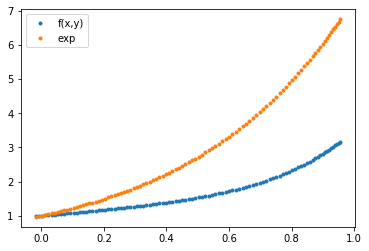

count:  423
step:  0 , Cost:  1.3989043 

step:  25 , Cost:  1.3979542 

step:  50 , Cost:  1.3970046 





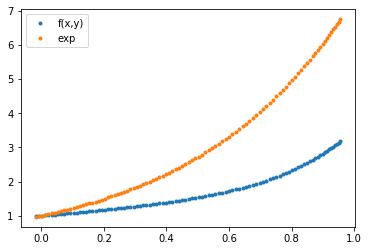

count:  424
step:  0 , Cost:  1.3969667 

step:  25 , Cost:  1.3960189 

step:  50 , Cost:  1.395072 





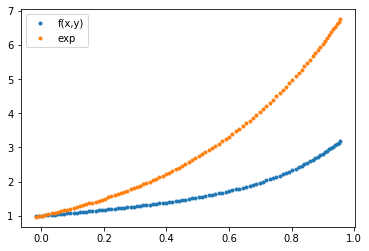

count:  425
step:  0 , Cost:  1.3950342 

step:  25 , Cost:  1.3940884 

step:  50 , Cost:  1.3931434 





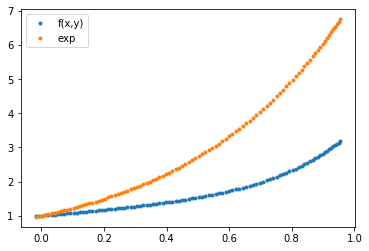

count:  426
step:  0 , Cost:  1.393106 

step:  25 , Cost:  1.3921624 

step:  50 , Cost:  1.3912205 





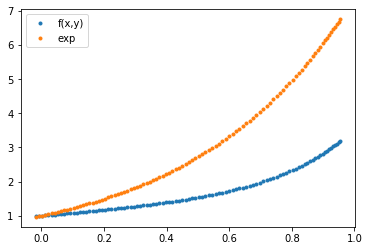

count:  427
step:  0 , Cost:  1.3911827 

step:  25 , Cost:  1.3902417 

step:  50 , Cost:  1.3893017 





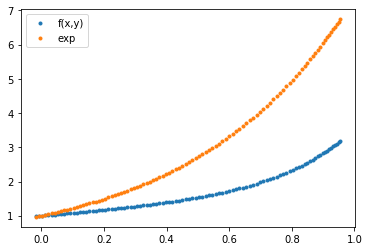

count:  428
step:  0 , Cost:  1.3892639 

step:  25 , Cost:  1.3883251 

step:  50 , Cost:  1.3873869 





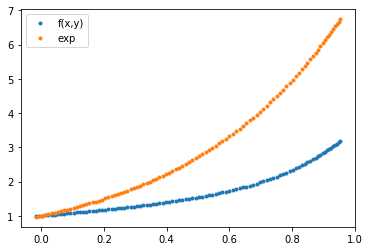

count:  429
step:  0 , Cost:  1.3873496 

step:  25 , Cost:  1.3864137 

step:  50 , Cost:  1.3854783 





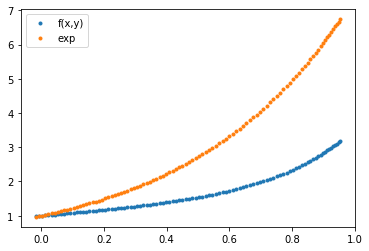

count:  430
step:  0 , Cost:  1.3854408 

step:  25 , Cost:  1.3845067 

step:  50 , Cost:  1.383574 





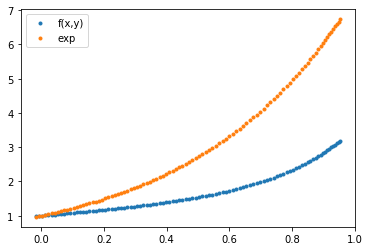

count:  431
step:  0 , Cost:  1.3835367 

step:  25 , Cost:  1.3826048 

step:  50 , Cost:  1.3816746 





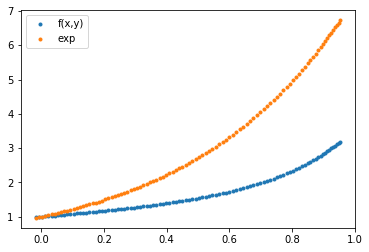

count:  432
step:  0 , Cost:  1.3816375 

step:  25 , Cost:  1.3807083 

step:  50 , Cost:  1.3797802 





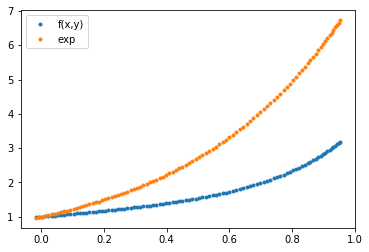

count:  433
step:  0 , Cost:  1.3797432 

step:  25 , Cost:  1.3788159 

step:  50 , Cost:  1.3778898 





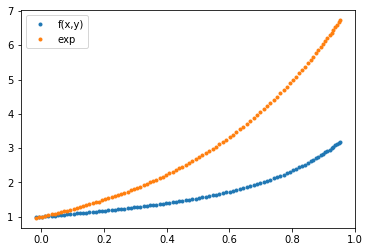

count:  434
step:  0 , Cost:  1.3778528 

step:  25 , Cost:  1.376928 

step:  50 , Cost:  1.3760043 





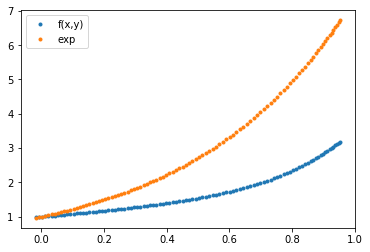

count:  435
step:  0 , Cost:  1.3759674 

step:  25 , Cost:  1.3750452 

step:  50 , Cost:  1.3741233 





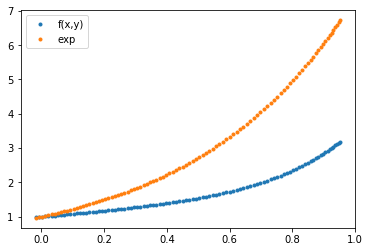

count:  436
step:  0 , Cost:  1.3740865 

step:  25 , Cost:  1.3731661 

step:  50 , Cost:  1.3722465 





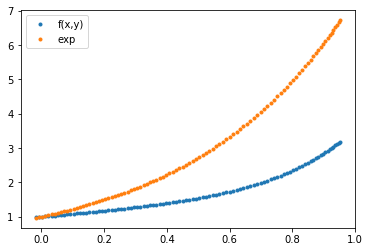

count:  437
step:  0 , Cost:  1.3722098 

step:  25 , Cost:  1.3712918 

step:  50 , Cost:  1.370375 





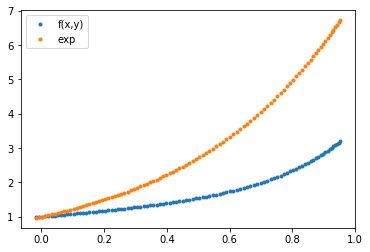

count:  438
step:  0 , Cost:  1.3703383 

step:  25 , Cost:  1.3694224 

step:  50 , Cost:  1.3685074 





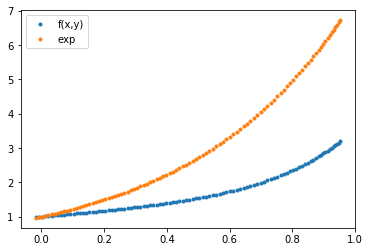

count:  439
step:  0 , Cost:  1.3684708 

step:  25 , Cost:  1.3675566 

step:  50 , Cost:  1.366644 





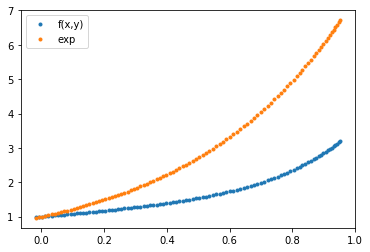

count:  440
step:  0 , Cost:  1.3666075 

step:  25 , Cost:  1.3656961 

step:  50 , Cost:  1.3647853 





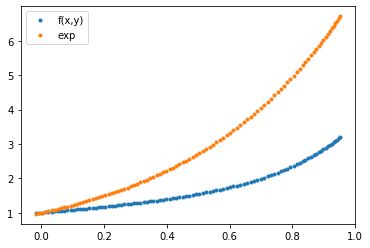

count:  441
step:  0 , Cost:  1.3647488 

step:  25 , Cost:  1.3638394 

step:  50 , Cost:  1.3629304 





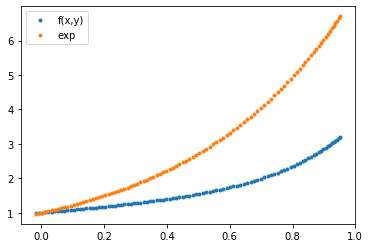

count:  442
step:  0 , Cost:  1.3628942 

step:  25 , Cost:  1.3619858 

step:  50 , Cost:  1.3610786 





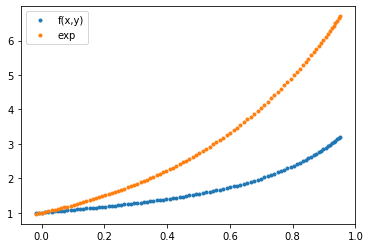

count:  443
step:  0 , Cost:  1.3610425 

step:  25 , Cost:  1.3601362 

step:  50 , Cost:  1.3592311 





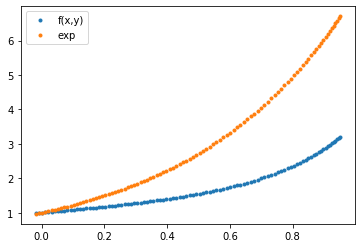

count:  444
step:  0 , Cost:  1.3591946 

step:  25 , Cost:  1.3582906 

step:  50 , Cost:  1.3573872 





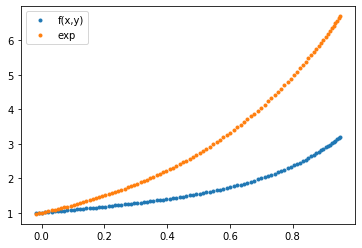

count:  445
step:  0 , Cost:  1.3573512 

step:  25 , Cost:  1.3564495 

step:  50 , Cost:  1.3555485 





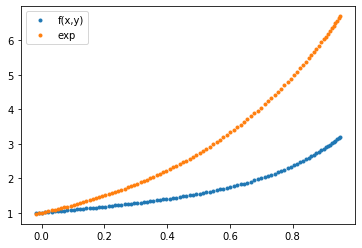

count:  446
step:  0 , Cost:  1.3555127 

step:  25 , Cost:  1.3546131 

step:  50 , Cost:  1.3537141 





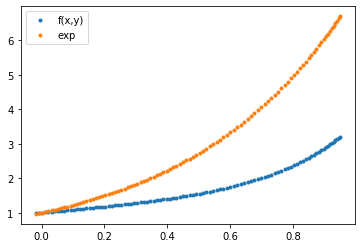

count:  447
step:  0 , Cost:  1.3536781 

step:  25 , Cost:  1.3527801 

step:  50 , Cost:  1.351883 





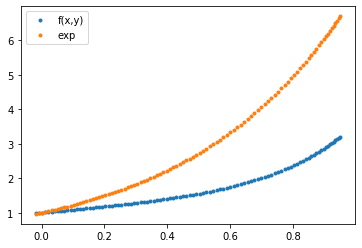

count:  448
step:  0 , Cost:  1.3518474 

step:  25 , Cost:  1.3509518 

step:  50 , Cost:  1.3500572 





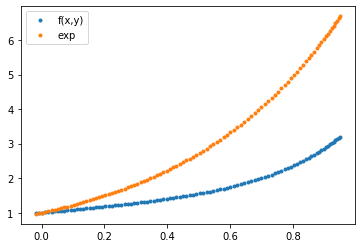

count:  449
step:  0 , Cost:  1.3500214 

step:  25 , Cost:  1.3491278 

step:  50 , Cost:  1.3482349 





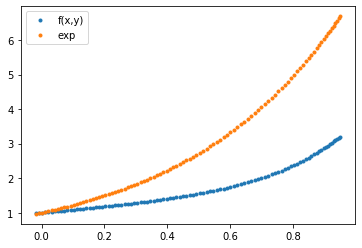

count:  450
step:  0 , Cost:  1.348199 

step:  25 , Cost:  1.347307 

step:  50 , Cost:  1.346416 





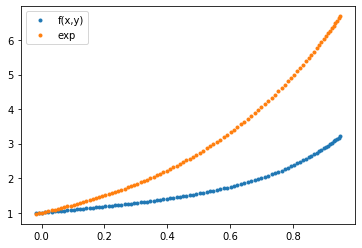

count:  451
step:  0 , Cost:  1.3463804 

step:  25 , Cost:  1.3454907 

step:  50 , Cost:  1.3446023 





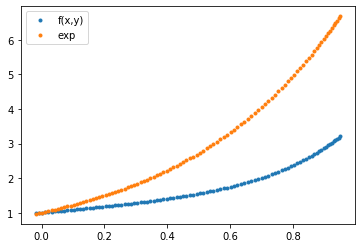

count:  452
step:  0 , Cost:  1.3445665 

step:  25 , Cost:  1.3436787 

step:  50 , Cost:  1.3427919 





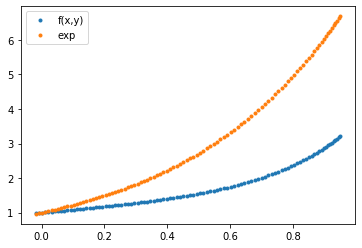

count:  453
step:  0 , Cost:  1.3427564 

step:  25 , Cost:  1.3418703 

step:  50 , Cost:  1.3409854 





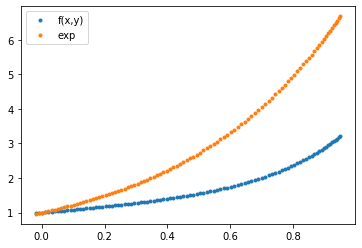

count:  454
step:  0 , Cost:  1.34095 

step:  25 , Cost:  1.3400664 

step:  50 , Cost:  1.3391837 





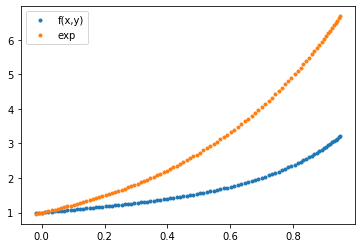

count:  455
step:  0 , Cost:  1.3391484 

step:  25 , Cost:  1.3382667 

step:  50 , Cost:  1.3373859 





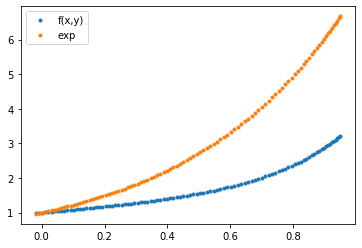

count:  456
step:  0 , Cost:  1.3373506 

step:  25 , Cost:  1.3364705 

step:  50 , Cost:  1.3355919 





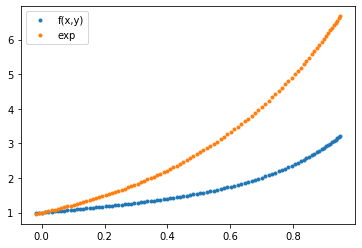

count:  457
step:  0 , Cost:  1.3355566 

step:  25 , Cost:  1.3346791 

step:  50 , Cost:  1.3338023 





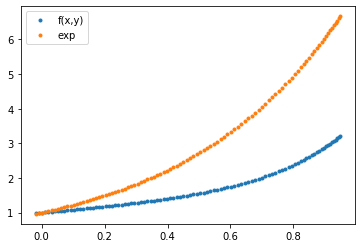

count:  458
step:  0 , Cost:  1.333767 

step:  25 , Cost:  1.3328912 

step:  50 , Cost:  1.332016 





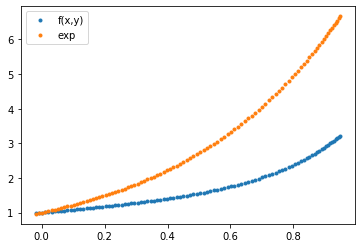

count:  459
step:  0 , Cost:  1.3319812 

step:  25 , Cost:  1.3311067 

step:  50 , Cost:  1.3302339 





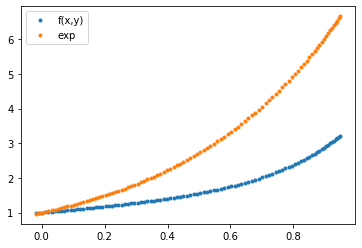

count:  460
step:  0 , Cost:  1.3301988 

step:  25 , Cost:  1.329327 

step:  50 , Cost:  1.3284557 





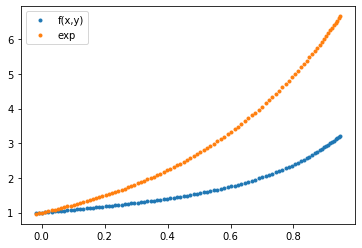

count:  461
step:  0 , Cost:  1.3284208 

step:  25 , Cost:  1.3275506 

step:  50 , Cost:  1.326681 





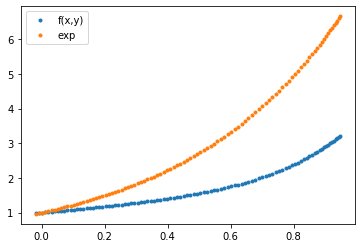

count:  462
step:  0 , Cost:  1.3266463 

step:  25 , Cost:  1.3257778 

step:  50 , Cost:  1.3249099 





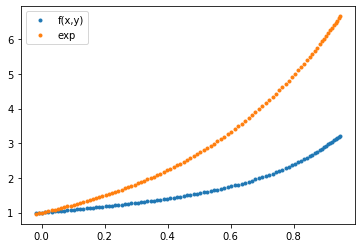

count:  463
step:  0 , Cost:  1.3248755 

step:  25 , Cost:  1.3240088 

step:  50 , Cost:  1.323143 





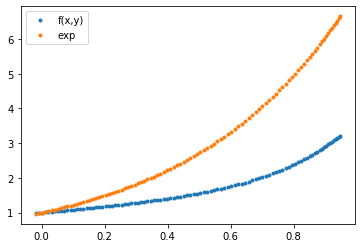

count:  464
step:  0 , Cost:  1.3231087 

step:  25 , Cost:  1.3222438 

step:  50 , Cost:  1.3213799 





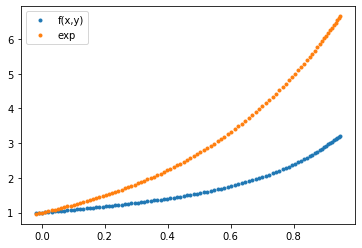

count:  465
step:  0 , Cost:  1.3213453 

step:  25 , Cost:  1.3204824 

step:  50 , Cost:  1.3196204 





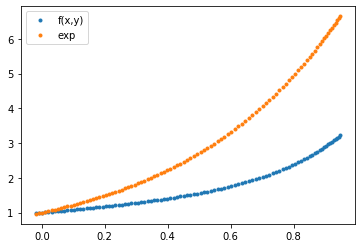

count:  466
step:  0 , Cost:  1.319586 

step:  25 , Cost:  1.3187251 

step:  50 , Cost:  1.3178655 





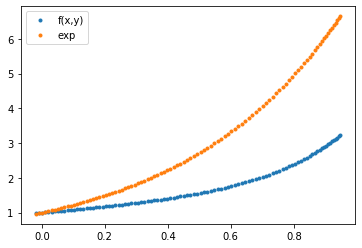

count:  467
step:  0 , Cost:  1.3178308 

step:  25 , Cost:  1.316972 

step:  50 , Cost:  1.3161135 





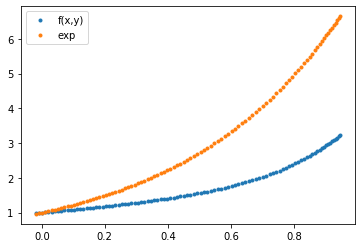

count:  468
step:  0 , Cost:  1.3160791 

step:  25 , Cost:  1.3152219 

step:  50 , Cost:  1.3143653 





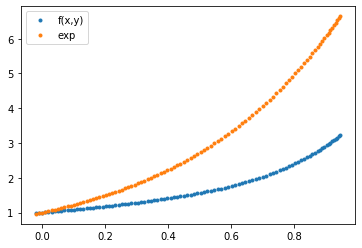

count:  469
step:  0 , Cost:  1.3143312 

step:  25 , Cost:  1.3134758 

step:  50 , Cost:  1.3126215 





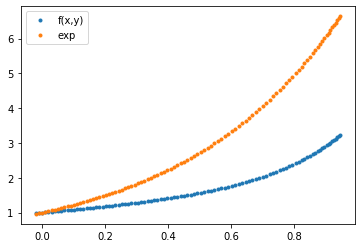

count:  470
step:  0 , Cost:  1.3125871 

step:  25 , Cost:  1.3117337 

step:  50 , Cost:  1.3108804 





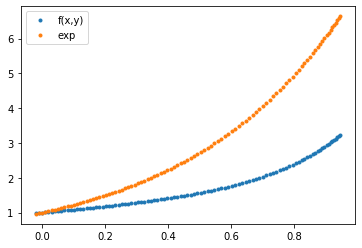

count:  471
step:  0 , Cost:  1.3108464 

step:  25 , Cost:  1.3099942 

step:  50 , Cost:  1.3091426 





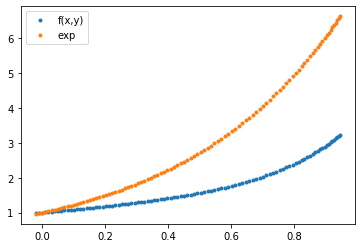

count:  472
step:  0 , Cost:  1.3091087 

step:  25 , Cost:  1.3082587 

step:  50 , Cost:  1.3074098 





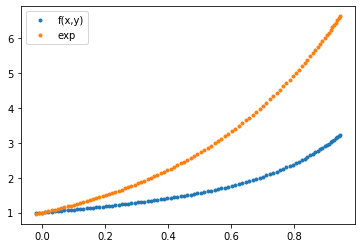

count:  473
step:  0 , Cost:  1.3073758 

step:  25 , Cost:  1.3065277 

step:  50 , Cost:  1.3056799 





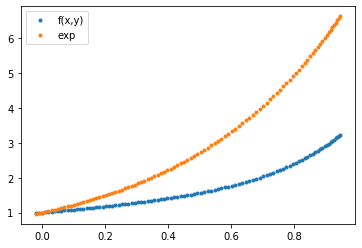

count:  474
step:  0 , Cost:  1.3056461 

step:  25 , Cost:  1.3047993 

step:  50 , Cost:  1.3039534 





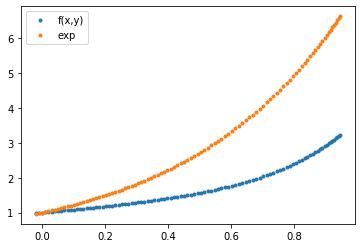

count:  475
step:  0 , Cost:  1.3039193 

step:  25 , Cost:  1.3030745 

step:  50 , Cost:  1.3022307 





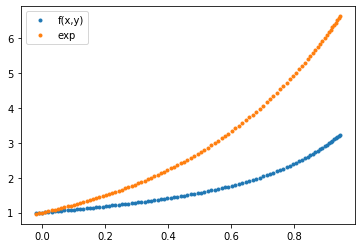

count:  476
step:  0 , Cost:  1.302197 

step:  25 , Cost:  1.3013539 

step:  50 , Cost:  1.3005116 





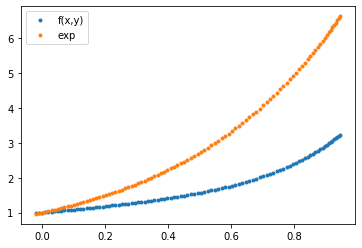

count:  477
step:  0 , Cost:  1.3004779 

step:  25 , Cost:  1.2996362 

step:  50 , Cost:  1.2987956 





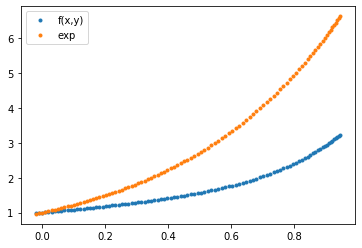

count:  478
step:  0 , Cost:  1.2987621 

step:  25 , Cost:  1.297922 

step:  50 , Cost:  1.2970837 





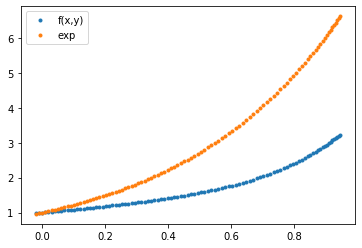

count:  479
step:  0 , Cost:  1.29705 

step:  25 , Cost:  1.2962127 

step:  50 , Cost:  1.2953757 





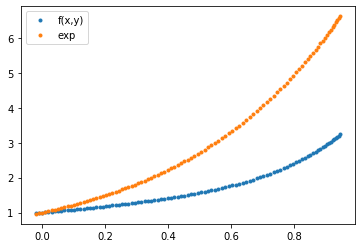

count:  480
step:  0 , Cost:  1.2953422 

step:  25 , Cost:  1.294506 

step:  50 , Cost:  1.2936703 





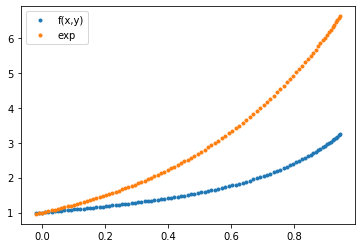

count:  481
step:  0 , Cost:  1.293637 

step:  25 , Cost:  1.2928021 

step:  50 , Cost:  1.2919681 





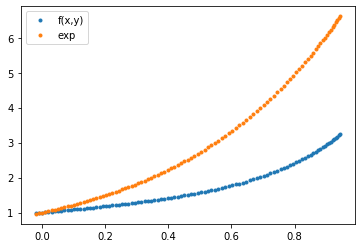

count:  482
step:  0 , Cost:  1.2919346 

step:  25 , Cost:  1.2911022 

step:  50 , Cost:  1.2902701 





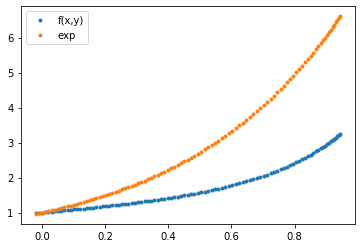

count:  483
step:  0 , Cost:  1.2902368 

step:  25 , Cost:  1.2894055 

step:  50 , Cost:  1.2885749 





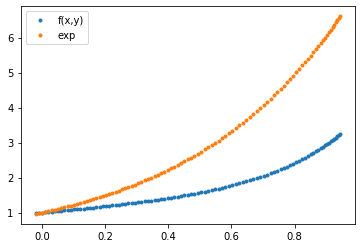

count:  484
step:  0 , Cost:  1.2885419 

step:  25 , Cost:  1.287712 

step:  50 , Cost:  1.2868825 





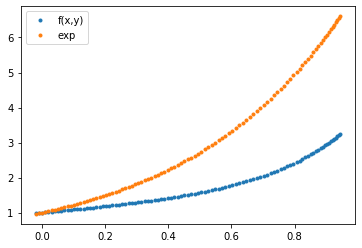

count:  485
step:  0 , Cost:  1.2868494 

step:  25 , Cost:  1.2860211 

step:  50 , Cost:  1.285194 





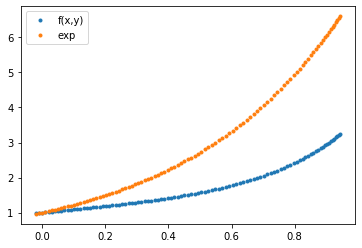

count:  486
step:  0 , Cost:  1.285161 

step:  25 , Cost:  1.2843345 

step:  50 , Cost:  1.2835088 





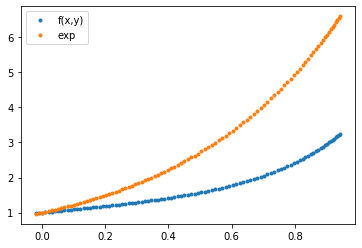

count:  487
step:  0 , Cost:  1.283476 

step:  25 , Cost:  1.2826514 

step:  50 , Cost:  1.2818276 





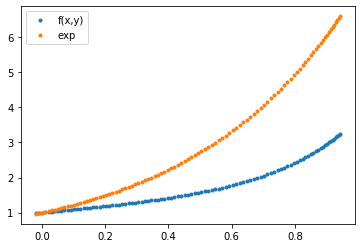

count:  488
step:  0 , Cost:  1.2817945 

step:  25 , Cost:  1.2809712 

step:  50 , Cost:  1.2801497 





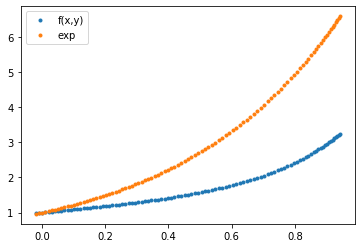

count:  489
step:  0 , Cost:  1.2801169 

step:  25 , Cost:  1.2792962 

step:  50 , Cost:  1.2784759 





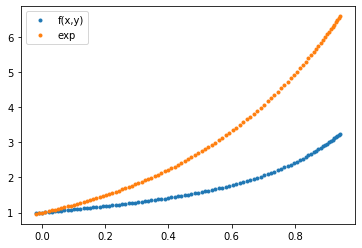

count:  490
step:  0 , Cost:  1.2784431 

step:  25 , Cost:  1.2776235 

step:  50 , Cost:  1.2768047 





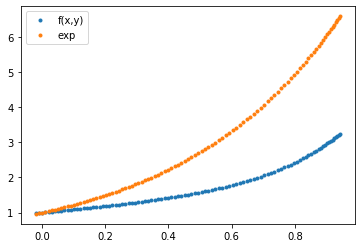

count:  491
step:  0 , Cost:  1.2767719 

step:  25 , Cost:  1.2759539 

step:  50 , Cost:  1.2751365 





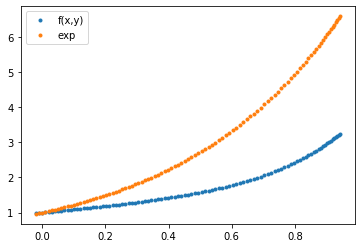

count:  492
step:  0 , Cost:  1.2751038 

step:  25 , Cost:  1.274288 

step:  50 , Cost:  1.273473 





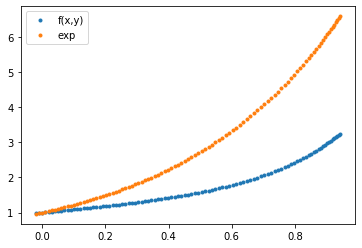

count:  493
step:  0 , Cost:  1.2734405 

step:  25 , Cost:  1.2726263 

step:  50 , Cost:  1.2718126 





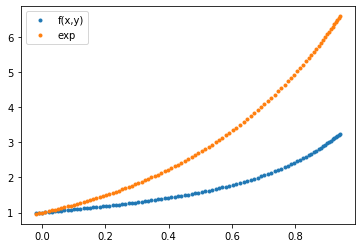

count:  494
step:  0 , Cost:  1.2717801 

step:  25 , Cost:  1.2709674 

step:  50 , Cost:  1.2701553 





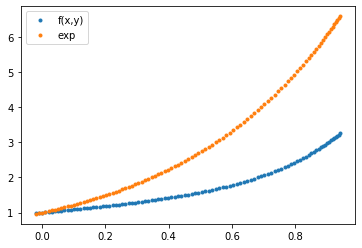

count:  495
step:  0 , Cost:  1.2701229 

step:  25 , Cost:  1.2693114 

step:  50 , Cost:  1.2685015 





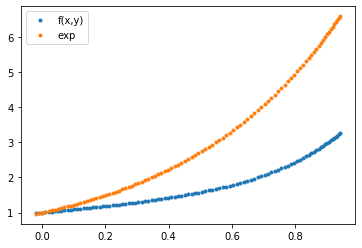

count:  496
step:  0 , Cost:  1.2684692 

step:  25 , Cost:  1.2676598 

step:  50 , Cost:  1.2668513 





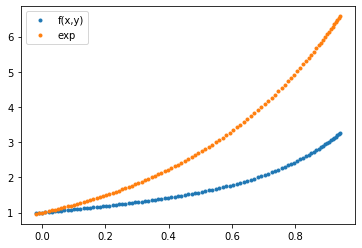

count:  497
step:  0 , Cost:  1.2668189 

step:  25 , Cost:  1.2660109 

step:  50 , Cost:  1.2652036 





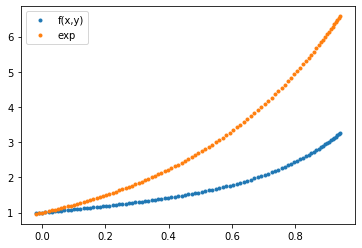

count:  498
step:  0 , Cost:  1.2651713 

step:  25 , Cost:  1.2643644 

step:  50 , Cost:  1.2635583 





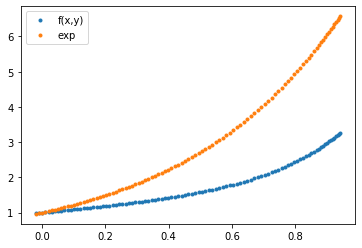

count:  499
step:  0 , Cost:  1.2635258 

step:  25 , Cost:  1.2627211 

step:  50 , Cost:  1.2619169 





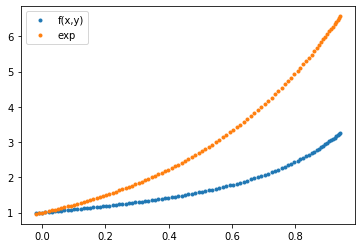

count:  500
step:  0 , Cost:  1.2618848 

step:  25 , Cost:  1.2610811 

step:  50 , Cost:  1.2602782 





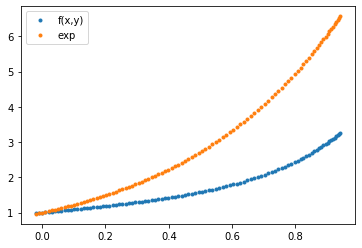

count:  501
step:  0 , Cost:  1.2602462 

step:  25 , Cost:  1.2594438 

step:  50 , Cost:  1.258642 





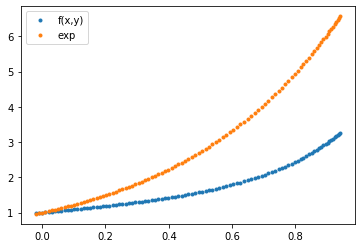

count:  502
step:  0 , Cost:  1.2586101 

step:  25 , Cost:  1.2578088 

step:  50 , Cost:  1.2570088 





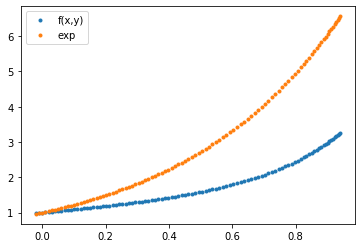

count:  503
step:  0 , Cost:  1.2569767 

step:  25 , Cost:  1.256178 

step:  50 , Cost:  1.2553796 





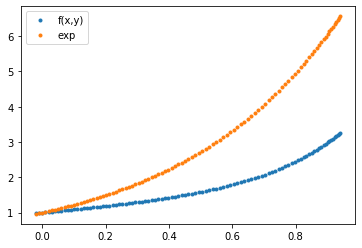

count:  504
step:  0 , Cost:  1.2553476 

step:  25 , Cost:  1.25455 

step:  50 , Cost:  1.253753 





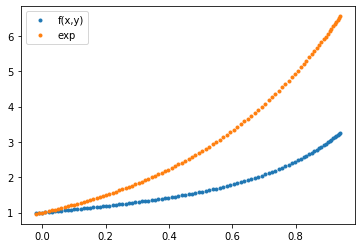

count:  505
step:  0 , Cost:  1.2537212 

step:  25 , Cost:  1.2529252 

step:  50 , Cost:  1.2521297 





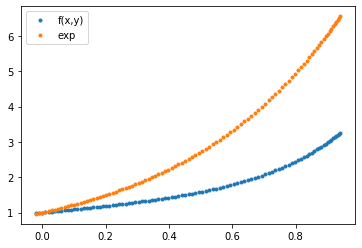

count:  506
step:  0 , Cost:  1.2520977 

step:  25 , Cost:  1.2513034 

step:  50 , Cost:  1.2505105 





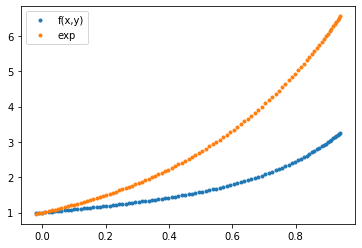

count:  507
step:  0 , Cost:  1.2504789 

step:  25 , Cost:  1.2496865 

step:  50 , Cost:  1.2488946 





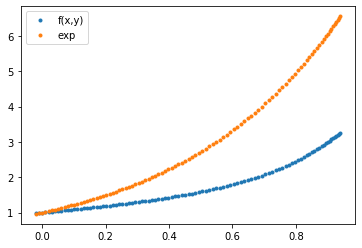

count:  508
step:  0 , Cost:  1.248863 

step:  25 , Cost:  1.2480718 

step:  50 , Cost:  1.2472813 





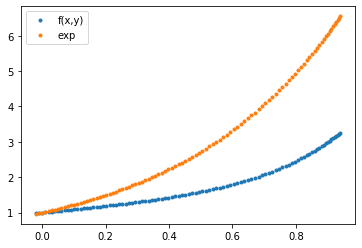

count:  509
step:  0 , Cost:  1.2472498 

step:  25 , Cost:  1.2464598 

step:  50 , Cost:  1.2456706 





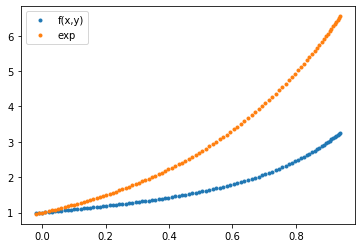

count:  510
step:  0 , Cost:  1.245639 

step:  25 , Cost:  1.2448511 

step:  50 , Cost:  1.2440639 





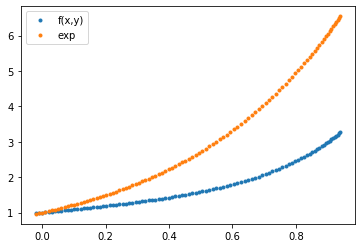

count:  511
step:  0 , Cost:  1.2440324 

step:  25 , Cost:  1.2432456 

step:  50 , Cost:  1.2424597 





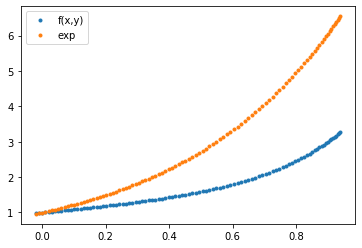

count:  512
step:  0 , Cost:  1.2424283 

step:  25 , Cost:  1.241643 

step:  50 , Cost:  1.2408582 





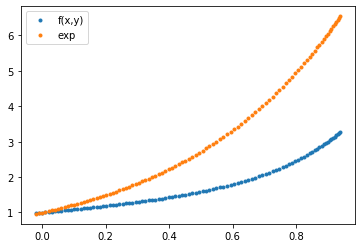

count:  513
step:  0 , Cost:  1.2408268 

step:  25 , Cost:  1.2400427 

step:  50 , Cost:  1.2392592 





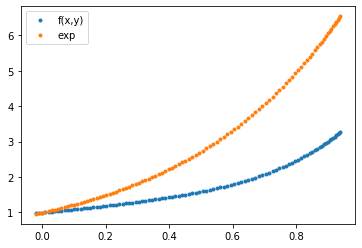

count:  514
step:  0 , Cost:  1.239228 

step:  25 , Cost:  1.2384459 

step:  50 , Cost:  1.2376645 





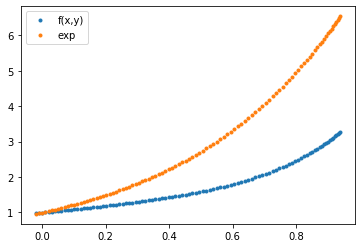

count:  515
step:  0 , Cost:  1.2376332 

step:  25 , Cost:  1.2368523 

step:  50 , Cost:  1.2360721 





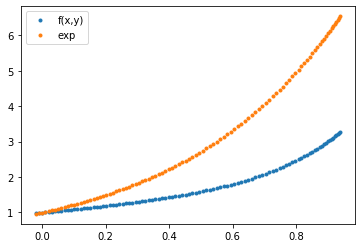

count:  516
step:  0 , Cost:  1.2360408 

step:  25 , Cost:  1.2352612 

step:  50 , Cost:  1.234482 





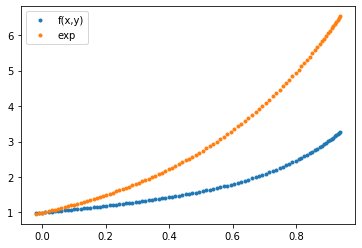

count:  517
step:  0 , Cost:  1.2344509 

step:  25 , Cost:  1.2336726 

step:  50 , Cost:  1.2328954 





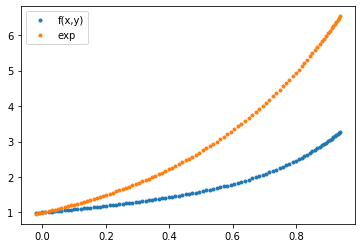

count:  518
step:  0 , Cost:  1.2328643 

step:  25 , Cost:  1.232088 

step:  50 , Cost:  1.2313123 





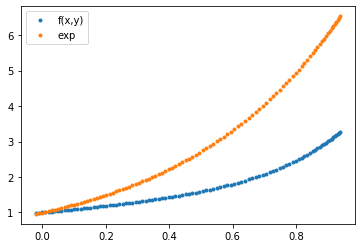

count:  519
step:  0 , Cost:  1.2312812 

step:  25 , Cost:  1.2305058 

step:  50 , Cost:  1.2297312 





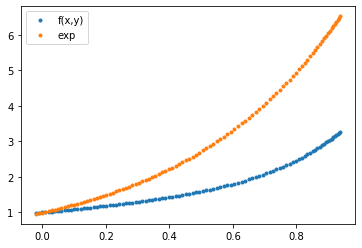

count:  520
step:  0 , Cost:  1.2297004 

step:  25 , Cost:  1.2289263 

step:  50 , Cost:  1.2281529 





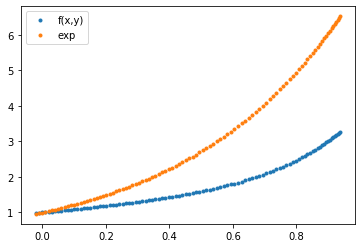

count:  521
step:  0 , Cost:  1.2281221 

step:  25 , Cost:  1.2273492 

step:  50 , Cost:  1.2265774 





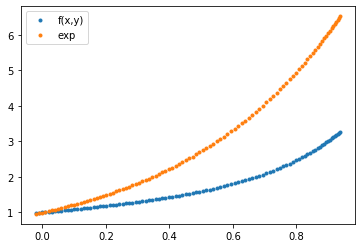

count:  522
step:  0 , Cost:  1.2265468 

step:  25 , Cost:  1.2257757 

step:  50 , Cost:  1.2250054 





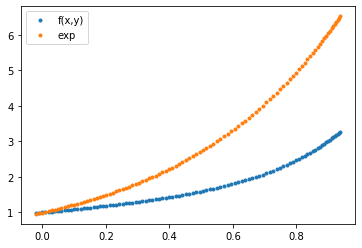

count:  523
step:  0 , Cost:  1.2249746 

step:  25 , Cost:  1.224205 

step:  50 , Cost:  1.223436 





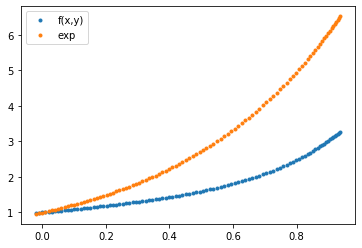

count:  524
step:  0 , Cost:  1.2234051 

step:  25 , Cost:  1.2226368 

step:  50 , Cost:  1.2218689 





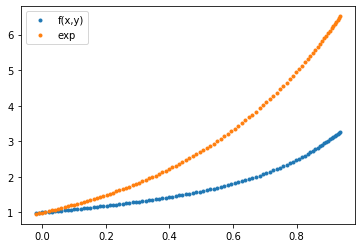

count:  525
step:  0 , Cost:  1.2218381 

step:  25 , Cost:  1.2210709 

step:  50 , Cost:  1.2203047 





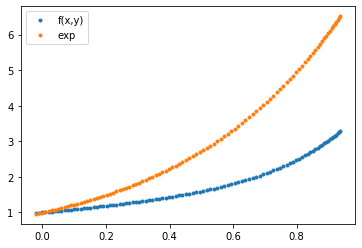

count:  526
step:  0 , Cost:  1.2202741 

step:  25 , Cost:  1.2195088 

step:  50 , Cost:  1.218744 





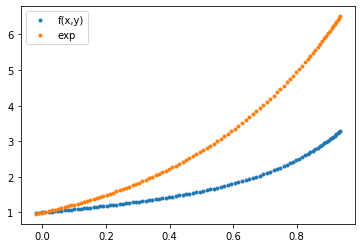

count:  527
step:  0 , Cost:  1.2187134 

step:  25 , Cost:  1.217949 

step:  50 , Cost:  1.2171855 





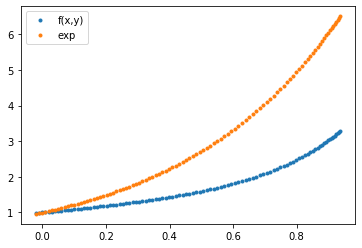

count:  528
step:  0 , Cost:  1.217155 

step:  25 , Cost:  1.2163919 

step:  50 , Cost:  1.2156295 





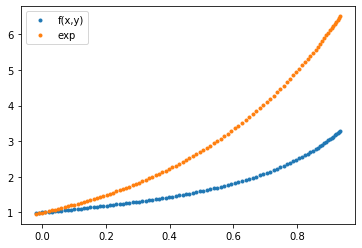

count:  529
step:  0 , Cost:  1.215599 

step:  25 , Cost:  1.2148372 

step:  50 , Cost:  1.2140764 





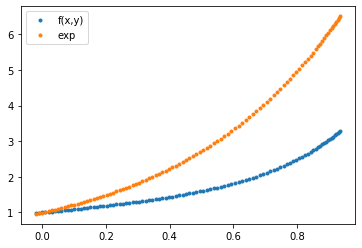

count:  530
step:  0 , Cost:  1.214046 

step:  25 , Cost:  1.2132863 

step:  50 , Cost:  1.2125273 





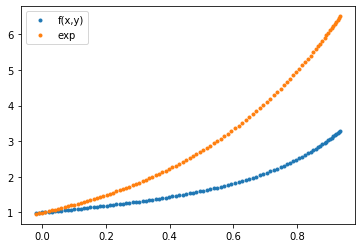

count:  531
step:  0 , Cost:  1.2124968 

step:  25 , Cost:  1.2117383 

step:  50 , Cost:  1.2109804 





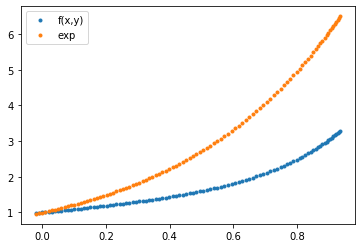

count:  532
step:  0 , Cost:  1.2109501 

step:  25 , Cost:  1.2101929 

step:  50 , Cost:  1.209436 





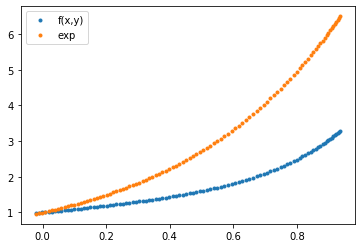

count:  533
step:  0 , Cost:  1.2094059 

step:  25 , Cost:  1.2086496 

step:  50 , Cost:  1.2078949 





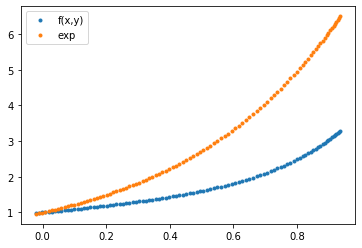

count:  534
step:  0 , Cost:  1.2078648 

step:  25 , Cost:  1.2071114 

step:  50 , Cost:  1.2063584 





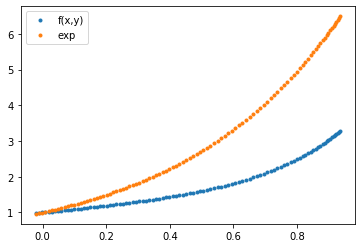

count:  535
step:  0 , Cost:  1.2063284 

step:  25 , Cost:  1.2055761 

step:  50 , Cost:  1.204824 





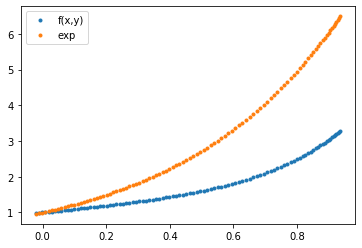

count:  536
step:  0 , Cost:  1.204794 

step:  25 , Cost:  1.2040429 

step:  50 , Cost:  1.2032926 





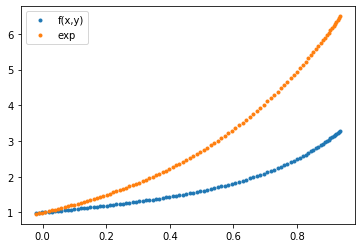

count:  537
step:  0 , Cost:  1.2032627 

step:  25 , Cost:  1.2025127 

step:  50 , Cost:  1.2017636 





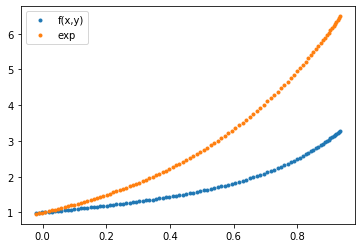

count:  538
step:  0 , Cost:  1.2017337 

step:  25 , Cost:  1.2009854 

step:  50 , Cost:  1.2002381 





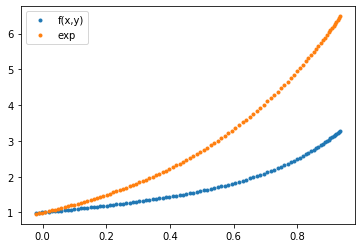

count:  539
step:  0 , Cost:  1.2002083 

step:  25 , Cost:  1.1994611 

step:  50 , Cost:  1.1987149 





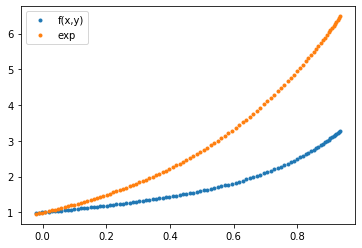

count:  540
step:  0 , Cost:  1.198685 

step:  25 , Cost:  1.1979394 

step:  50 , Cost:  1.1971943 





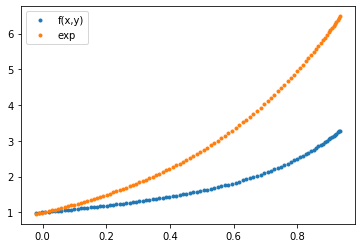

count:  541
step:  0 , Cost:  1.1971644 

step:  25 , Cost:  1.19642 

step:  50 , Cost:  1.195676 





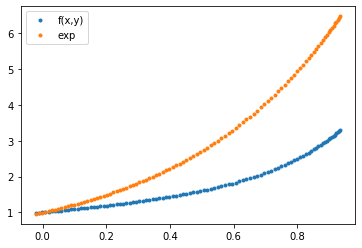

count:  542
step:  0 , Cost:  1.1956462 

step:  25 , Cost:  1.1949033 

step:  50 , Cost:  1.1941612 





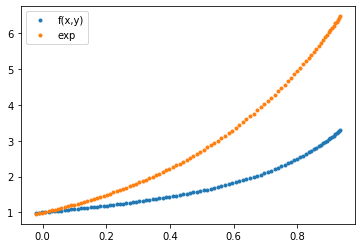

count:  543
step:  0 , Cost:  1.1941314 

step:  25 , Cost:  1.1933898 

step:  50 , Cost:  1.1926489 





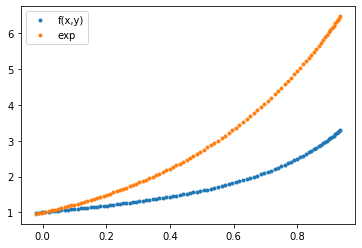

count:  544
step:  0 , Cost:  1.1926191 

step:  25 , Cost:  1.1918788 

step:  50 , Cost:  1.191139 





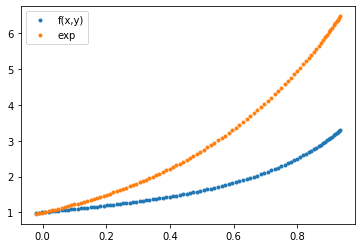

count:  545
step:  0 , Cost:  1.1911093 

step:  25 , Cost:  1.19037 

step:  50 , Cost:  1.1896312 





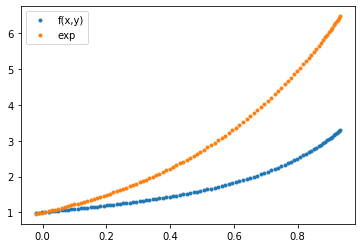

count:  546
step:  0 , Cost:  1.1896018 

step:  25 , Cost:  1.1888638 

step:  50 , Cost:  1.1881267 





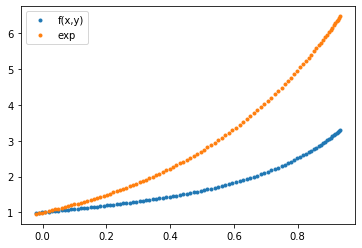

count:  547
step:  0 , Cost:  1.1880972 

step:  25 , Cost:  1.187361 

step:  50 , Cost:  1.1866255 





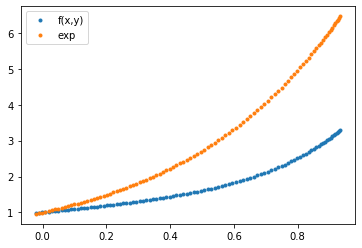

count:  548
step:  0 , Cost:  1.186596 

step:  25 , Cost:  1.1858611 

step:  50 , Cost:  1.1851263 





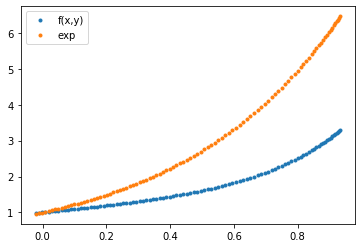

count:  549
step:  0 , Cost:  1.1850971 

step:  25 , Cost:  1.1843629 

step:  50 , Cost:  1.1836295 





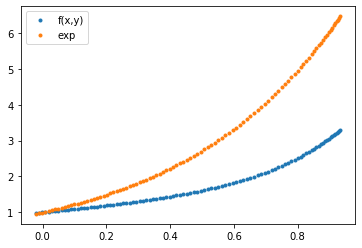

count:  550
step:  0 , Cost:  1.1836002 

step:  25 , Cost:  1.1828673 

step:  50 , Cost:  1.1821353 





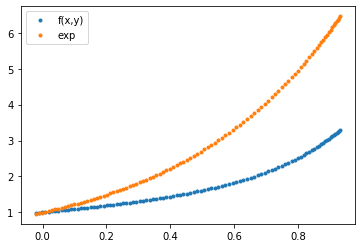

count:  551
step:  0 , Cost:  1.1821059 

step:  25 , Cost:  1.1813749 

step:  50 , Cost:  1.1806442 





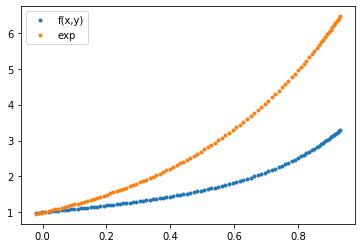

count:  552
step:  0 , Cost:  1.1806148 

step:  25 , Cost:  1.1798848 

step:  50 , Cost:  1.1791552 





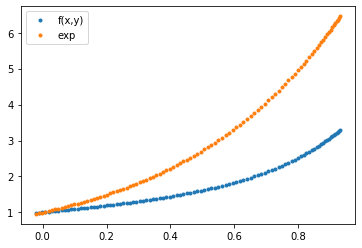

count:  553
step:  0 , Cost:  1.1791261 

step:  25 , Cost:  1.1783969 

step:  50 , Cost:  1.1776683 





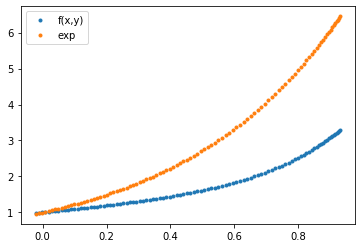

count:  554
step:  0 , Cost:  1.1776391 

step:  25 , Cost:  1.1769109 

step:  50 , Cost:  1.1761835 





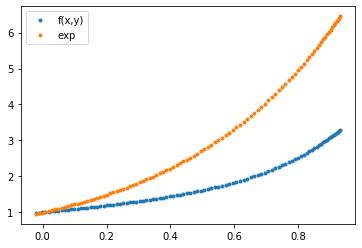

count:  555
step:  0 , Cost:  1.1761544 

step:  25 , Cost:  1.175428 

step:  50 , Cost:  1.1747022 





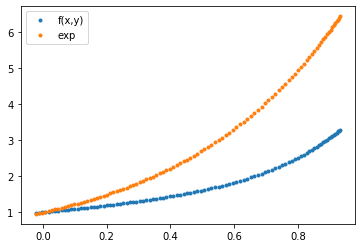

count:  556
step:  0 , Cost:  1.1746733 

step:  25 , Cost:  1.1739482 

step:  50 , Cost:  1.1732235 





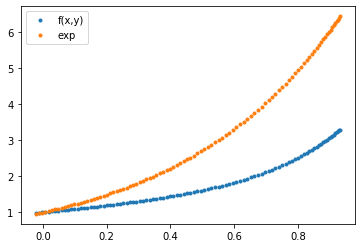

count:  557
step:  0 , Cost:  1.1731944 

step:  25 , Cost:  1.1724706 

step:  50 , Cost:  1.1717471 





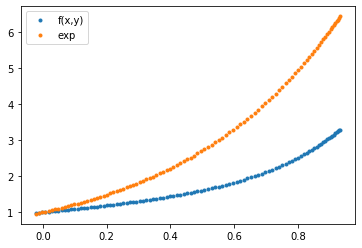

count:  558
step:  0 , Cost:  1.1717182 

step:  25 , Cost:  1.1709952 

step:  50 , Cost:  1.170273 





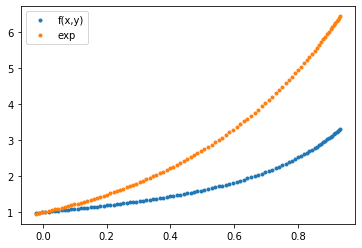

count:  559
step:  0 , Cost:  1.1702441 

step:  25 , Cost:  1.1695222 

step:  50 , Cost:  1.1688014 





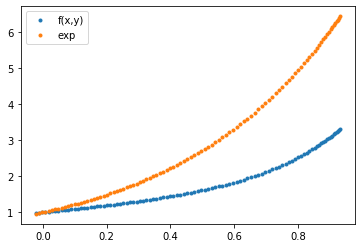

count:  560
step:  0 , Cost:  1.1687725 

step:  25 , Cost:  1.1680526 

step:  50 , Cost:  1.1673337 





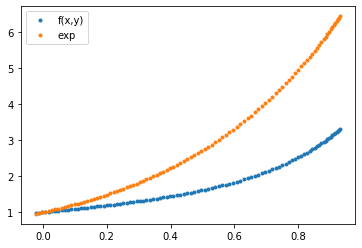

count:  561
step:  0 , Cost:  1.1673049 

step:  25 , Cost:  1.1665865 

step:  50 , Cost:  1.1658686 





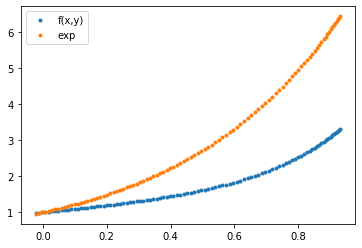

count:  562
step:  0 , Cost:  1.1658401 

step:  25 , Cost:  1.1651229 

step:  50 , Cost:  1.1644064 





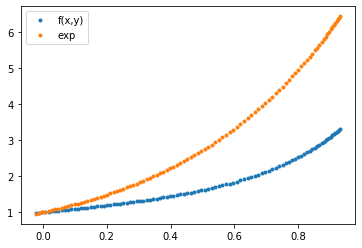

count:  563
step:  0 , Cost:  1.1643777 

step:  25 , Cost:  1.1636615 

step:  50 , Cost:  1.1629457 





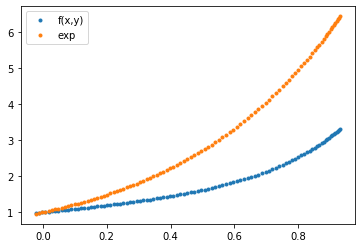

count:  564
step:  0 , Cost:  1.1629174 

step:  25 , Cost:  1.1622026 

step:  50 , Cost:  1.1614885 





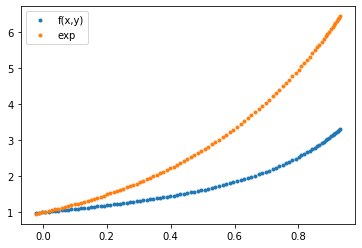

count:  565
step:  0 , Cost:  1.16146 

step:  25 , Cost:  1.1607466 

step:  50 , Cost:  1.1600335 





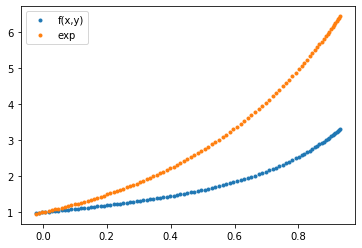

count:  566
step:  0 , Cost:  1.1600051 

step:  25 , Cost:  1.1592922 

step:  50 , Cost:  1.1585803 





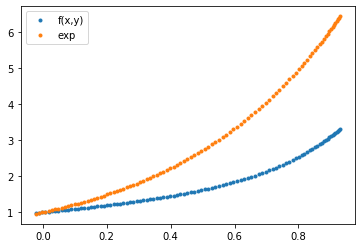

count:  567
step:  0 , Cost:  1.1585518 

step:  25 , Cost:  1.1578404 

step:  50 , Cost:  1.1571298 





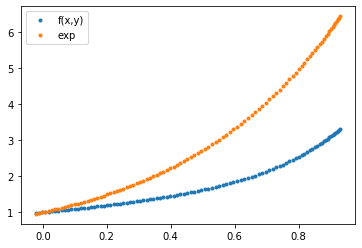

count:  568
step:  0 , Cost:  1.1571013 

step:  25 , Cost:  1.156391 

step:  50 , Cost:  1.1556817 





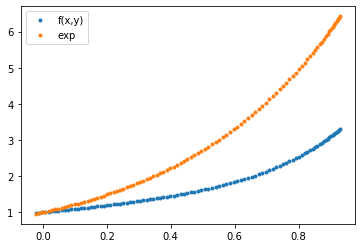

count:  569
step:  0 , Cost:  1.1556534 

step:  25 , Cost:  1.1549449 

step:  50 , Cost:  1.154237 





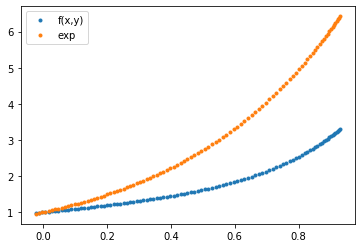

count:  570
step:  0 , Cost:  1.1542087 

step:  25 , Cost:  1.1535014 

step:  50 , Cost:  1.1527948 





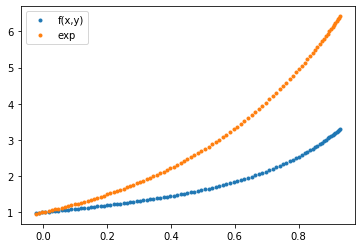

count:  571
step:  0 , Cost:  1.1527666 

step:  25 , Cost:  1.1520605 

step:  50 , Cost:  1.151355 





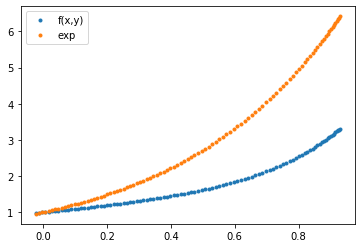

count:  572
step:  0 , Cost:  1.1513269 

step:  25 , Cost:  1.150622 

step:  50 , Cost:  1.1499175 





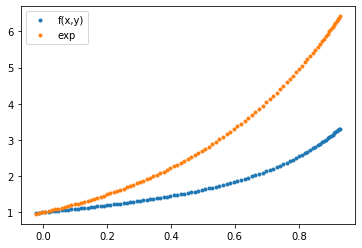

count:  573
step:  0 , Cost:  1.1498893 

step:  25 , Cost:  1.1491855 

step:  50 , Cost:  1.1484826 





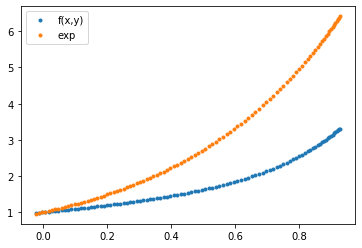

count:  574
step:  0 , Cost:  1.1484544 

step:  25 , Cost:  1.1477523 

step:  50 , Cost:  1.1470505 





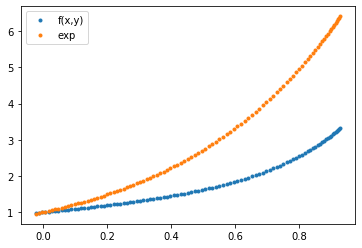

count:  575
step:  0 , Cost:  1.1470225 

step:  25 , Cost:  1.146321 

step:  50 , Cost:  1.1456203 





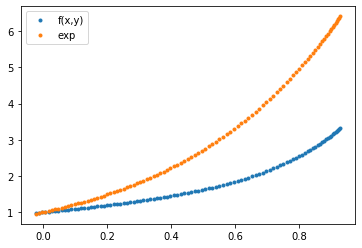

count:  576
step:  0 , Cost:  1.1455922 

step:  25 , Cost:  1.1448919 

step:  50 , Cost:  1.1441917 





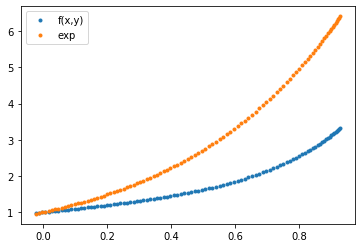

count:  577
step:  0 , Cost:  1.1441638 

step:  25 , Cost:  1.1434643 

step:  50 , Cost:  1.1427655 





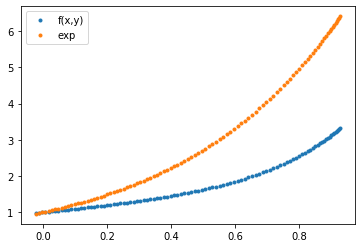

count:  578
step:  0 , Cost:  1.1427375 

step:  25 , Cost:  1.1420394 

step:  50 , Cost:  1.1413419 





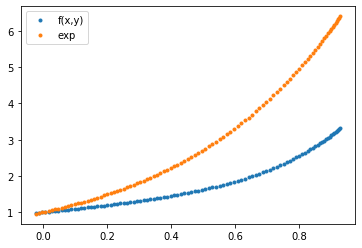

count:  579
step:  0 , Cost:  1.141314 

step:  25 , Cost:  1.140617 

step:  50 , Cost:  1.1399205 





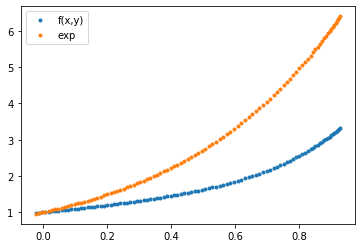

count:  580
step:  0 , Cost:  1.1398927 

step:  25 , Cost:  1.1391966 

step:  50 , Cost:  1.1385012 





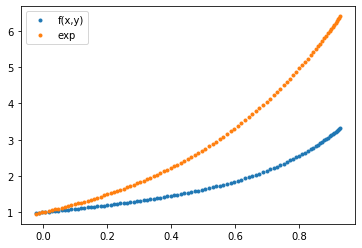

count:  581
step:  0 , Cost:  1.1384735 

step:  25 , Cost:  1.1377784 

step:  50 , Cost:  1.1370841 





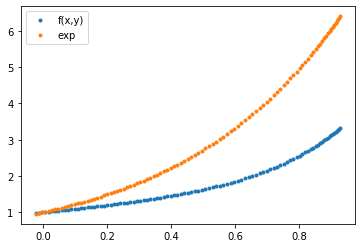

count:  582
step:  0 , Cost:  1.1370562 

step:  25 , Cost:  1.136363 

step:  50 , Cost:  1.1356704 





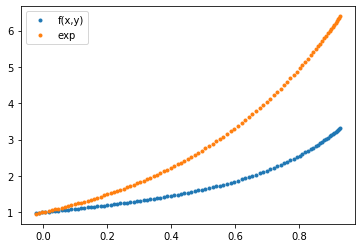

count:  583
step:  0 , Cost:  1.1356426 

step:  25 , Cost:  1.134951 

step:  50 , Cost:  1.13426 





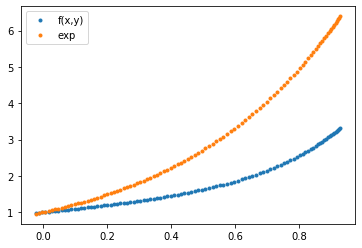

count:  584
step:  0 , Cost:  1.1342324 

step:  25 , Cost:  1.1335418 

step:  50 , Cost:  1.1328518 





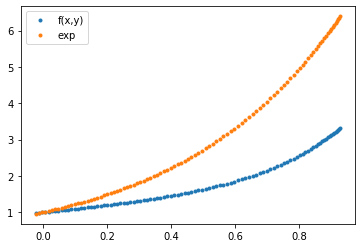

count:  585
step:  0 , Cost:  1.1328243 

step:  25 , Cost:  1.1321348 

step:  50 , Cost:  1.1314459 





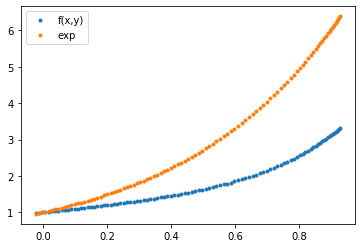

count:  586
step:  0 , Cost:  1.1314183 

step:  25 , Cost:  1.1307302 

step:  50 , Cost:  1.1300423 





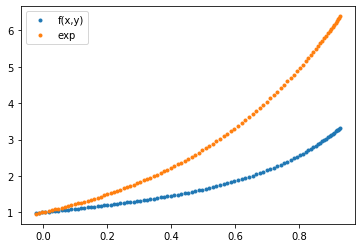

count:  587
step:  0 , Cost:  1.1300148 

step:  25 , Cost:  1.1293277 

step:  50 , Cost:  1.128641 





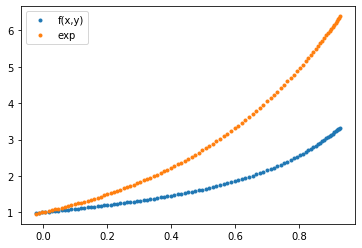

count:  588
step:  0 , Cost:  1.1286136 

step:  25 , Cost:  1.1279283 

step:  50 , Cost:  1.1272433 





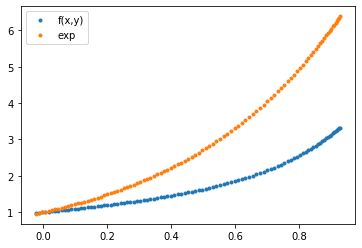

count:  589
step:  0 , Cost:  1.127216 

step:  25 , Cost:  1.1265315 

step:  50 , Cost:  1.1258473 





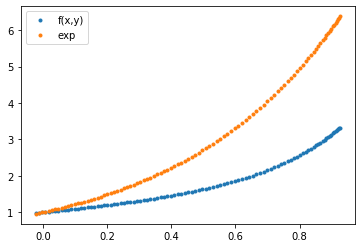

count:  590
step:  0 , Cost:  1.12582 

step:  25 , Cost:  1.1251366 

step:  50 , Cost:  1.1244535 





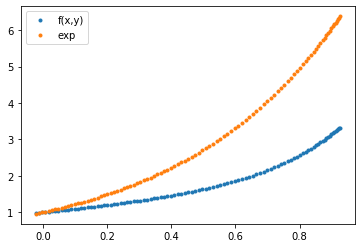

count:  591
step:  0 , Cost:  1.1244262 

step:  25 , Cost:  1.1237437 

step:  50 , Cost:  1.1230617 





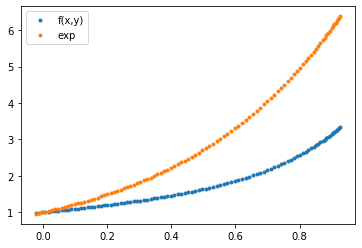

count:  592
step:  0 , Cost:  1.1230342 

step:  25 , Cost:  1.1223525 

step:  50 , Cost:  1.1216713 





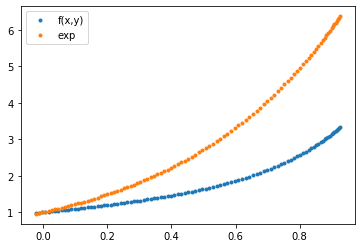

count:  593
step:  0 , Cost:  1.121644 

step:  25 , Cost:  1.1209639 

step:  50 , Cost:  1.1202843 





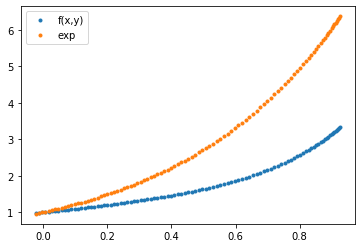

count:  594
step:  0 , Cost:  1.1202571 

step:  25 , Cost:  1.1195781 

step:  50 , Cost:  1.1188993 





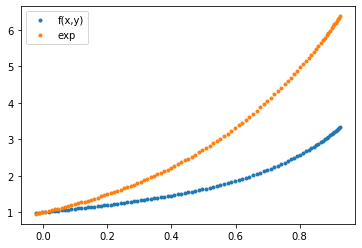

count:  595
step:  0 , Cost:  1.1188722 

step:  25 , Cost:  1.1181937 

step:  50 , Cost:  1.1175159 





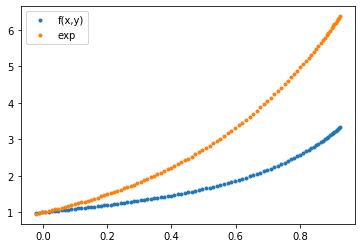

count:  596
step:  0 , Cost:  1.1174887 

step:  25 , Cost:  1.1168114 

step:  50 , Cost:  1.1161348 





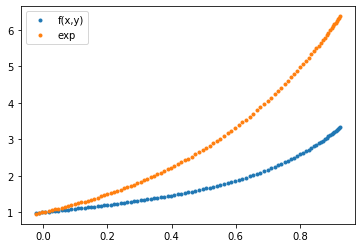

count:  597
step:  0 , Cost:  1.1161077 

step:  25 , Cost:  1.1154315 

step:  50 , Cost:  1.1147555 





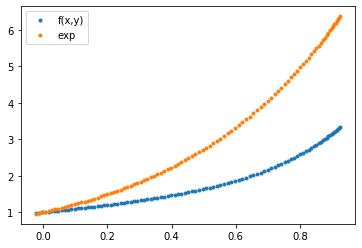

count:  598
step:  0 , Cost:  1.1147286 

step:  25 , Cost:  1.1140538 

step:  50 , Cost:  1.1133795 





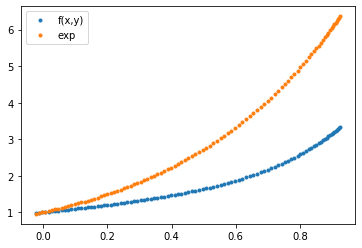

count:  599
step:  0 , Cost:  1.1133525 

step:  25 , Cost:  1.112679 

step:  50 , Cost:  1.1120058 





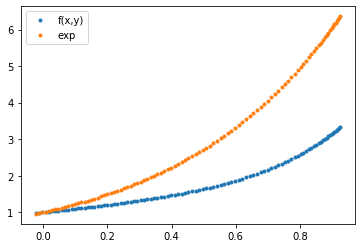

count:  600
step:  0 , Cost:  1.1119789 

step:  25 , Cost:  1.1113062 

step:  50 , Cost:  1.1106346 





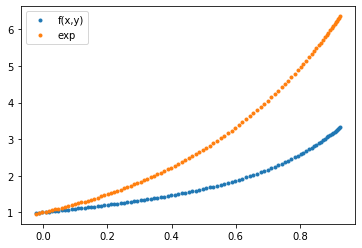

count:  601
step:  0 , Cost:  1.1106077 

step:  25 , Cost:  1.1099366 

step:  50 , Cost:  1.1092662 





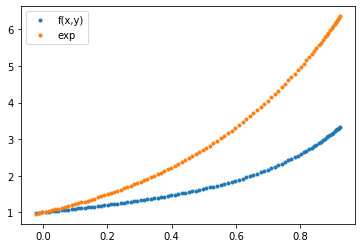

count:  602
step:  0 , Cost:  1.1092392 

step:  25 , Cost:  1.1085696 

step:  50 , Cost:  1.1079 





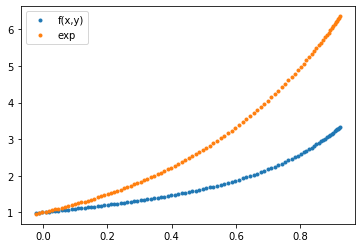

count:  603
step:  0 , Cost:  1.1078733 

step:  25 , Cost:  1.1072046 

step:  50 , Cost:  1.1065364 





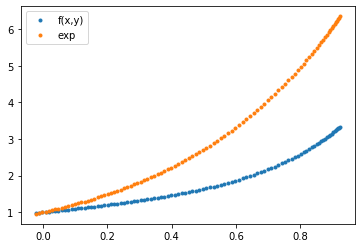

count:  604
step:  0 , Cost:  1.1065098 

step:  25 , Cost:  1.1058421 

step:  50 , Cost:  1.1051751 





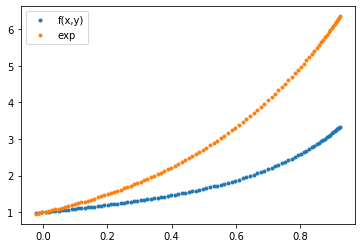

count:  605
step:  0 , Cost:  1.1051483 

step:  25 , Cost:  1.1044819 

step:  50 , Cost:  1.103816 





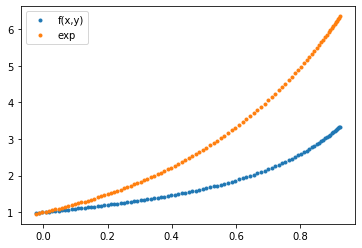

count:  606
step:  0 , Cost:  1.1037893 

step:  25 , Cost:  1.1031235 

step:  50 , Cost:  1.1024581 





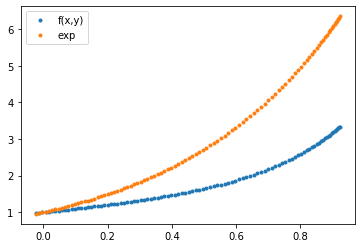

count:  607
step:  0 , Cost:  1.1024315 

step:  25 , Cost:  1.1017667 

step:  50 , Cost:  1.1011024 





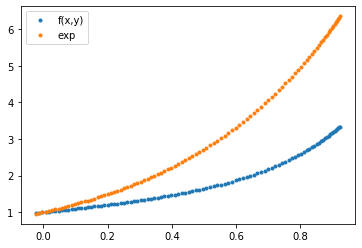

count:  608
step:  0 , Cost:  1.1010756 

step:  25 , Cost:  1.1004122 

step:  50 , Cost:  1.0997493 





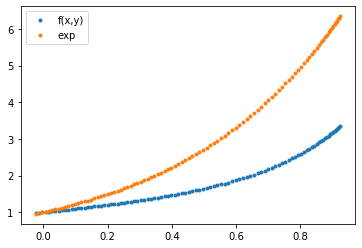

count:  609
step:  0 , Cost:  1.0997229 

step:  25 , Cost:  1.0990604 

step:  50 , Cost:  1.0983986 





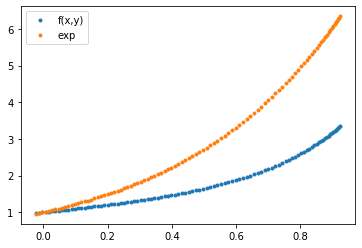

count:  610
step:  0 , Cost:  1.0983721 

step:  25 , Cost:  1.0977113 

step:  50 , Cost:  1.0970508 





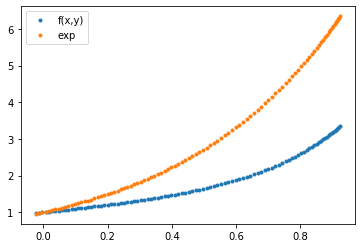

count:  611
step:  0 , Cost:  1.0970244 

step:  25 , Cost:  1.0963645 

step:  50 , Cost:  1.0957046 





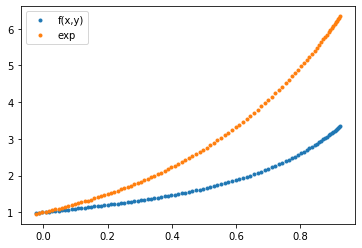

count:  612
step:  0 , Cost:  1.0956782 

step:  25 , Cost:  1.0950189 

step:  50 , Cost:  1.0943599 





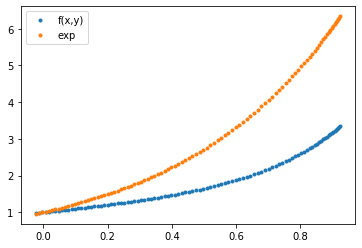

count:  613
step:  0 , Cost:  1.0943335 

step:  25 , Cost:  1.0936751 

step:  50 , Cost:  1.0930175 





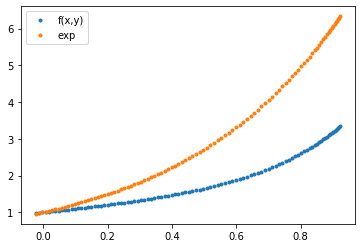

count:  614
step:  0 , Cost:  1.0929912 

step:  25 , Cost:  1.0923343 

step:  50 , Cost:  1.0916775 





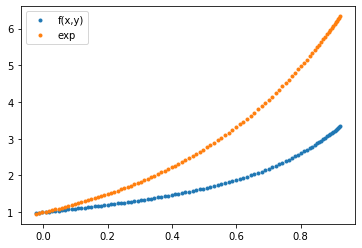

count:  615
step:  0 , Cost:  1.0916514 

step:  25 , Cost:  1.090995 

step:  50 , Cost:  1.0903392 





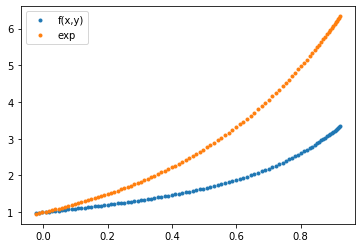

count:  616
step:  0 , Cost:  1.0903131 

step:  25 , Cost:  1.0896577 

step:  50 , Cost:  1.0890027 





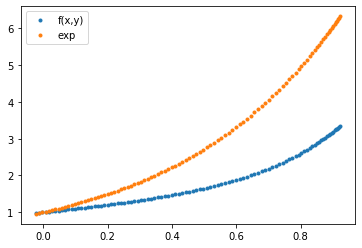

count:  617
step:  0 , Cost:  1.0889765 

step:  25 , Cost:  1.088322 

step:  50 , Cost:  1.0876688 





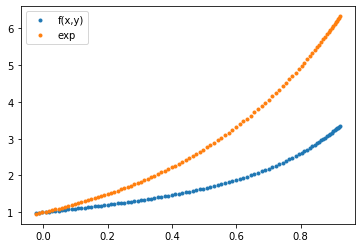

count:  618
step:  0 , Cost:  1.0876428 

step:  25 , Cost:  1.08699 

step:  50 , Cost:  1.0863379 





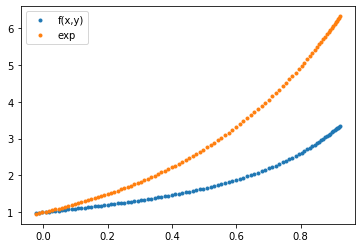

count:  619
step:  0 , Cost:  1.0863119 

step:  25 , Cost:  1.0856608 

step:  50 , Cost:  1.08501 





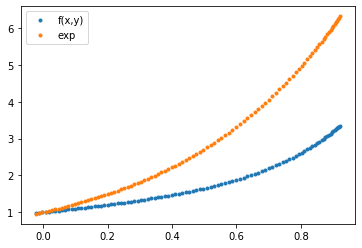

count:  620
step:  0 , Cost:  1.084984 

step:  25 , Cost:  1.0843337 

step:  50 , Cost:  1.0836836 





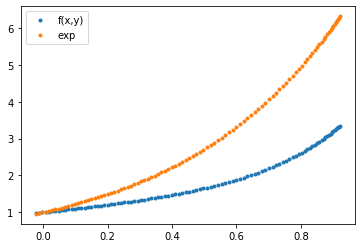

count:  621
step:  0 , Cost:  1.0836577 

step:  25 , Cost:  1.0830083 

step:  50 , Cost:  1.0823596 





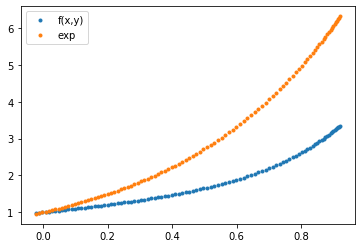

count:  622
step:  0 , Cost:  1.0823336 

step:  25 , Cost:  1.0816851 

step:  50 , Cost:  1.0810368 





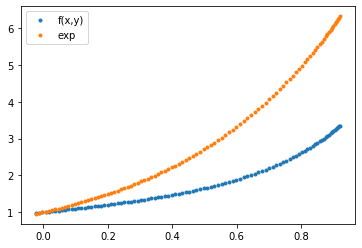

count:  623
step:  0 , Cost:  1.081011 

step:  25 , Cost:  1.0803633 

step:  50 , Cost:  1.0797161 





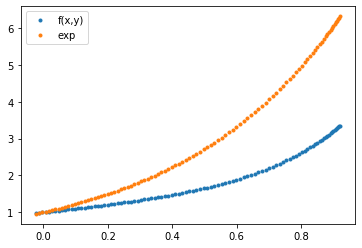

count:  624
step:  0 , Cost:  1.0796902 

step:  25 , Cost:  1.0790439 

step:  50 , Cost:  1.0783985 





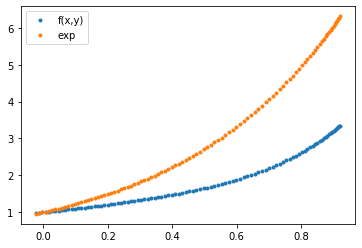

count:  625
step:  0 , Cost:  1.0783727 

step:  25 , Cost:  1.0777276 

step:  50 , Cost:  1.0770829 





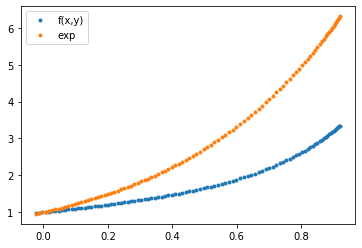

count:  626
step:  0 , Cost:  1.077057 

step:  25 , Cost:  1.0764127 

step:  50 , Cost:  1.0757687 





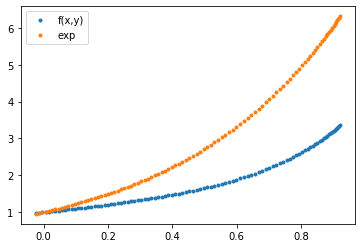

count:  627
step:  0 , Cost:  1.075743 

step:  25 , Cost:  1.0750998 

step:  50 , Cost:  1.074457 





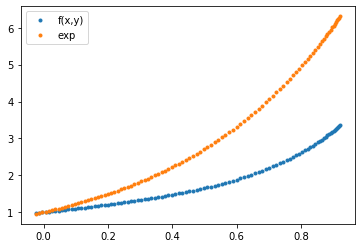

count:  628
step:  0 , Cost:  1.0744312 

step:  25 , Cost:  1.0737886 

step:  50 , Cost:  1.0731465 





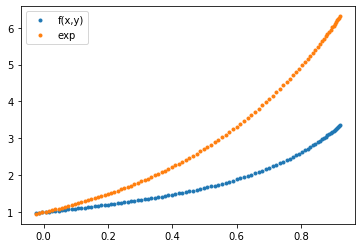

count:  629
step:  0 , Cost:  1.0731208 

step:  25 , Cost:  1.0724788 

step:  50 , Cost:  1.0718374 





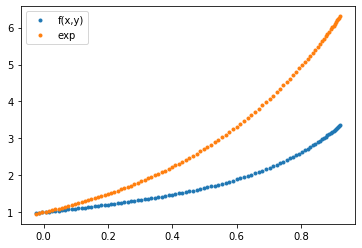

count:  630
step:  0 , Cost:  1.0718118 

step:  25 , Cost:  1.0711719 

step:  50 , Cost:  1.0705323 





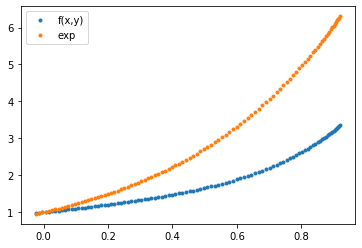

count:  631
step:  0 , Cost:  1.0705067 

step:  25 , Cost:  1.0698676 

step:  50 , Cost:  1.0692289 





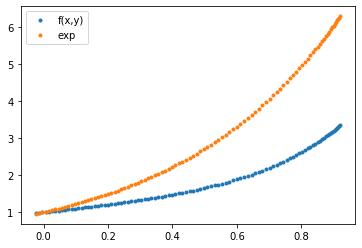

count:  632
step:  0 , Cost:  1.0692033 

step:  25 , Cost:  1.0685647 

step:  50 , Cost:  1.0679268 





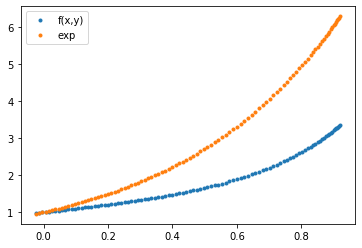

count:  633
step:  0 , Cost:  1.0679013 

step:  25 , Cost:  1.0672641 

step:  50 , Cost:  1.0666276 





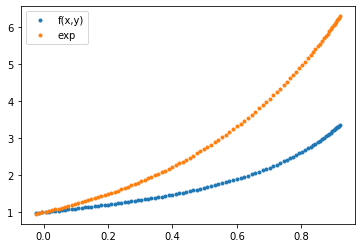

count:  634
step:  0 , Cost:  1.0666022 

step:  25 , Cost:  1.0659666 

step:  50 , Cost:  1.065331 





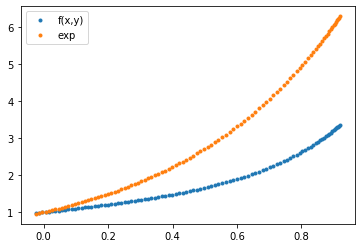

count:  635
step:  0 , Cost:  1.0653057 

step:  25 , Cost:  1.0646706 

step:  50 , Cost:  1.0640361 





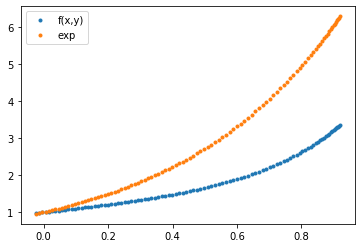

count:  636
step:  0 , Cost:  1.064011 

step:  25 , Cost:  1.0633775 

step:  50 , Cost:  1.0627445 





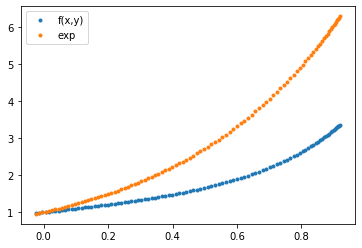

count:  637
step:  0 , Cost:  1.0627192 

step:  25 , Cost:  1.0620866 

step:  50 , Cost:  1.0614547 





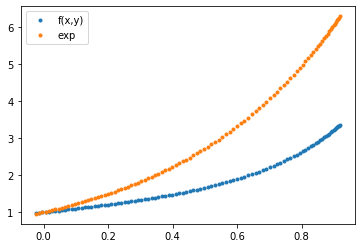

count:  638
step:  0 , Cost:  1.0614293 

step:  25 , Cost:  1.0607977 

step:  50 , Cost:  1.0601666 





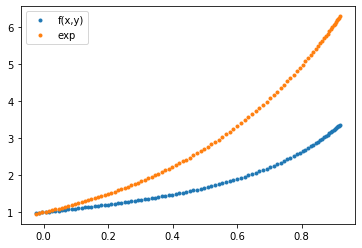

count:  639
step:  0 , Cost:  1.0601414 

step:  25 , Cost:  1.0595107 

step:  50 , Cost:  1.0588803 





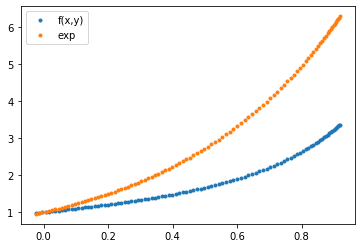

count:  640
step:  0 , Cost:  1.0588549 

step:  25 , Cost:  1.0582252 

step:  50 , Cost:  1.0575953 





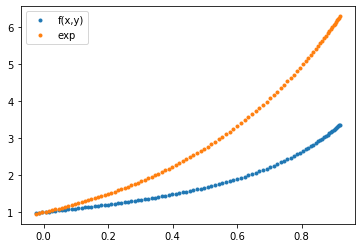

count:  641
step:  0 , Cost:  1.0575702 

step:  25 , Cost:  1.0569408 

step:  50 , Cost:  1.0563129 





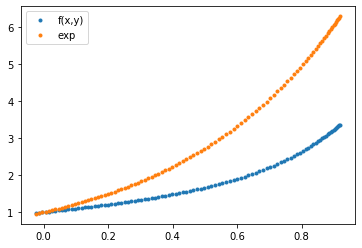

count:  642
step:  0 , Cost:  1.0562876 

step:  25 , Cost:  1.0556602 

step:  50 , Cost:  1.0550331 





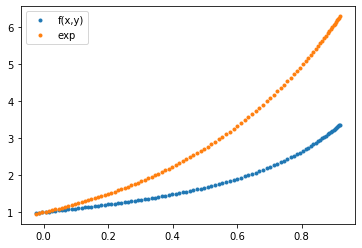

count:  643
step:  0 , Cost:  1.0550079 

step:  25 , Cost:  1.0543809 

step:  50 , Cost:  1.0537547 





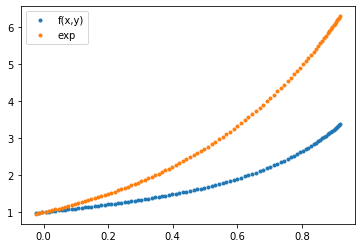

count:  644
step:  0 , Cost:  1.0537295 

step:  25 , Cost:  1.0531034 

step:  50 , Cost:  1.0524778 





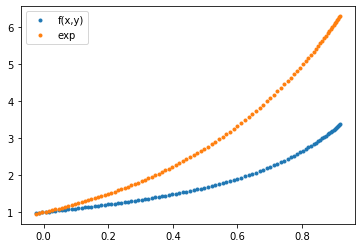

count:  645
step:  0 , Cost:  1.0524528 

step:  25 , Cost:  1.0518278 

step:  50 , Cost:  1.0512031 





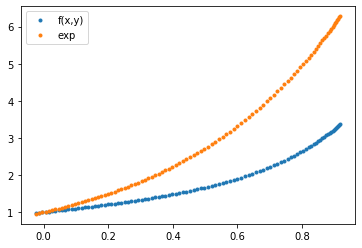

count:  646
step:  0 , Cost:  1.0511781 

step:  25 , Cost:  1.0505536 

step:  50 , Cost:  1.0499294 





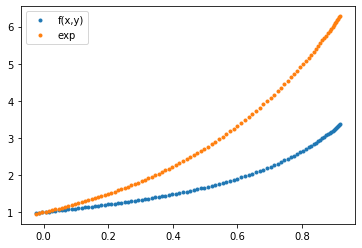

count:  647
step:  0 , Cost:  1.0499045 

step:  25 , Cost:  1.0492809 

step:  50 , Cost:  1.0486585 





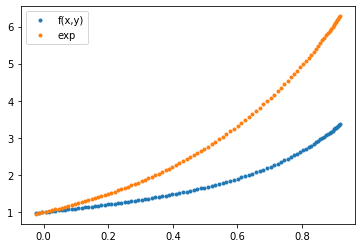

count:  648
step:  0 , Cost:  1.0486337 

step:  25 , Cost:  1.0480117 

step:  50 , Cost:  1.0473899 





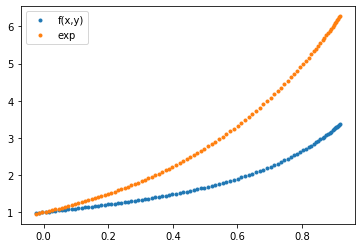

count:  649
step:  0 , Cost:  1.047365 

step:  25 , Cost:  1.0467446 

step:  50 , Cost:  1.0461245 





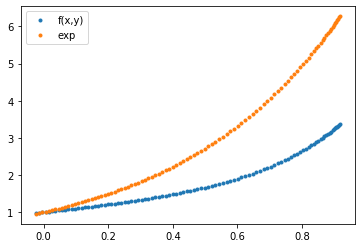

count:  650
step:  0 , Cost:  1.0460994 

step:  25 , Cost:  1.0454798 

step:  50 , Cost:  1.0448608 





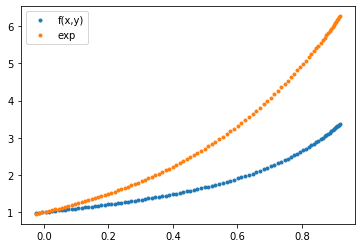

count:  651
step:  0 , Cost:  1.044836 

step:  25 , Cost:  1.0442173 

step:  50 , Cost:  1.0435994 





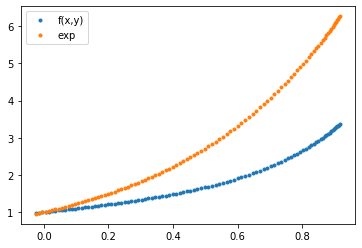

count:  652
step:  0 , Cost:  1.0435746 

step:  25 , Cost:  1.0429567 

step:  50 , Cost:  1.0423392 





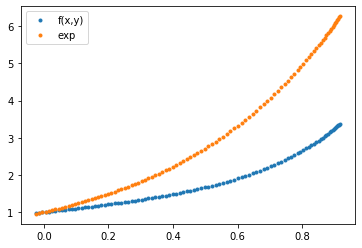

count:  653
step:  0 , Cost:  1.0423145 

step:  25 , Cost:  1.0416976 

step:  50 , Cost:  1.0410817 





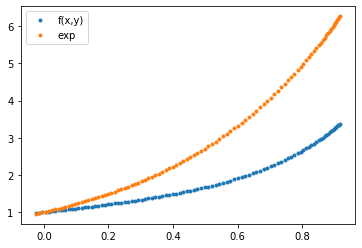

count:  654
step:  0 , Cost:  1.041057 

step:  25 , Cost:  1.0404416 

step:  50 , Cost:  1.0398266 





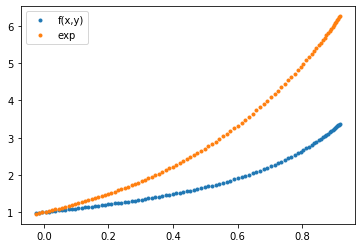

count:  655
step:  0 , Cost:  1.039802 

step:  25 , Cost:  1.0391872 

step:  50 , Cost:  1.0385727 





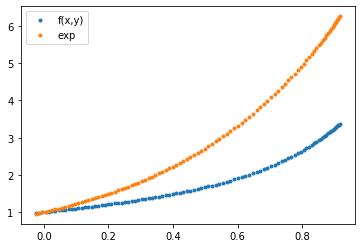

count:  656
step:  0 , Cost:  1.038548 

step:  25 , Cost:  1.0379337 

step:  50 , Cost:  1.0373201 





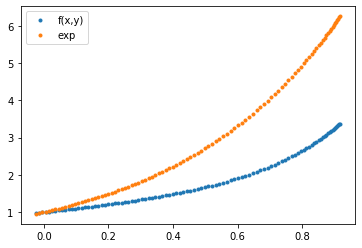

count:  657
step:  0 , Cost:  1.0372956 

step:  25 , Cost:  1.0366822 

step:  50 , Cost:  1.0360694 





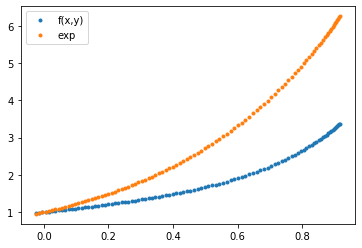

count:  658
step:  0 , Cost:  1.036045 

step:  25 , Cost:  1.0354321 

step:  50 , Cost:  1.0348198 





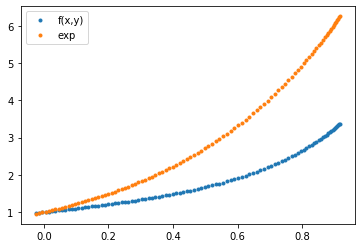

count:  659
step:  0 , Cost:  1.0347953 

step:  25 , Cost:  1.0341836 

step:  50 , Cost:  1.0335728 





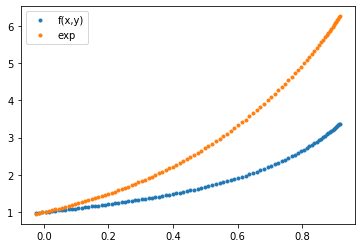

count:  660
step:  0 , Cost:  1.0335485 

step:  25 , Cost:  1.0329384 

step:  50 , Cost:  1.0323284 





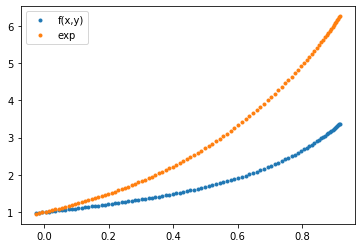

count:  661
step:  0 , Cost:  1.0323038 

step:  25 , Cost:  1.0316943 

step:  50 , Cost:  1.0310853 





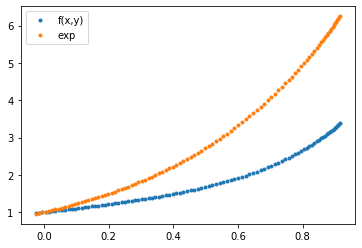

count:  662
step:  0 , Cost:  1.0310608 

step:  25 , Cost:  1.030452 

step:  50 , Cost:  1.0298438 





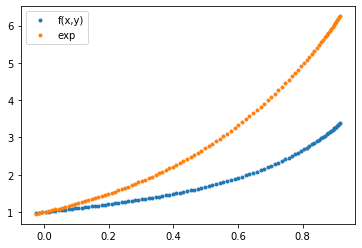

count:  663
step:  0 , Cost:  1.0298195 

step:  25 , Cost:  1.0292116 

step:  50 , Cost:  1.0286045 





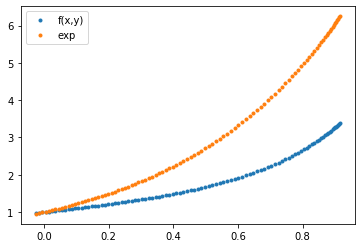

count:  664
step:  0 , Cost:  1.0285802 

step:  25 , Cost:  1.0279739 

step:  50 , Cost:  1.0273682 





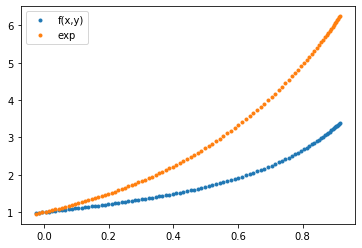

count:  665
step:  0 , Cost:  1.0273439 

step:  25 , Cost:  1.0267388 

step:  50 , Cost:  1.0261347 





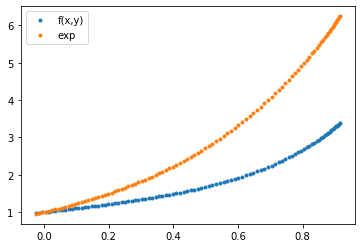

count:  666
step:  0 , Cost:  1.0261104 

step:  25 , Cost:  1.0255069 

step:  50 , Cost:  1.0249037 





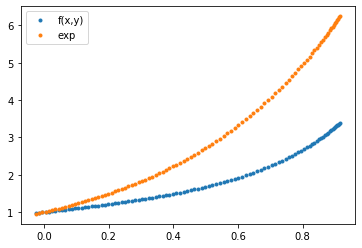

count:  667
step:  0 , Cost:  1.0248796 

step:  25 , Cost:  1.0242765 

step:  50 , Cost:  1.0236737 





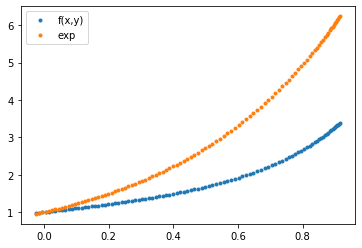

count:  668
step:  0 , Cost:  1.0236495 

step:  25 , Cost:  1.0230469 

step:  50 , Cost:  1.0224451 





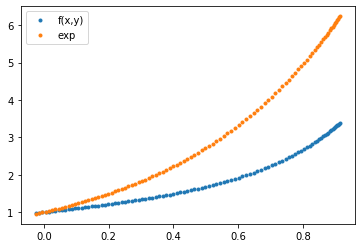

count:  669
step:  0 , Cost:  1.022421 

step:  25 , Cost:  1.0218196 

step:  50 , Cost:  1.0212184 





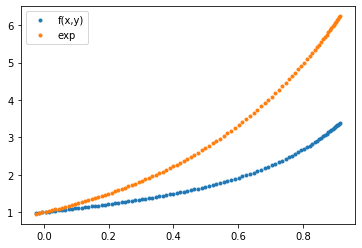

count:  670
step:  0 , Cost:  1.0211943 

step:  25 , Cost:  1.0205935 

step:  50 , Cost:  1.0199932 





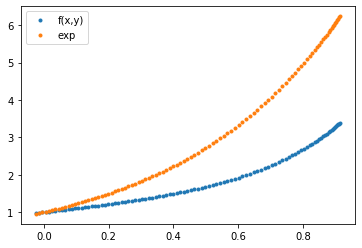

count:  671
step:  0 , Cost:  1.0199691 

step:  25 , Cost:  1.019369 

step:  50 , Cost:  1.01877 





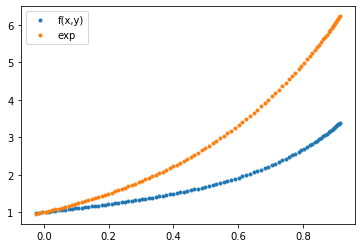

count:  672
step:  0 , Cost:  1.018746 

step:  25 , Cost:  1.0181477 

step:  50 , Cost:  1.0175495 





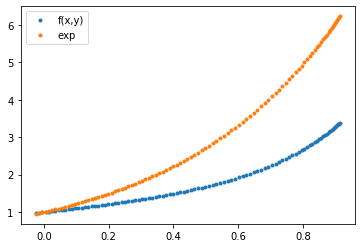

count:  673
step:  0 , Cost:  1.0175254 

step:  25 , Cost:  1.0169278 

step:  50 , Cost:  1.0163305 





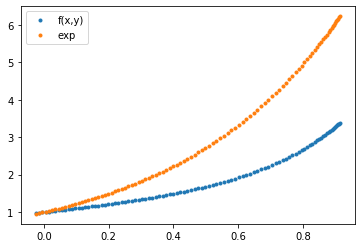

count:  674
step:  0 , Cost:  1.0163066 

step:  25 , Cost:  1.0157095 

step:  50 , Cost:  1.0151129 





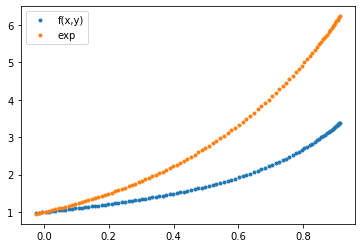

count:  675
step:  0 , Cost:  1.015089 

step:  25 , Cost:  1.014493 

step:  50 , Cost:  1.0138968 





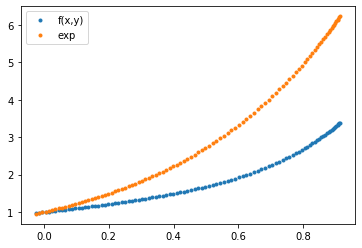

count:  676
step:  0 , Cost:  1.0138731 

step:  25 , Cost:  1.0132775 

step:  50 , Cost:  1.0126823 





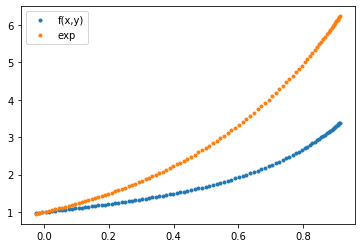

count:  677
step:  0 , Cost:  1.0126584 

step:  25 , Cost:  1.0120634 

step:  50 , Cost:  1.0114689 





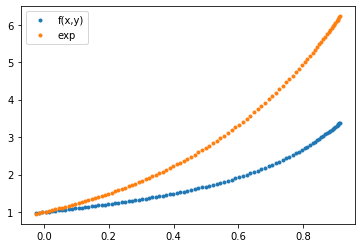

count:  678
step:  0 , Cost:  1.0114452 

step:  25 , Cost:  1.0108527 

step:  50 , Cost:  1.0102608 





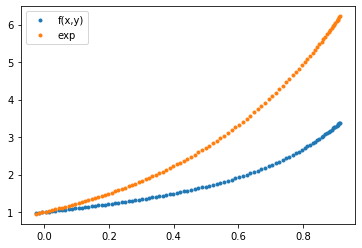

count:  679
step:  0 , Cost:  1.0102372 

step:  25 , Cost:  1.0096453 

step:  50 , Cost:  1.0090538 





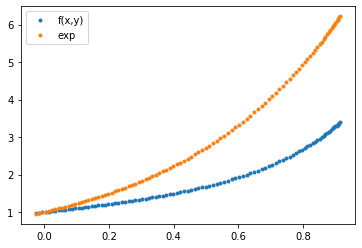

count:  680
step:  0 , Cost:  1.0090301 

step:  25 , Cost:  1.0084391 

step:  50 , Cost:  1.0078483 





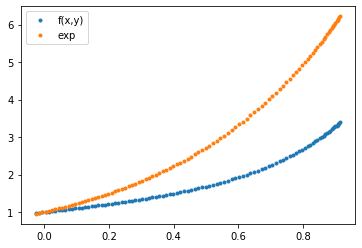

count:  681
step:  0 , Cost:  1.0078249 

step:  25 , Cost:  1.0072349 

step:  50 , Cost:  1.0066453 





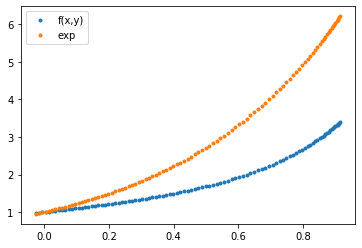

count:  682
step:  0 , Cost:  1.006622 

step:  25 , Cost:  1.0060326 

step:  50 , Cost:  1.0054436 





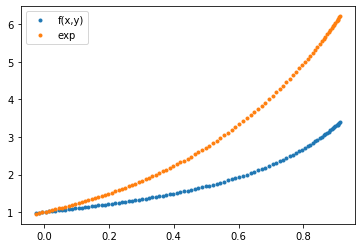

count:  683
step:  0 , Cost:  1.00542 

step:  25 , Cost:  1.0048311 

step:  50 , Cost:  1.0042425 





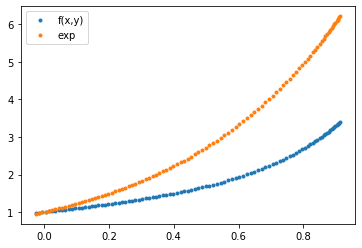

count:  684
step:  0 , Cost:  1.004219 

step:  25 , Cost:  1.0036315 

step:  50 , Cost:  1.0030446 





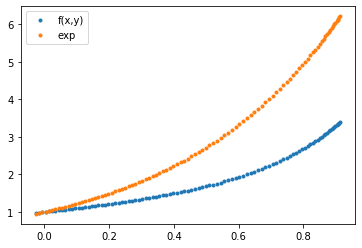

count:  685
step:  0 , Cost:  1.0030212 

step:  25 , Cost:  1.0024345 

step:  50 , Cost:  1.0018481 





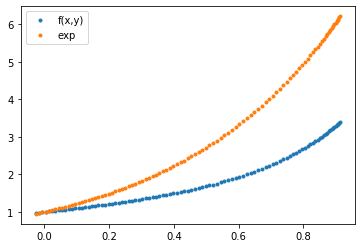

count:  686
step:  0 , Cost:  1.0018247 

step:  25 , Cost:  1.0012383 

step:  50 , Cost:  1.0006527 





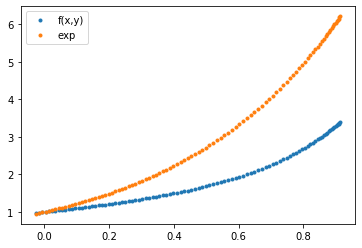

count:  687
step:  0 , Cost:  1.0006293 

step:  25 , Cost:  1.0000439 

step:  50 , Cost:  0.9994591 





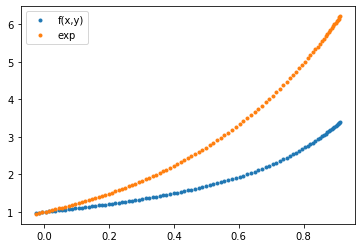

count:  688
step:  0 , Cost:  0.9994356 

step:  25 , Cost:  0.99885106 

step:  50 , Cost:  0.99826694 





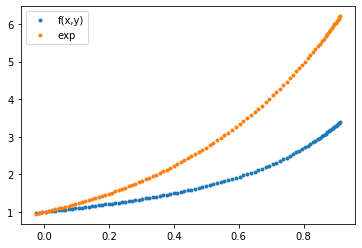

count:  689
step:  0 , Cost:  0.9982435 

step:  25 , Cost:  0.9976597 

step:  50 , Cost:  0.9970762 





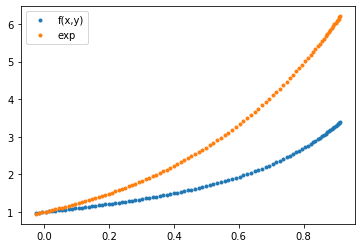

count:  690
step:  0 , Cost:  0.9970529 

step:  25 , Cost:  0.99646974 

step:  50 , Cost:  0.9958876 





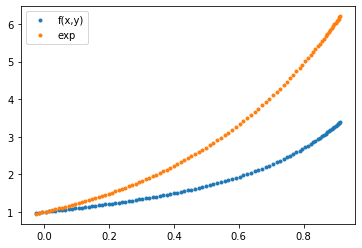

count:  691
step:  0 , Cost:  0.99586433 

step:  25 , Cost:  0.9952828 

step:  50 , Cost:  0.99470156 





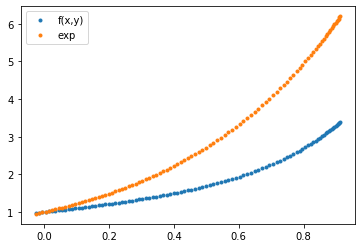

count:  692
step:  0 , Cost:  0.99467844 

step:  25 , Cost:  0.99409837 

step:  50 , Cost:  0.99351877 





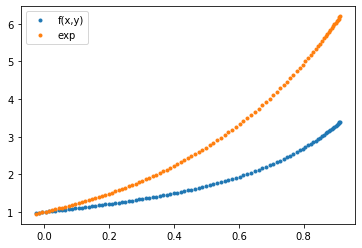

count:  693
step:  0 , Cost:  0.99349546 

step:  25 , Cost:  0.99291617 

step:  50 , Cost:  0.99233735 





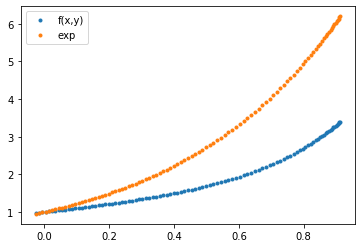

count:  694
step:  0 , Cost:  0.9923141 

step:  25 , Cost:  0.99173564 

step:  50 , Cost:  0.99115735 





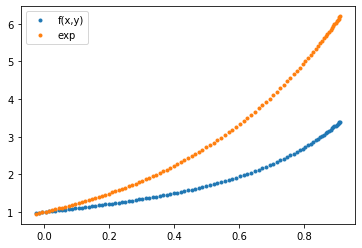

count:  695
step:  0 , Cost:  0.99113417 

step:  25 , Cost:  0.99055636 

step:  50 , Cost:  0.9899788 





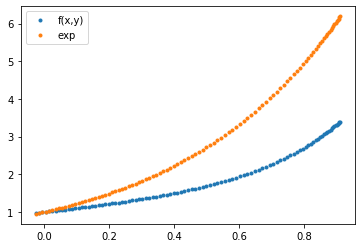

count:  696
step:  0 , Cost:  0.98995566 

step:  25 , Cost:  0.9893785 

step:  50 , Cost:  0.988802 





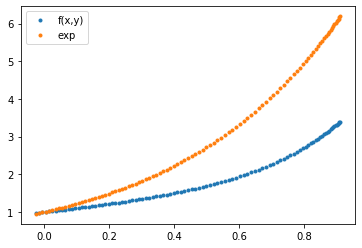

count:  697
step:  0 , Cost:  0.9887788 

step:  25 , Cost:  0.9882033 

step:  50 , Cost:  0.9876286 





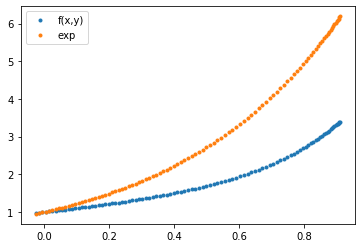

count:  698
step:  0 , Cost:  0.9876055 

step:  25 , Cost:  0.98703116 

step:  50 , Cost:  0.98645705 





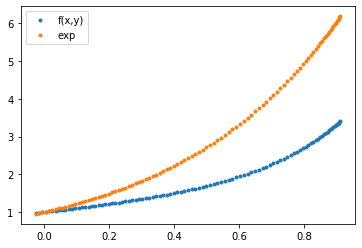

count:  699
step:  0 , Cost:  0.9864341 

step:  25 , Cost:  0.98586047 

step:  50 , Cost:  0.9852871 





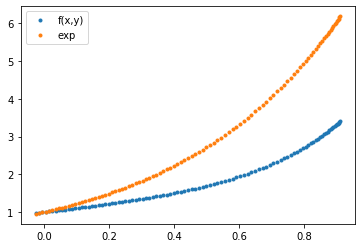

count:  700
step:  0 , Cost:  0.9852642 

step:  25 , Cost:  0.9846913 

step:  50 , Cost:  0.98411906 





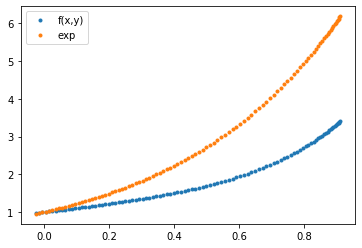

count:  701
step:  0 , Cost:  0.98409605 

step:  25 , Cost:  0.98352385 

step:  50 , Cost:  0.98295194 





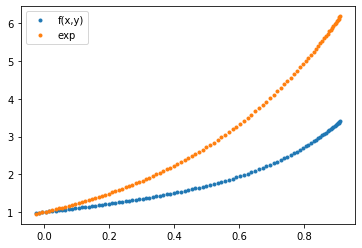

count:  702
step:  0 , Cost:  0.98292905 

step:  25 , Cost:  0.9823575 

step:  50 , Cost:  0.98178613 





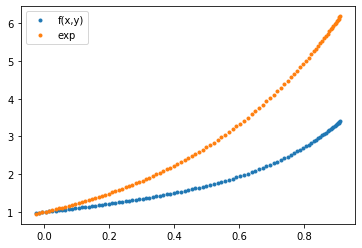

count:  703
step:  0 , Cost:  0.9817631 

step:  25 , Cost:  0.9811922 

step:  50 , Cost:  0.98062164 





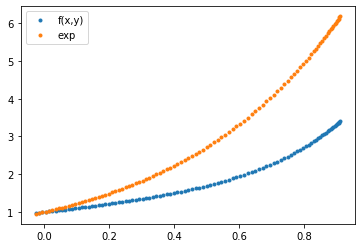

count:  704
step:  0 , Cost:  0.9805988 

step:  25 , Cost:  0.98002905 

step:  50 , Cost:  0.97945976 





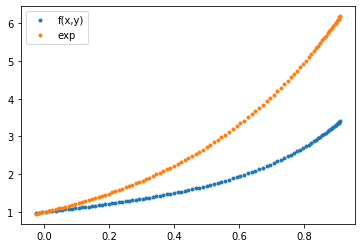

count:  705
step:  0 , Cost:  0.97943705 

step:  25 , Cost:  0.97886795 

step:  50 , Cost:  0.9782998 





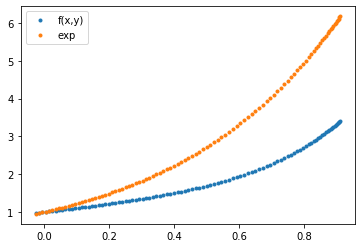

count:  706
step:  0 , Cost:  0.9782772 

step:  25 , Cost:  0.97770935 

step:  50 , Cost:  0.97714216 





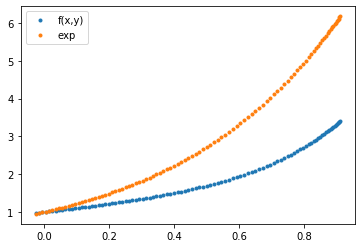

count:  707
step:  0 , Cost:  0.9771195 

step:  25 , Cost:  0.9765526 

step:  50 , Cost:  0.9759859 





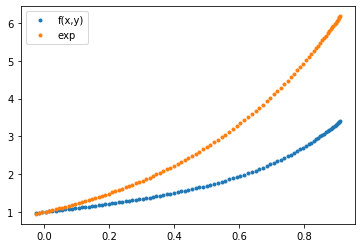

count:  708
step:  0 , Cost:  0.97596323 

step:  25 , Cost:  0.9753969 

step:  50 , Cost:  0.9748307 





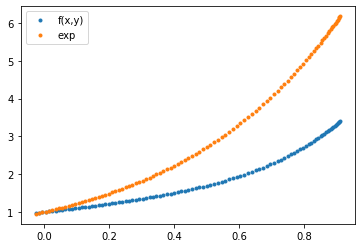

count:  709
step:  0 , Cost:  0.9748081 

step:  25 , Cost:  0.97424227 

step:  50 , Cost:  0.97367674 





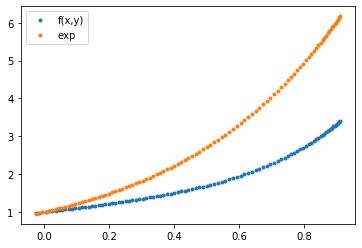

count:  710
step:  0 , Cost:  0.97365415 

step:  25 , Cost:  0.9730894 

step:  50 , Cost:  0.9725251 





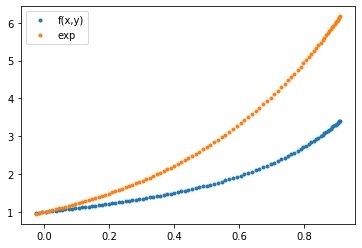

count:  711
step:  0 , Cost:  0.9725026 

step:  25 , Cost:  0.9719389 

step:  50 , Cost:  0.97137564 





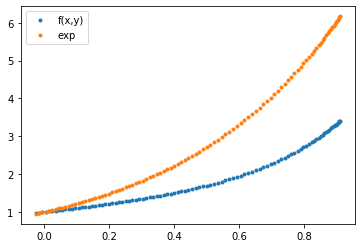

count:  712
step:  0 , Cost:  0.971353 

step:  25 , Cost:  0.9707901 

step:  50 , Cost:  0.9702273 





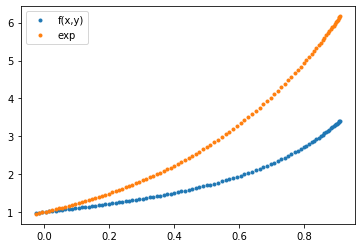

count:  713
step:  0 , Cost:  0.9702048 

step:  25 , Cost:  0.96964246 

step:  50 , Cost:  0.96908087 





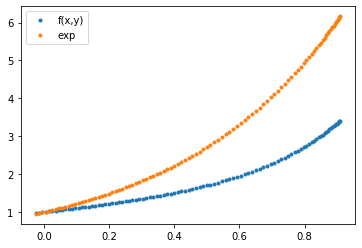

count:  714
step:  0 , Cost:  0.9690584 

step:  25 , Cost:  0.9684967 

step:  50 , Cost:  0.9679356 





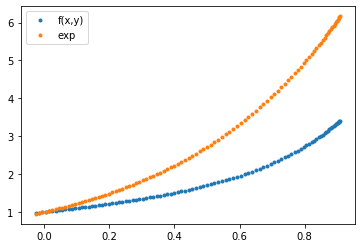

count:  715
step:  0 , Cost:  0.9679132 

step:  25 , Cost:  0.9673524 

step:  50 , Cost:  0.9667919 





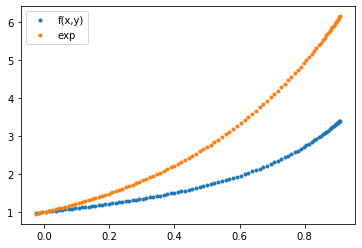

count:  716
step:  0 , Cost:  0.9667696 

step:  25 , Cost:  0.96620935 

step:  50 , Cost:  0.96564996 





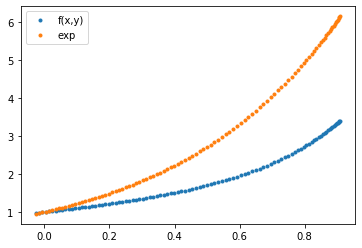

count:  717
step:  0 , Cost:  0.9656274 

step:  25 , Cost:  0.9650683 

step:  50 , Cost:  0.96451 





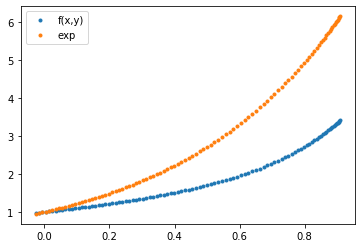

count:  718
step:  0 , Cost:  0.96448785 

step:  25 , Cost:  0.9639299 

step:  50 , Cost:  0.9633726 





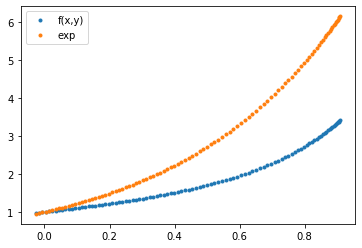

count:  719
step:  0 , Cost:  0.9633503 

step:  25 , Cost:  0.9627939 

step:  50 , Cost:  0.96223795 





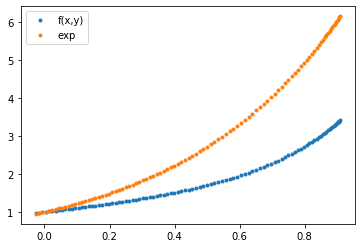

count:  720
step:  0 , Cost:  0.9622157 

step:  25 , Cost:  0.9616603 

step:  50 , Cost:  0.961105 





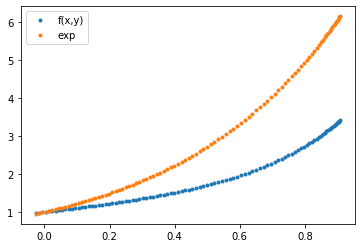

count:  721
step:  0 , Cost:  0.96108276 

step:  25 , Cost:  0.9605278 

step:  50 , Cost:  0.9599731 





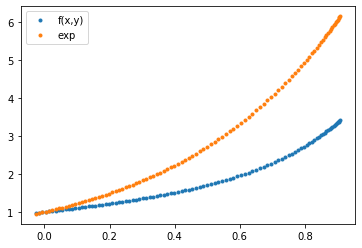

count:  722
step:  0 , Cost:  0.95995086 

step:  25 , Cost:  0.9593964 

step:  50 , Cost:  0.95884234 





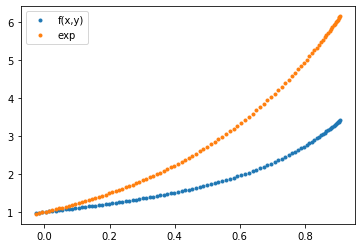

count:  723
step:  0 , Cost:  0.9588201 

step:  25 , Cost:  0.95826644 

step:  50 , Cost:  0.95771307 





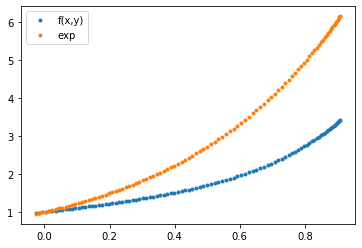

count:  724
step:  0 , Cost:  0.957691 

step:  25 , Cost:  0.95713806 

step:  50 , Cost:  0.95658565 





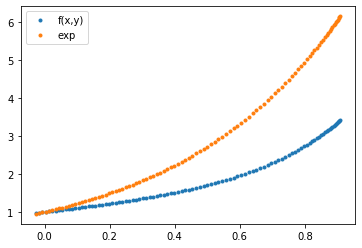

count:  725
step:  0 , Cost:  0.9565635 

step:  25 , Cost:  0.95601165 

step:  50 , Cost:  0.95545983 





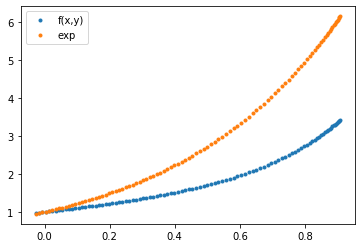

count:  726
step:  0 , Cost:  0.9554378 

step:  25 , Cost:  0.9548864 

step:  50 , Cost:  0.9543357 





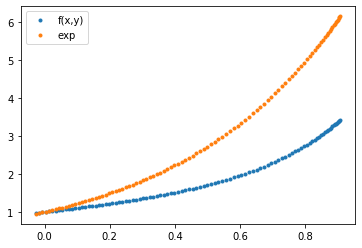

count:  727
step:  0 , Cost:  0.95431376 

step:  25 , Cost:  0.95376337 

step:  50 , Cost:  0.95321345 





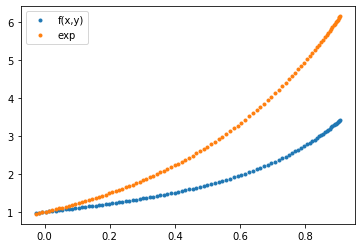

count:  728
step:  0 , Cost:  0.9531914 

step:  25 , Cost:  0.95264167 

step:  50 , Cost:  0.95209223 





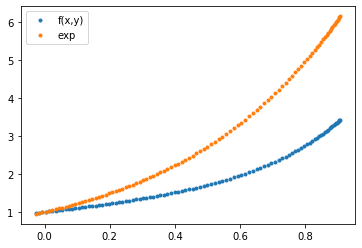

count:  729
step:  0 , Cost:  0.95207024 

step:  25 , Cost:  0.9515209 

step:  50 , Cost:  0.95097214 





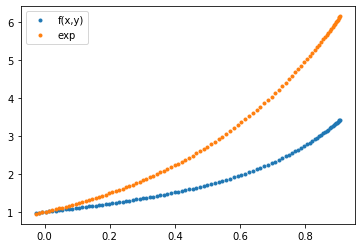

count:  730
step:  0 , Cost:  0.95095026 

step:  25 , Cost:  0.9504019 

step:  50 , Cost:  0.9498539 





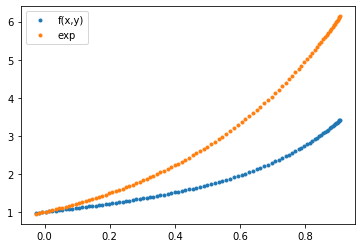

count:  731
step:  0 , Cost:  0.9498319 

step:  25 , Cost:  0.9492841 

step:  50 , Cost:  0.948737 





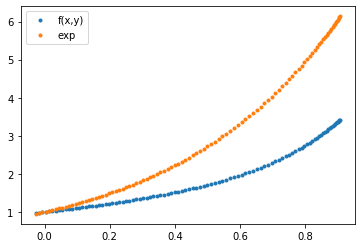

count:  732
step:  0 , Cost:  0.9487152 

step:  25 , Cost:  0.9481685 

step:  50 , Cost:  0.94762206 





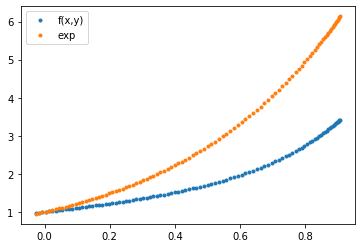

count:  733
step:  0 , Cost:  0.94760025 

step:  25 , Cost:  0.94705445 

step:  50 , Cost:  0.9465089 





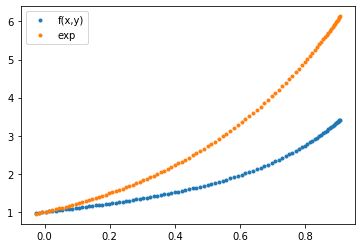

count:  734
step:  0 , Cost:  0.9464872 

step:  25 , Cost:  0.94594187 

step:  50 , Cost:  0.94539696 





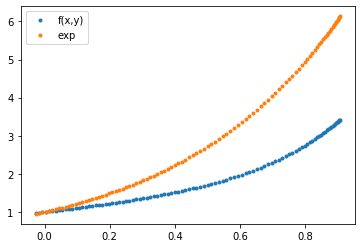

count:  735
step:  0 , Cost:  0.9453751 

step:  25 , Cost:  0.9448303 

step:  50 , Cost:  0.944286 





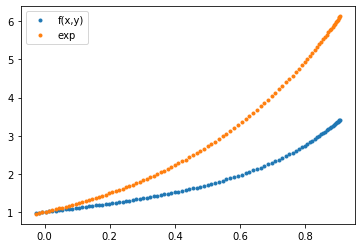

count:  736
step:  0 , Cost:  0.94426423 

step:  25 , Cost:  0.9437201 

step:  50 , Cost:  0.94317675 





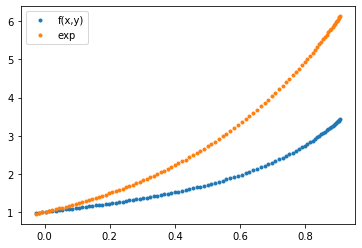

count:  737
step:  0 , Cost:  0.94315493 

step:  25 , Cost:  0.94261205 

step:  50 , Cost:  0.9420695 





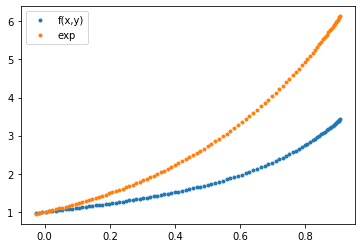

count:  738
step:  0 , Cost:  0.9420476 

step:  25 , Cost:  0.94150525 

step:  50 , Cost:  0.94096464 





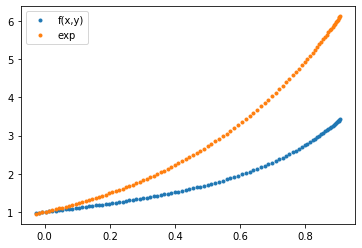

count:  739
step:  0 , Cost:  0.9409431 

step:  25 , Cost:  0.9404036 

step:  50 , Cost:  0.93986434 





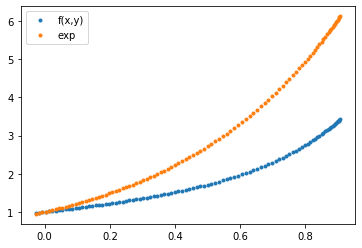

count:  740
step:  0 , Cost:  0.9398426 

step:  25 , Cost:  0.93930405 

step:  50 , Cost:  0.9387659 





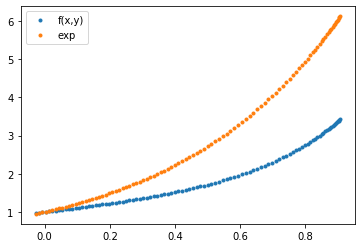

count:  741
step:  0 , Cost:  0.93874437 

step:  25 , Cost:  0.9382063 

step:  50 , Cost:  0.93766856 





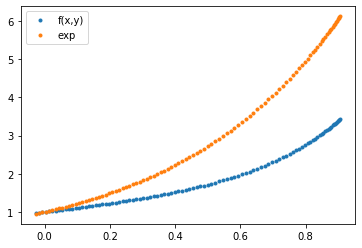

count:  742
step:  0 , Cost:  0.9376471 

step:  25 , Cost:  0.93710977 

step:  50 , Cost:  0.9365727 





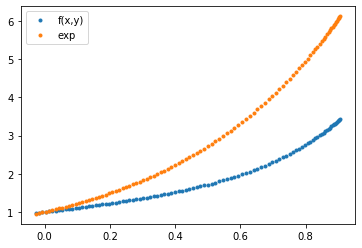

count:  743
step:  0 , Cost:  0.93655103 

step:  25 , Cost:  0.9360144 

step:  50 , Cost:  0.93547827 





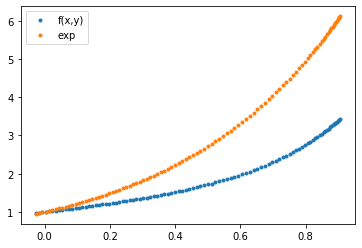

count:  744
step:  0 , Cost:  0.9354567 

step:  25 , Cost:  0.9349208 

step:  50 , Cost:  0.93438536 





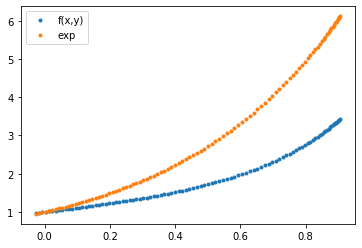

count:  745
step:  0 , Cost:  0.93436384 

step:  25 , Cost:  0.9338286 

step:  50 , Cost:  0.93329346 





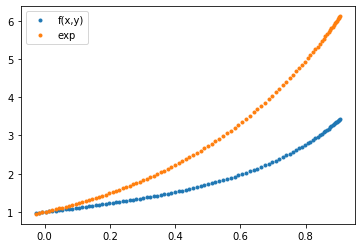

count:  746
step:  0 , Cost:  0.9332721 

step:  25 , Cost:  0.9327375 

step:  50 , Cost:  0.9322036 





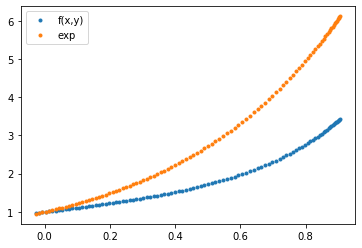

count:  747
step:  0 , Cost:  0.9321824 

step:  25 , Cost:  0.931649 

step:  50 , Cost:  0.93111575 





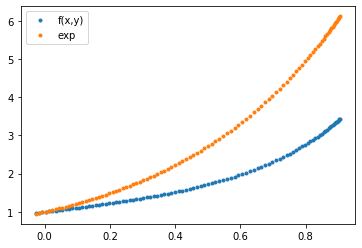

count:  748
step:  0 , Cost:  0.9310944 

step:  25 , Cost:  0.9305614 

step:  50 , Cost:  0.9300286 





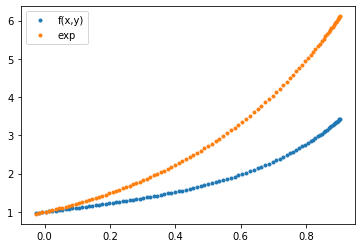

count:  749
step:  0 , Cost:  0.93000746 

step:  25 , Cost:  0.9294748 

step:  50 , Cost:  0.92894256 





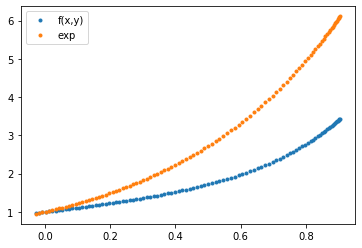

count:  750
step:  0 , Cost:  0.92892134 

step:  25 , Cost:  0.9283897 

step:  50 , Cost:  0.92785835 





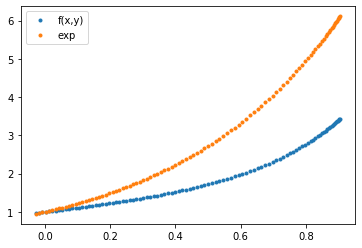

count:  751
step:  0 , Cost:  0.9278372 

step:  25 , Cost:  0.9273063 

step:  50 , Cost:  0.92677575 





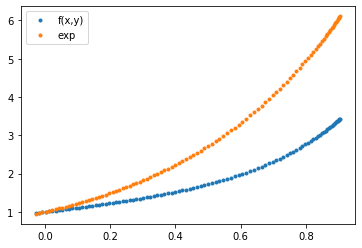

count:  752
step:  0 , Cost:  0.92675436 

step:  25 , Cost:  0.92622405 

step:  50 , Cost:  0.92569375 





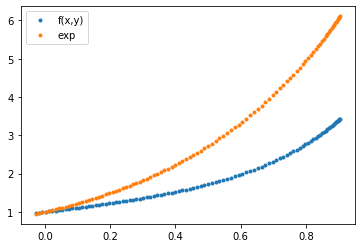

count:  753
step:  0 , Cost:  0.9256726 

step:  25 , Cost:  0.9251426 

step:  50 , Cost:  0.9246135 





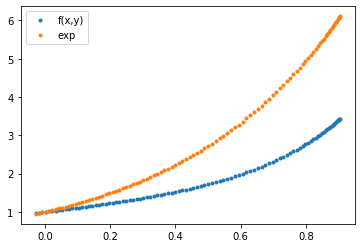

count:  754
step:  0 , Cost:  0.9245922 

step:  25 , Cost:  0.92406356 

step:  50 , Cost:  0.9235352 





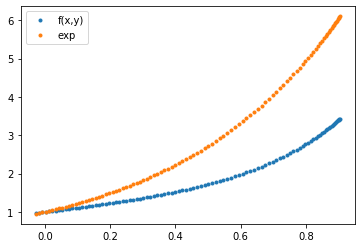

count:  755
step:  0 , Cost:  0.9235141 

step:  25 , Cost:  0.9229861 

step:  50 , Cost:  0.9224582 





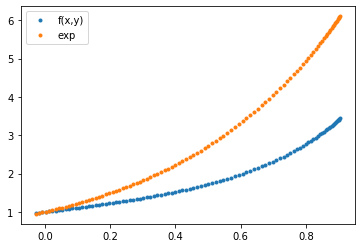

count:  756
step:  0 , Cost:  0.92243713 

step:  25 , Cost:  0.9219094 

step:  50 , Cost:  0.921382 





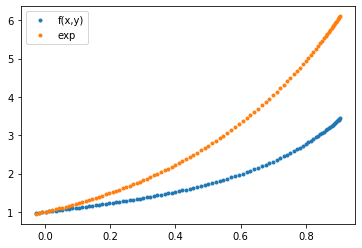

count:  757
step:  0 , Cost:  0.9213609 

step:  25 , Cost:  0.92083395 

step:  50 , Cost:  0.9203077 





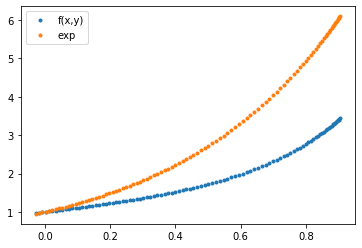

count:  758
step:  0 , Cost:  0.92028654 

step:  25 , Cost:  0.9197603 

step:  50 , Cost:  0.91923445 





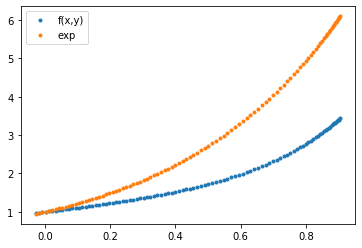

count:  759
step:  0 , Cost:  0.9192132 

step:  25 , Cost:  0.91868764 

step:  50 , Cost:  0.9181625 





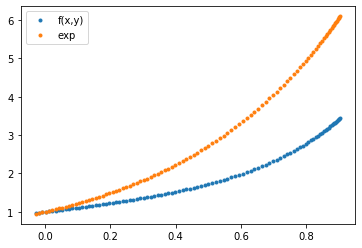

count:  760
step:  0 , Cost:  0.9181415 

step:  25 , Cost:  0.91761667 

step:  50 , Cost:  0.9170924 





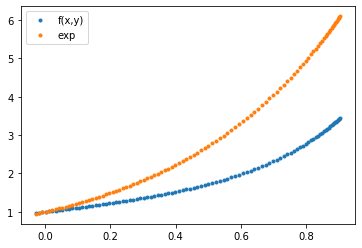

count:  761
step:  0 , Cost:  0.9170714 

step:  25 , Cost:  0.916548 

step:  50 , Cost:  0.91602486 





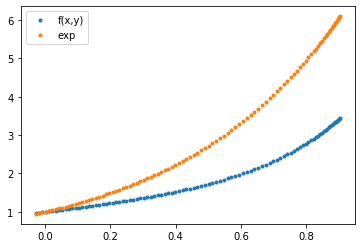

count:  762
step:  0 , Cost:  0.91600394 

step:  25 , Cost:  0.9154811 

step:  50 , Cost:  0.91495836 





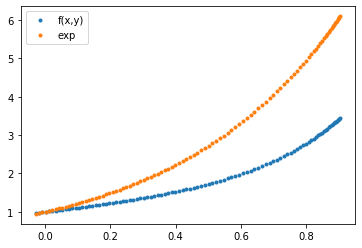

count:  763
step:  0 , Cost:  0.9149376 

step:  25 , Cost:  0.914415 

step:  50 , Cost:  0.91389304 





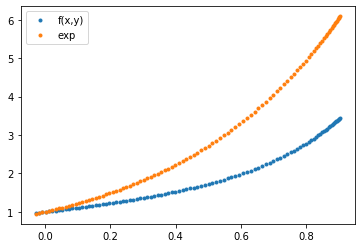

count:  764
step:  0 , Cost:  0.91387206 

step:  25 , Cost:  0.9133516 

step:  50 , Cost:  0.9128322 





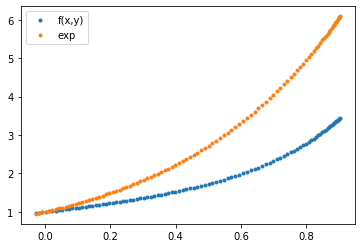

count:  765
step:  0 , Cost:  0.91281134 

step:  25 , Cost:  0.9122922 

step:  50 , Cost:  0.9117732 





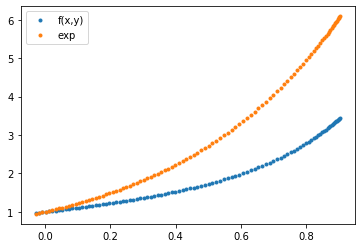

count:  766
step:  0 , Cost:  0.91175246 

step:  25 , Cost:  0.9112339 

step:  50 , Cost:  0.9107153 





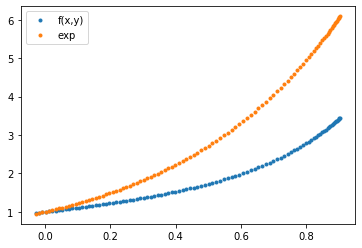

count:  767
step:  0 , Cost:  0.9106945 

step:  25 , Cost:  0.9101761 

step:  50 , Cost:  0.9096582 





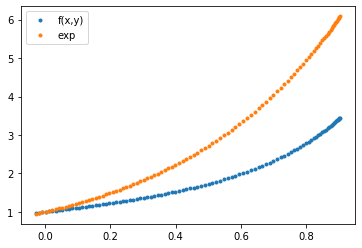

count:  768
step:  0 , Cost:  0.90963745 

step:  25 , Cost:  0.90911996 

step:  50 , Cost:  0.9086028 





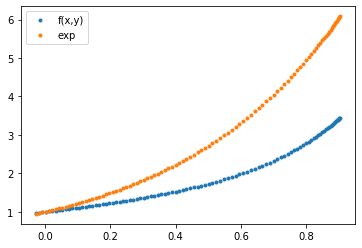

count:  769
step:  0 , Cost:  0.90858215 

step:  25 , Cost:  0.90806586 

step:  50 , Cost:  0.90754974 





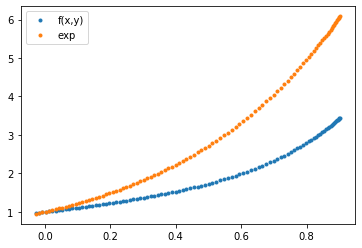

count:  770
step:  0 , Cost:  0.90752923 

step:  25 , Cost:  0.9070135 

step:  50 , Cost:  0.90649796 





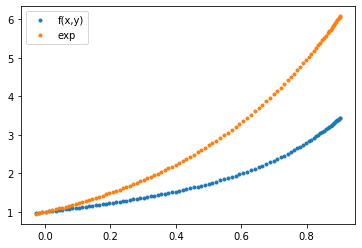

count:  771
step:  0 , Cost:  0.90647733 

step:  25 , Cost:  0.90596235 

step:  50 , Cost:  0.90544784 





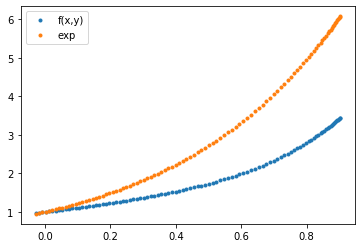

count:  772
step:  0 , Cost:  0.9054272 

step:  25 , Cost:  0.90491295 

step:  50 , Cost:  0.90439886 





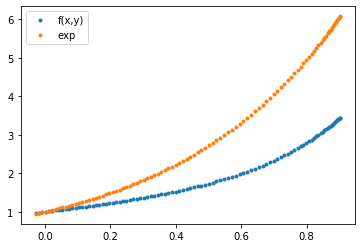

count:  773
step:  0 , Cost:  0.90437835 

step:  25 , Cost:  0.9038645 

step:  50 , Cost:  0.90335083 





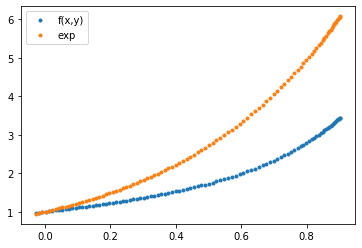

count:  774
step:  0 , Cost:  0.9033303 

step:  25 , Cost:  0.902817 

step:  50 , Cost:  0.9023042 





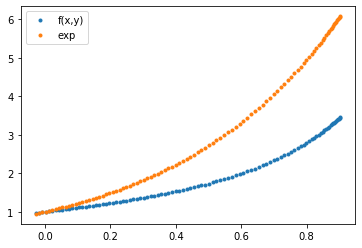

count:  775
step:  0 , Cost:  0.90228355 

step:  25 , Cost:  0.9017712 

step:  50 , Cost:  0.90125895 





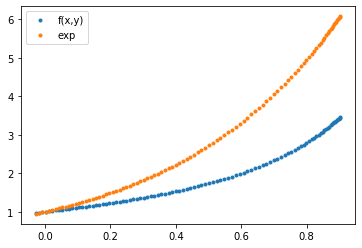

count:  776
step:  0 , Cost:  0.90123856 

step:  25 , Cost:  0.9007266 

step:  50 , Cost:  0.9002154 





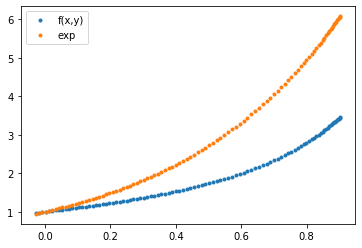

count:  777
step:  0 , Cost:  0.9001949 

step:  25 , Cost:  0.8996841 

step:  50 , Cost:  0.89917356 





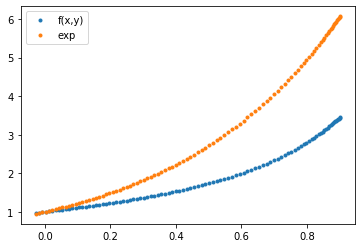

In [7]:
x_max = 1             # 최대 x 범위 : 0 <= x < x_max
w_number = 6          # w 개수
cost_limit = 0.9      # 최소 cost 
step_number = 50    # step 횟수 -> 총 step 횟수 = count * step

# def f(x, y):          # f(x, y)
#   return 2*y

def anal(x):
  return np.exp(list(2*np.array(x)))

Error_Corr(x_max, w_number, cost_limit, step_number)

ValueError: x and y must have same first dimension, but have shapes (100, 1) and (0,)

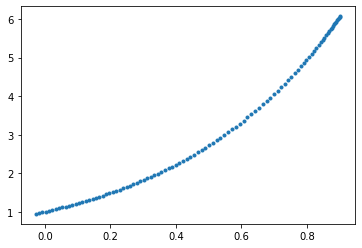

In [8]:
error = [abs(a - b) for a, b in zip(corr_space, anal(x_space))]
plt.plot(x_space, anal(x_space), '.', label = 'anal sol')
plt.plot(x_space, corr_space, '.', label = 'final sol')
plt.plot(x_space, error, '.', label = 'error')
plt.legend()
plt.show()
print(np.linalg.norm(error))